## **Source des données :** https://www.kaggle.com/datasets/moussasacko/rakuten-france-multimodal-product-classification?resource=download
>### Fonctions globales de support pour l'analyse

In [1]:
import os
import re

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# local
data_root_folder = "../data"
data_images_root_folder = "../data/images"

"""
# replaced by kaggle paths
data_root_folder = "/kaggle/input/rakuten-france-multimodal-product-classification"
data_images_root_folder = "/kaggle/input/rakuten-france-multimodal-product-classification/images/images"
"""

#/kaggle/input/rakuten-france-multimodal-product-classification/images
#/kaggle/input/rakuten-france-multimodal-product-classification/images/images/image_train


def get_df_missed_unique_values(df):
    if isinstance(df, pd.DataFrame):
        ret = {}
        for col in df.columns:
            n = df[col].isna().sum()
            n1 = df[col].unique()
            ret[col] = {
                    'manquantes': n,
                    'manquantes (%)': 100*n/df.shape[0],
                    'uniques': n1,
                    'unique (nombre)': len(n1),
                    'uniques (%)': 100*len(n1)/df.shape[0]
                    }
            
        return ret
    return {}


def get_df_basic_elements(df, infos_types= ['shape', 'head', 'tail', 'info', 'describe'], actions= ['return', 'print']):
    ret = { 'shape': '', 'head': '', 'tail': '',  'info': '', 'describe': '' }
    if isinstance(df, pd.DataFrame):
        if 'shape' in infos_types:
            df_shape = df.shape
            if 'print' in  actions: 
                print("shape------------------------------------------------------")
                print(df_shape)
            if 'return' in actions:
                ret['shape'] = str(df_shape)
        if 'head' in infos_types:
            df_head = df.head()
            if 'print' in  actions: 
                print("head------------------------------------------------------")
                display(df_head)
            if 'return' in actions:
                ret['head'] = str(df_head)
        if 'tail' in infos_types:
            df_tail = df.tail()
            if 'print' in  actions: 
                print("tail------------------------------------------------------")
                display(df_tail)
            if 'return' in actions:
                ret['tail'] = str(df_tail)
        if 'info' in infos_types:
            df_info = df.info()
            if 'print' in  actions: 
                print("info------------------------------------------------------")
                display(df_info)
            if 'return' in actions:
                ret['info'] = str(df_info)
        if 'describe' in infos_types:
            df_describe = df.describe()
            if 'print' in  actions: 
                print("describe------------------------------------------------------")
                display(df_describe)
            if 'return' in actions:
                ret['describe'] = str(df_describe)
        
        if 'return' in actions:
            return {'data': ret}
    return {'data': ret}              
                
def get_excluded_words(file_path):
    data = pd.read_csv(file_path, sep='\s+' , header = None)
    return data
  

<>:87: SyntaxWarning: invalid escape sequence '\s'
<>:87: SyntaxWarning: invalid escape sequence '\s'
C:\Users\abdel\AppData\Local\Temp\ipykernel_21696\2362697339.py:87: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv(file_path, sep='\s+' , header = None)


# Data exploration & preprocessing

>merge X_train with Y_train into base dataset data 

In [11]:

X_train=pd.read_csv(f'{data_root_folder}/X_train_update.csv', index_col=0)
#X_test=pd.read_csv(f'{data_root_folder}/X_test_update.csv', index_col=0)
Y_train=pd.read_csv(f'{data_root_folder}/Y_train_CVw08PX.csv', index_col=0)
data=pd.concat([X_train,Y_train], axis=1 )
display(get_df_basic_elements(df=data, infos_types=['shape', 'head', 'tail', 'info'], actions=['print'] ))

shape------------------------------------------------------
(84916, 5)
head------------------------------------------------------


designation  \
0  Olivia: Personalisiertes Notizbuch / 150 Seite...   
1  Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...   
2  Grand Stylet Ergonomique Bleu Gamepad Nintendo...   
3  Peluche Donald - Europe - Disneyland 2000 (Mar...   
4                               La Guerre Des Tuques   

                                         description   productid     imageid  \
0                                                NaN  3804725264  1263597046   
1                                                NaN   436067568  1008141237   
2  PILOT STYLE Touch Pen de marque Speedlink est ...   201115110   938777978   
3                                                NaN    50418756   457047496   
4  Luc a des id&eacute;es de grandeur. Il veut or...   278535884  1077757786   

   prdtypecode  
0           10  
1         2280  
2           50  
3         1280  
4         2705

tail------------------------------------------------------


designation  \
84911                        The Sims [ Import Anglais ]   
84912  Kit piscine acier NEVADA déco pierre Ø 3.50m x...   
84913  Journal Officiel De La Republique Francaise N°...   
84914  Table Basse Bois De Récupération Massif Base B...   
84915  Gomme De Collection 2 Gommes Pinguin Glace Ver...   

                                             description   productid  \
84911                                                NaN   206719094   
84912  <b>Description complète :</b><br />Kit piscine...  3065095706   
84913                                                NaN   440707564   
84914  <p>Cette table basse a un design unique et con...  3942400296   
84915                                                NaN    57203227   

          imageid  prdtypecode  
84911   941495734           40  
84912  1188462883         2583  
84913  1009325617         2280  
84914  1267353403         1560  
84915   684671297         2522

<class 'pandas.core.frame.DataFrame'>
Index: 84916 entries, 0 to 84915
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  int64 
 3   imageid      84916 non-null  int64 
 4   prdtypecode  84916 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 3.9+ MB
info------------------------------------------------------


None

{'data': {'shape': '', 'head': '', 'tail': '', 'info': '', 'describe': ''}}

* Columns types are relevant
* Data size is relevant for Machine Learning
* For the suggested X_test, Y_test is missing, the test data will be generated from the train data 

## Missing & duplicated

35% of 'description' column values are missing & 60% of 'description' are distinct

### Missing images ?

In [ ]:
notfound=False
for index, row in data.iterrows():
    imgid = row['imageid']
    prdid = row['productid']
    try:
        mpimg.imread(f'{data_images_root_folder}/image_train/image_{imgid}_product_{prdid}.jpg')
    except FileNotFoundError as error:  
       notfound=True
       print('Image not found', error)  
if not notfound:
    print('No image is missing')
    

### Duplicated values

>A. Dans la colonne **description**

In [45]:
def old_get_duplicated_description(data):
    data_descnotna=data[-data.description.isna()]
    data_desc_dup=data_descnotna[data_descnotna.duplicated(['description'])].groupby('description').agg(count=('prdtypecode', 'size'),prdtypecodes=('prdtypecode',lambda x: str(x.unique()))).sort_values(by=['count'], ascending=False).query('count>30')
    return pd.DataFrame (data_desc_dup)
    

def get_duplicated_description(data, threshold):
    data_descnotna=data[-data.description.isna()]
    data_desc_dup=data_descnotna[data_descnotna.duplicated(['description'])].groupby('description').agg(count=('prdtypecode', 'size'),prdtypecodes=('prdtypecode',lambda x: list(x.unique())), 
                                                                                                        designations=('designation',lambda x: list(x.unique())),
                                                                                                        designations_count=('designation', lambda x: len(list(x.unique())))).sort_values(by=['count'], ascending=False).query('count>' + str(threshold))
    return data_desc_dup


dup_desc = get_duplicated_description(data, 30)
display( dup_desc )
print ("data.shape!", data.shape)


count        prdtypecodes  \
description                                                                     
<br>Attention !!! Ce produit est un import  si ...    251                [40]   
Taille: En format A5 (144 cm x 21 cm) Caractéis...    231              [2522]   
Taille: En format A5 (144 cm x 21 cm) Caracteri...    188              [2522]   
Taille: En format A5 (144 cm x 21 cm) Caract?is...    161              [2522]   
Taille: En format A5 (144 cm x 21 cm) Caractéri...     88              [2522]   
<br />                                                 80  [1940, 2522, 1301]   
Piscine hors-sol en acier ronde Fidji de la mar...     56              [2583]   
Kit de piscine hors-sol ronde en acier Bora Bor...     38              [2583]   
Faites de la place dans le jardin à la piscine ...     37              [2583]   
Piscine hors-sol ovale en acier blanc Wet de la...     36              [2583]   
Kit complet piscine ronde en acier Wet de la ma...     36              [2583]   
Piscine hors-sol ovale en acier blanc Fidji de ...     35              [2583]   
Piscine hors-sol acier blanc Haïti ovale de la ...     34              [2583]   
La gamme de piscines hors sols Fusion de la mar...     33              [2583]   
Lampe 3D - 7 couleurs interchangeable au choix ...     31              [2060]   

                                                                                         designations  \
description                                                                                             
<br>Attention !!! Ce produit est un import  si ...  [Zumba Fitness : Rush (Jeu Kinect) [Import All...   
Taille: En format A5 (144 cm x 21 cm) Caractéis...  [Carnet De Notes Bloc-Notes Cahier Bleu Nature...   
Taille: En format A5 (144 cm x 21 cm) Caracteri...  [Carnet De Notes Bloc-Notes Cahier Que Mon Clu...   
Taille: En format A5 (144 cm x 21 cm) Caract?is...  [Carnet De Notes Bloc-Notes Cahierla Musique T...   
Taille: En format A5 (144 cm x 21 cm) Caractéri...  [Carnet De Notes Bloc-Notes Cahier Avoine Swee...   
<br />                                              [Mini Quatre-Quarts Pur Beurre Louis Le Goff 3...   
Piscine hors-sol en acier ronde Fidji de la mar...  [Kit piscine acier blanc Gré Fidji ronde 260 x...   
Kit de piscine hors-sol ronde en acier Bora Bor...  [Piscine acier blanc Bora Bora ronde 320 x 122...   
Faites de la place dans le jardin à la piscine ...  [Kit piscine acier aspect bois Gré Sicilia ron...   
Piscine hors-sol ovale en acier blanc Wet de la...  [Kit piscine acier blanc Gré Wet ovale 527 x 3...   
Kit complet piscine ronde en acier Wet de la ma...  [Kit piscine acier blanc Gré Wet ronde 320 x 1...   
Piscine hors-sol ovale en acier blanc Fidji de ...  [Kit piscine acier blanc Gré Fidji ovale 527 x...   
Piscine hors-sol acier blanc Haïti ovale de la ...  [Kit piscine acier blanc Gré Haïti ovale 744 x...   
La gamme de piscines hors sols Fusion de la mar...  [Kit piscine acier et résine Gré Fusion ovale ...   
Lampe 3D - 7 couleurs interchangeable au choix ...  [3d Coloré Illusion Alphabet Lettre Z Usb Tact...   

                                                    designations_count  
description                                                             
<br>Attention !!! Ce produit est un import  si ...                 250  
Taille: En format A5 (144 cm x 21 cm) Caractéis...                 230  
Taille: En format A5 (144 cm x 21 cm) Caracteri...                 169  
Taille: En format A5 (144 cm x 21 cm) Caract?is...                 161  
Taille: En format A5 (144 cm x 21 cm) Caractéri...                  88  
<br />                                                              80  
Piscine hors-sol en acier ronde Fidji de la mar...                  56  
Kit de piscine hors-sol ronde en acier Bora Bor...                  38  
Faites de la place dans le jardin à la piscine ...                  37  
Piscine hors-sol ovale en acier blanc Wet de la...                  35  
Kit complet 

data.shape! (84916, 5)


- Most of duplicated values are related to one type, which sets a corrolation between that could be useful in predicting the label
- The duplicated value '\<br />' can be deleted as it doesn't bring any semantic
- The duplicated value '...Attention !!! Ce produit est un import si les informations 'langues' et 'sous-titres'...' can be deleted as well.
- The product category code **2583** has 8 duplicated descriptins ranging from 33 to 56, which may explain in a graphics below why it has the **most duplicated desciption field**

In [47]:
# replace all '...Attention !!' with empty string
exp = "<br>Attention !!! Ce produit est un import"
data['description'] = data['description'].apply(lambda x: '' if (exp in str(x)) else x)
exp = "<br />"
data['description'] = data['description'].apply(lambda x: '' if (str(x)==exp) else x)
  
display( get_duplicated_description(data, 30) )

# Other duplicates (to decide later ?)
exp_list_2583 = ['Piscine hors-sol en acier ronde Fidji de la marque Gré Indispensable pour passer des vacances entre amis dans la fraîcheur de l&#39;eau cette piscine en acier ronde Fidji vous offre un espace de nage et de jeux d&#39;eau pour tous les goûts.',
            'Kit de piscine hors-sol ronde en acier Bora Bora de la marque Gré Installez une piscine hors-sol dans le jardin et faites vous plaisir avec la fraîcheur de l&#39;eau pour des moments de détente avec vos proches.',
            'Faites de la place dans le jardin à la piscine hors-sol Sicilia de GréLe kit de piscine hors sol en acier Sicilia ronde de la marque Gré vous plongera dans l&#39;ambiance de l&#39;été et du farniente avec son bel espace de nage.',
            'Kit complet piscine ronde en acier Wet de la marque GréSautez dans l&#39;eau pour vous rafraîchir ! Avec ce kit complet pour piscine hors-sol en acier vous pourrez passer de longues heures à vous baigner.',
            'Piscine hors-sol ovale en acier blanc Wet de la marque Gré.Cette gamme de piscines ovales est idéale pour avoir un grand espace de nage à domicile pour rafraîchir toute la famille cet été !La piscine en acier ovale Wet c&#39;est :? Une structure en acier galvanisé d&#39;une épaisseur de 45/100 de couleur blanc.',
            'Piscine hors-sol ovale en acier blanc Fidji de la marque Gré.La piscine en acier ovale Fidji c&#39;est :? Une structure en acier galvanisé d&#39;une épaisseur de 45/100 de couleur blanc.',
            'Piscine hors-sol acier blanc Haïti ovale de la marque Gré.Cette gamme de piscines ovales en acier vous offrira un grand espace de nage et s&#39;intégrera harmonieusement dans votre jardin avec son coloris blanc. La piscine en acier ovale Haïti c&#39;est :? Une structure en acier galvanisé d&#39;une épaisseur de 45/100 de couleur blanc.',
            'La gamme de piscines hors sols Fusion de la marque Gré offre un design unique et de généreuses dimensions. Cette gamme de piscines ovales est idéale pour avoir un grand espace de nage à domicile pour rafraîchir toute la famille cet été !La piscine en acier ovale Fusion c&#39;est :?',
            'Lampe 3D - 7 couleurs interchangeable au choix Avec Télécommande inclus. Figurine Lampe. Lampe de chevet -Lampe d&#39;ambiance Figurines - Lampe enfants - Lampe Noêl - Veilleuse'
            ]

# suppression de toutes les ligne dupliquées en ne gardant qu'1 pour chaque designation
# data = data.drop_duplicates(subset=['description'], keep='first')

print ("data.shape!", data.shape)

count  \
description                                                 
                                                      332   
Taille: En format A5 (144 cm x 21 cm) Caractéis...    231   
Taille: En format A5 (144 cm x 21 cm) Caracteri...    188   
Taille: En format A5 (144 cm x 21 cm) Caract?is...    161   
Taille: En format A5 (144 cm x 21 cm) Caractéri...     88   
Piscine hors-sol en acier ronde Fidji de la mar...     56   
Kit de piscine hors-sol ronde en acier Bora Bor...     38   
Faites de la place dans le jardin à la piscine ...     37   
Piscine hors-sol ovale en acier blanc Wet de la...     36   
Kit complet piscine ronde en acier Wet de la ma...     36   
Piscine hors-sol ovale en acier blanc Fidji de ...     35   
Piscine hors-sol acier blanc Haïti ovale de la ...     34   
La gamme de piscines hors sols Fusion de la mar...     33   
Lampe 3D - 7 couleurs interchangeable au choix ...     31   

                                                              prdtypecodes  \
description                                                                  
                                                    [40, 1940, 2522, 1301]   
Taille: En format A5 (144 cm x 21 cm) Caractéis...                  [2522]   
Taille: En format A5 (144 cm x 21 cm) Caracteri...                  [2522]   
Taille: En format A5 (144 cm x 21 cm) Caract?is...                  [2522]   
Taille: En format A5 (144 cm x 21 cm) Caractéri...                  [2522]   
Piscine hors-sol en acier ronde Fidji de la mar...                  [2583]   
Kit de piscine hors-sol ronde en acier Bora Bor...                  [2583]   
Faites de la place dans le jardin à la piscine ...                  [2583]   
Piscine hors-sol ovale en acier blanc Wet de la...                  [2583]   
Kit complet piscine ronde en acier Wet de la ma...                  [2583]   
Piscine hors-sol ovale en acier blanc Fidji de ...                  [2583]   
Piscine hors-sol acier blanc Haïti ovale de la ...                  [2583]   
La gamme de piscines hors sols Fusion de la mar...                  [2583]   
Lampe 3D - 7 couleurs interchangeable au choix ...                  [2060]   

                                                                                         designations  \
description                                                                                             
                                                    [Zumba Fitness : Rush (Jeu Kinect) [Import All...   
Taille: En format A5 (144 cm x 21 cm) Caractéis...  [Carnet De Notes Bloc-Notes Cahier Bleu Nature...   
Taille: En format A5 (144 cm x 21 cm) Caracteri...  [Carnet De Notes Bloc-Notes Cahier Que Mon Clu...   
Taille: En format A5 (144 cm x 21 cm) Caract?is...  [Carnet De Notes Bloc-Notes Cahierla Musique T...   
Taille: En format A5 (144 cm x 21 cm) Caractéri...  [Carnet De Notes Bloc-Notes Cahier Avoine Swee...   
Piscine hors-sol en acier ronde Fidji de la mar...  [Kit piscine acier blanc Gré Fidji ronde 260 x...   
Kit de piscine hors-sol ronde en acier Bora Bor...  [Piscine acier blanc Bora Bora ronde 320 x 122...   
Faites de la place dans le jardin à la piscine ...  [Kit piscine acier aspect bois Gré Sicilia ron...   
Piscine hors-sol ovale en acier blanc Wet de la...  [Kit piscine acier blanc Gré Wet ovale 527 x 3...   
Kit complet piscine ronde en acier Wet de la ma...  [Kit piscine acier blanc Gré Wet ronde 320 x 1...   
Piscine hors-sol ovale en acier blanc Fidji de ...  [Kit piscine acier blanc Gré Fidji ovale 527 x...   
Piscine hors-sol acier blanc Haïti ovale de la ...  [Kit piscine acier blanc Gré Haïti ovale 744 x...   
La gamme de piscines hors sols Fusion de la mar...  [Kit piscine acier et résine Gré Fusion ovale ...   
Lampe 3D - 7 couleurs interchangeable au choix ...  [3d Coloré Illusion Alphabet Lettre Z Usb Tact...   

                                                    designations_count  
description                                                             

data.shape! (84916, 5)


>B. Dans la colonne **desigation**

In [50]:
def get_duplicated_designation(data):
    data_descnotna=data[-data.designation.isna()]
    data_desig_dup=data_descnotna[data_descnotna.duplicated(['designation'])].groupby('designation').agg(count=('prdtypecode', 'size'),
                    prdtypecodes=('prdtypecode',lambda x: list(x.unique())), prdtypecodes_count = ('prdtypecode',lambda x: len(x.unique()))).sort_values(by=['count'], ascending=False).query('count>0')
    return pd.DataFrame (data_desig_dup)

dupl_desig = get_duplicated_designation(data=data)
display(dupl_desig)
print("Nbre de duplications tout prdtypecodes compris :")
print(dupl_desig['count'] * dupl_desig['prdtypecodes_count'])
    

Empty DataFrame
Columns: [count, prdtypecodes, prdtypecodes_count]
Index: []

Nbre de duplications tout prdtypecodes compris :
Series([], dtype: int64)


- 1422 lignes possèdent au moins une diplication de la colonne **designation**, elles doivent être réduite à une seule
- Les duplications vont de 1 jusqu'à **75** pour le code **2060**

In [51]:
# suppression de toutes les ligne dupliquées en ne gardant qu'1 pour chaque designation
data = data.drop_duplicates(subset=['designation'], keep='first')

display(get_duplicated_designation(data=data))
print(data.shape)

Empty DataFrame
Columns: [count, prdtypecodes, prdtypecodes_count]
Index: []

(82265, 5)


## Product types exploration

## Text data preprocessing

### Distribution

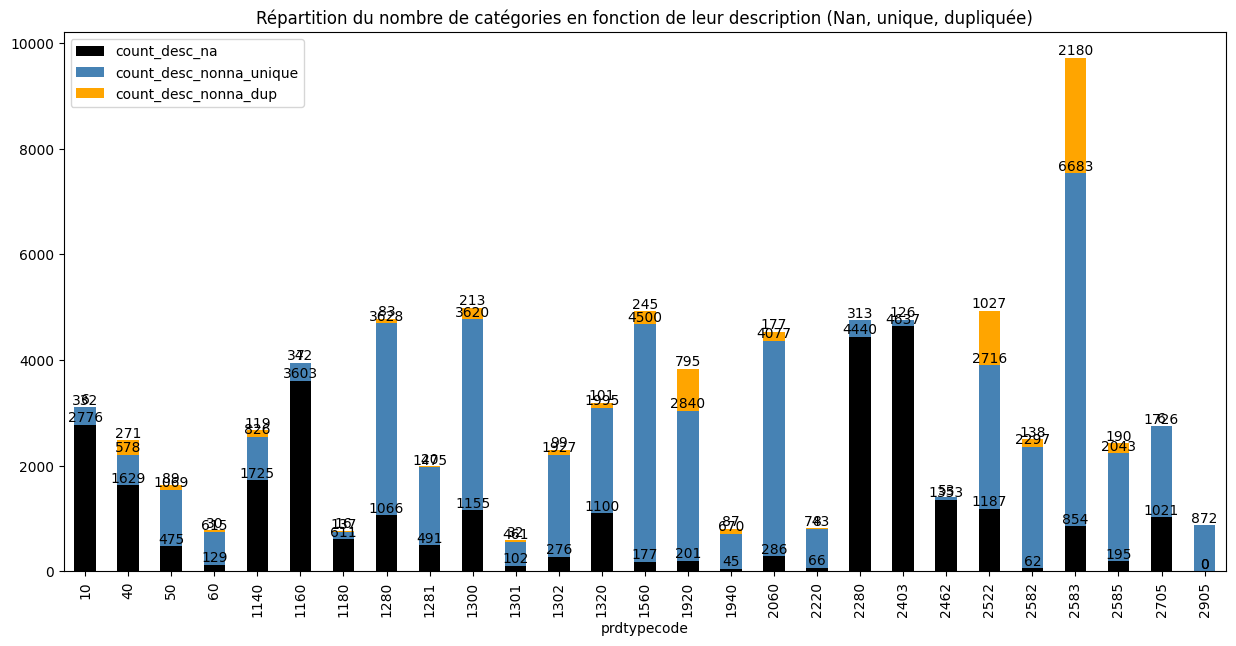

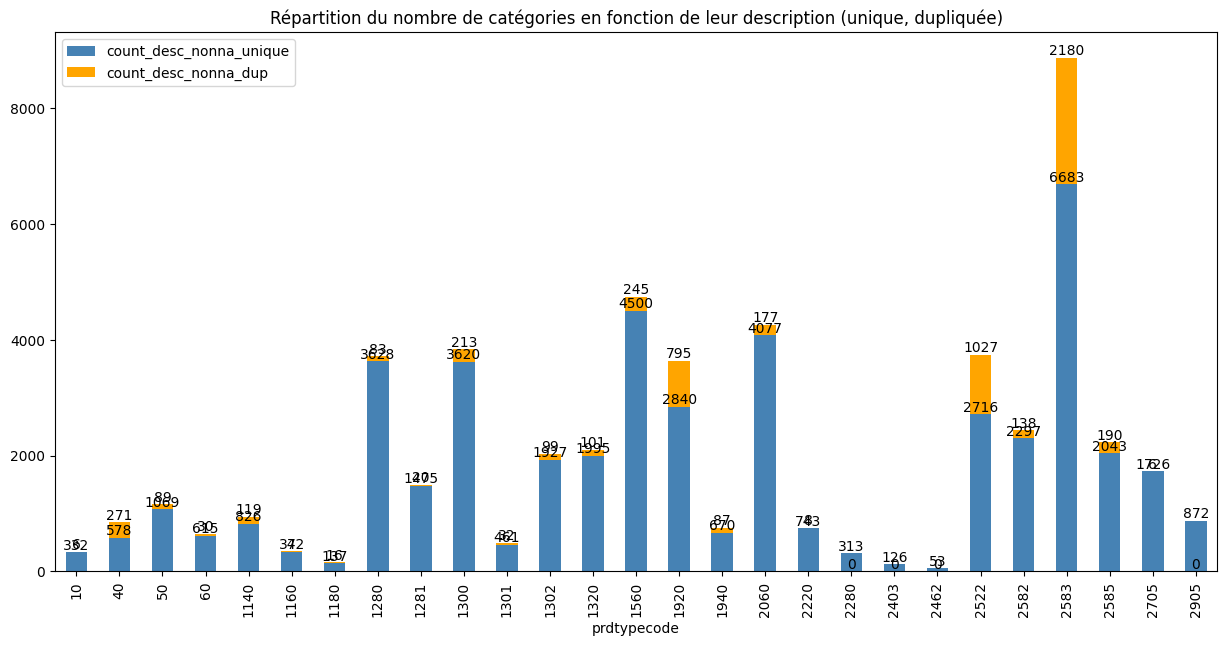

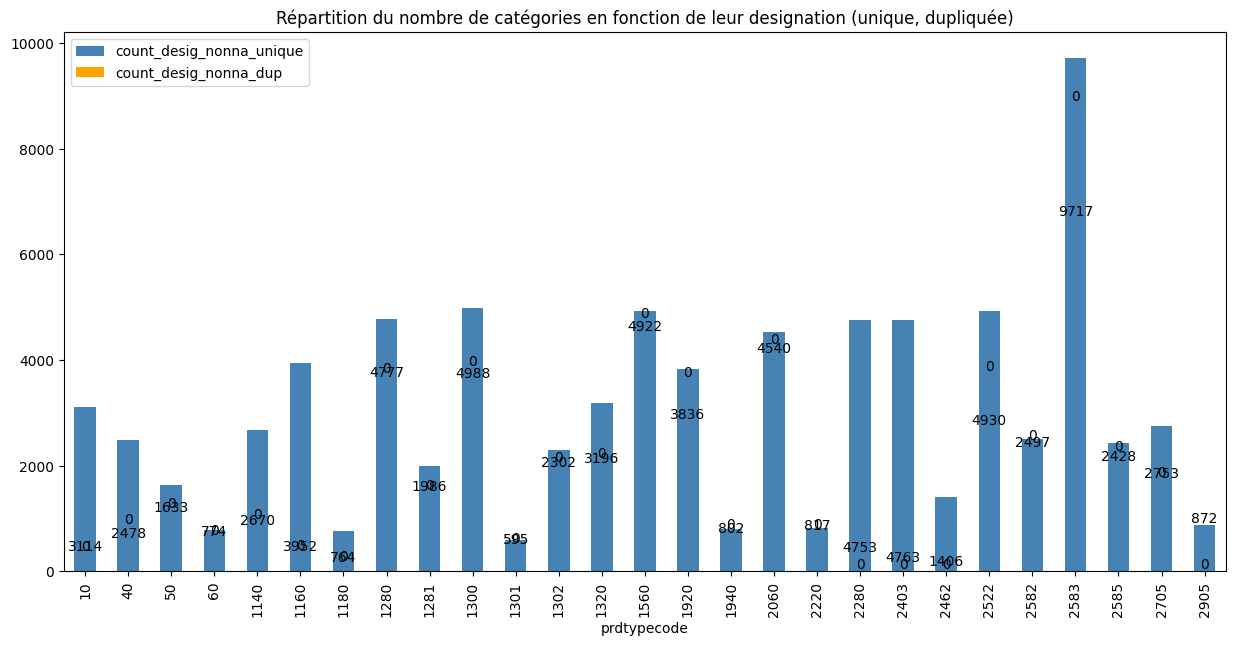

In [52]:

data_byprdtype_na=data.groupby('prdtypecode', group_keys=True).agg(
    count_desc_na=('description',lambda x: x.isna().sum()), 
    count_desc_nonna_unique=('description',lambda x: (x[x.notna()].unique()).size), 
    count_desc_nonna_dup=('description',lambda x: x[x.notna()].duplicated().sum()))

#display(data_byprdtype_na) 

ax1=data_byprdtype_na.plot.bar(stacked=True, color=['black', 'steelblue', 'orange'], figsize=(15, 7))
ax1.bar_label(ax1.containers[0], labels=data_byprdtype_na['count_desc_na'])
ax1.bar_label(ax1.containers[1], labels=data_byprdtype_na['count_desc_nonna_unique'])
ax1.bar_label(ax1.containers[2], labels=data_byprdtype_na['count_desc_nonna_dup'])
plt.title("Répartition du nombre de catégories en fonction de leur description (Nan, unique, dupliquée)")
plt.show();

data_byprdtype_na_1=data.groupby('prdtypecode', group_keys=True).agg(
    count_desc_nonna_unique=('description',lambda x: (x[x.notna()].unique()).size), 
    count_desc_nonna_dup=('description',lambda x: x[x.notna()].duplicated().sum()))

ax2=data_byprdtype_na_1.plot.bar(stacked=True, color=['steelblue', 'orange'], figsize=(15, 7))
ax2.bar_label(ax2.containers[0], labels=data_byprdtype_na_1['count_desc_nonna_unique'])
ax2.bar_label(ax2.containers[1], labels=data_byprdtype_na_1['count_desc_nonna_dup'])
plt.title("Répartition du nombre de catégories en fonction de leur description (unique, dupliquée)")
plt.show();


data_byprdtype_na_2=data.groupby('prdtypecode', group_keys=True).agg(
    count_desig_nonna_unique=('designation',lambda x: (x[x.notna()].unique()).size), 
    count_desig_nonna_dup=('designation',lambda x: x[x.notna()].duplicated().sum()))

ax3=data_byprdtype_na_2.plot.bar(stacked=True, color=['steelblue', 'orange'], figsize=(15, 7))
ax3.bar_label(ax2.containers[0], labels=data_byprdtype_na_2['count_desig_nonna_unique'])
ax3.bar_label(ax2.containers[1], labels=data_byprdtype_na_2['count_desig_nonna_dup'])
plt.title("Répartition du nombre de catégories en fonction de leur designation (unique, dupliquée)")

plt.show();




- **Aucun doublon dans designation; elles ont été tous réduites à 1 seule designation**
- Product types are not evenly distributed, 2583 is an outlier 
- Need to rebalance the data, by : 
    * For types with highest counts, deleting rows with description = NA values & replacing duplicates
    * Some product types have small amount of relevant 'description', for those a strategy might be relying on the 'designation'
    * Then rebalance the rest following guidelines [here](https://medium.com/@dlikhitha99/all-methods-for-balancing-imbalanced-data-decfe1f4048d)




### Guess what's behind the product type code ?

The goal of following routine is to : 

* Identifiy to what extent the 'designation' & 'description' content are capable to relate to a product type
* What kind of data cleaning should be carried out to make text data the most relevant
* Determine the semantic behind the product type code by displaying random pictues and top keywords for each product type code, it would help in better human interpretation of results during the model experimentation.


In [53]:

def preprocessor_func(text):
    """preprocess words in CountVectorizer call
        takeoff all digits and underscore
    """
    text = text.lower()
    text = re.sub(r"\d+_", '', text)
    return text
    

In [54]:

from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer
#from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
#from spacy.lang.en.stop_words import STOP_WORDS as en_stop
from wordcloud import STOPWORDS
import nltk
from nltk.corpus import stopwords

from PIL import Image



def analyse_text_images(df, nsamples=20, max_features=20, plot_images=False ):
  """Cette fonction parcourt tout le dataset fourni afin de faire une analyse des colonnes 'designation', 'description' 
  et affichier les images associées pour chaque designation

  Args:
      df (DataFrame) : DataFrame correspondant au dataset
      nsamples (int, optional): Nombre de lignes à sélectionner pour l'extraction des mots/images. Defaults to 20.
      max_features (int, optional): Nombre de mots max à extraire. Defaults to 20.
      plot_images (bool, optional): Afficher ou non les images (par défaut non). Defaults to False.
  """

  if not isinstance(df, pd.DataFrame):
    return


  bytypecode = df.groupby('prdtypecode')
  nsamples=nsamples   # first samples number taken for each category code
  max_features=max_features  # max features (words) choosen for each category code
  # N of images rows/cols to plot
  n_images_cols =  5 # N per row
  n_images_rows= 1 + (nsamples // n_images_cols) # max n_images_cols (4) images per row


  print("---N of samples for each code:", str(nsamples), "---Max extracted features (words): ", str(max_features) , "---")
  print("-----------------------------------------------------------------------------------------------------")

    
  to_ignore = set(get_excluded_words(f'{data_root_folder}/config/excluded_words.txt')[0])
  print('to_ignore=', to_ignore)    

  """
  to_ignore = ['x', 'y', 'xy', 'cm','mm', 'm²', 'taille','dimensions','hauteur','largeur','couleur','nbsp','comprend','description','import','france','japonais','blanc','gris','noir',
                            'le', 'la', 'les', 'un', 'deux', 'trois', 'quatre', 'cinq', 'une', 'et', 'de', 'du', 'des', 'ceci', 'cela', 'plusieurs', 'seul', 'seule', 'avec', 'pour', 
                            'ce', 'ceci', 'cela', 'ceux', 'celles', 'ne', 'non', 'par', 'pour', 'parce', 'que', 'qui', 'comment', 'comme', 'ou', 'où', 'tout', 
                            'toute', 'peut', 'être', 'li', 'ul', 'br', 'b', '<br />', 'x', 'p', 'div', 'h1', 'h2','h3','h4', 'td', 'tr', 'nbsp', 'amp', 
                            'cm', 'm', 'mm', 'm3', 'h', 'l', 'strong', 'ca','ainsi', 'cas', 'g', 'kg', 'gt', 'lt', 'eq', 'neq', 'let', 'neuf', 'quelqu', 
                            'oui', 'non', 'gb', 'mb', 'sans', 'dans', 'avec', 'plus', 'moins', 'vf',	'vo',	'yu']
  """


  my_stopwords = set(STOPWORDS).union(to_ignore).union(stopwords.words('french')).union(stopwords.words('english')).union(stopwords.words('german'))

  final_stopwords_list =  list(my_stopwords)  ### list(fr_stop) + list(en_stop) + list(my_stopwords)

  # ajouter un preprocessor pour enlever tout ce qui est numérique
  coun_vect1 = CountVectorizer(lowercase=True, stop_words=final_stopwords_list, max_features=max_features, preprocessor=preprocessor_func)
  coun_vect2 = CountVectorizer(lowercase=True, stop_words=final_stopwords_list, max_features=max_features, preprocessor=preprocessor_func)
  # used only for 'description'
  coun_vect3 = CountVectorizer(lowercase=True, stop_words=final_stopwords_list, max_features=max_features, preprocessor=preprocessor_func) 

  all_feaures = pd.DataFrame({'category_code': 0, 'words': [], 'words_count': 0 })
  summary_df =  pd.DataFrame( { 'set_designation': [],  'n_designation': [],  
                    'set_description': [],  'n_description': [], 
                      'set_designation_description': [], 'n_designation_description': [], 
                      'set_intersection': [], 'n_set_intersection': [],
                        'set_intersection_1': [], 'n_set_intersection_1': [],
                              'set_intersection_2': [], 'n_set_intersection_2': []}
                            )
  # define add to a list of DataFrames for code_words_count
  code_words_count_dataframes = []
      

  for code, frame in bytypecode:
      print(f"First {nsamples} entries for type {code!r}")  
      frame_samples=frame.head(nsamples)
      display(frame_samples[['designation', 'description', 'prdtypecode']])

      if plot_images==True:
        fig = plt.figure(figsize=(50, 10*(nsamples // 20))) 
        #fig, axs = plt.subplots(1, nsamples, figsize=(50, 30))
        for i, (index, row) in zip(range(1, 1+nsamples), frame_samples.iterrows()):
            imgid = row['imageid']
            prdid = row['productid']
            
            #img = mpimg.imread(f'{data_images_root_folder}/image_train/image_{imgid}_product_{prdid}.jpg')
            img = Image.open(f'{data_images_root_folder}/image_train/image_{imgid}_product_{prdid}.jpg')
            
            # Adds a subplot at the 1st positio 
            ax = fig.add_subplot(n_images_rows, n_images_cols, i) 
            #ax.margins(4, 4) 
            ax.imshow(img)
            ax.axis('off')
        plt.show()

      # Text count vectorizer on the product type data frame
      print('Before cleaning: Vectorization...')
      count_matrix_desi = coun_vect1.fit_transform(frame['designation'])
      count_matrix_desi_desc = coun_vect2.fit_transform(frame['designation']+frame['description'].fillna(''))
      count_matrix_desc = coun_vect3.fit_transform(frame['description'].fillna(''))
      
      print(f'Top {max_features} features when designation', coun_vect1.get_feature_names_out())
      print(f'Top {max_features} features when description', coun_vect3.get_feature_names_out())
      print(f'Top {max_features} features when designation+description', coun_vect2.get_feature_names_out())
    

      cols =['set_designation', 'n_designation', 
            'set_description', 'n_description', 
            'set_designation_description', 'n_designation_description', 
            'set_intersection', 'n_set_intersection',
            'set_intersection_1', 'n_set_intersection_1']
      
      print('After cleaning: Vectorization...')
      frame_cleaned=frame.fillna('')\
          .replace(r'<.*?>','', regex=True)\
            .replace(r'\d+','', regex=True)\
              .replace(r'.*Attention !!! Ce produit est un import.*','', regex=True)\
              .replace(re.compile(r'\[Import Allemand\]'),'', regex=True)\
                #.replace({f'(?i){word}': '' for word in to_ignore}, regex=True)
      count_matrix_desi = coun_vect1.fit_transform(frame_cleaned['designation'])
      count_matrix_desc = coun_vect3.fit_transform(frame_cleaned['description'])
      count_matrix_desi_desc = coun_vect2.fit_transform(frame_cleaned['designation']+frame_cleaned['description'])
      
      set_1 = list(coun_vect1.get_feature_names_out())
      print(f'Top {max_features} features when designation', set_1)
      set_2 = list(coun_vect3.get_feature_names_out())
      print(f'Top {max_features} features when description', set_2)
      set_3 = list(coun_vect2.get_feature_names_out())
      print(f'Top {max_features} features when designation+description', set_3)
    
      # generate np.array for set_3 and write output to csv file (one by code)
      code_words_count = pd.DataFrame(data=count_matrix_desi_desc.toarray(),  columns=coun_vect2.get_feature_names_out())
      # add code column, leter we should add category description
      code_words_count['category_code'] = code
      # write to appropriate csv file
      code_words_count.to_csv(f'{data_root_folder}/vectorizations/code_' + str(code) +'_words_count.csv')
      # append code_words_count code_words_count_dataframes list
      code_words_count_dataframes.append(code_words_count)
      
    
      # add new words list to all_feaures dataframe
      all_feaures.loc[len(all_feaures)] = [code, set_3, len(set_3)]
      
      
      print('======================================================================================================')
      n_designation = len(set_1)
      n_description = len(set_2)
      n_designation_description = len(set_3)
      
      set_intersection = list ( set(set_1) - set(set_2) )
      n_set_intersection = len(set_intersection)
      print("words found in 'designation' NOT in 'description':", n_set_intersection)
      display(set_intersection)
      
      if set_2 != []:
          set_intersection_1 = list ( set(set_2) - set(set_1) )
      else:
          set_intersection_1 = list ( set(set_1) )
      n_set_intersection_1 = len(set_intersection_1)
      print("words found in 'description' NOT in 'designation':", n_set_intersection_1)
      display(set_intersection_1)
      
      set_intersection_2 = list(set(set_1).intersection(set(set_2)))
      n_set_intersection_2 = len(set_intersection_2)
      print("words found in both 'description' AND 'designation':", n_set_intersection_2)
      display(set_intersection_2)
      
      
      # add on row to summary DF summary_df
      summary_df.loc[len(summary_df)] = [str(set_1), str(n_designation), 
                                        str(set_2), str(n_designation),
                                        str(set_3), str(n_designation_description), 
                                        str(set_intersection),str(n_set_intersection),
                                        str(set_intersection_1), str(n_set_intersection_1),
                                        str(set_intersection_2), str(n_set_intersection_2)]    
      
  with pd.option_context('display.max_rows', None, 'display.max_columns', None):
      print('Sammary of differences:\n=================================') 
      print('all words by code:\n=================================') 
      print("n_designation : N of words in designation")
      print("n_description : N of words in description")
      print("n_designation_description : N of words in designation+description")
      print("set_intersection : Words in designation NOT in description")
      print("set_intersection : N of words in designation NOT in description")
      print("set_intersection_1 : Words in description NOT in designation")
      print("set_intersection_1 : N of words in description NOT in designation")
      print("set_intersection_2 : Words found in both 'description' AND 'designation")
      print("set_intersection_2 : N of words in both 'description' AND 'designation")
      
      display(summary_df)
      
      #all_feaures[len(all_feaures)] = ["", all_feaures['n_designation'].sum(), "", all_feaures['n_description'].sum(), 
      #                                 "", all_feaures['n_designation_description'].sum(),"", all_feaures['n_set_intersection'].sum(),
      #                                "", all_feaures['n_set_intersection_1'].sum(),
      #                                "", all_feaures['n_set_intersection_2'].sum()]
      display(all_feaures)
      all_feaures.to_csv(f'{data_root_folder}/vectorizations/all_feaures.csv')

  print("Finished !-----------------------------------------------------------------------")
  
  return code_words_count_dataframes, all_feaures, summary_df



>Appel de la fonction précédente pour extraire le texte et les images : passer le dataset **data**, **nombre de samples à traiter** et **le nombre MAX des features à extraire** (mots)

In [55]:

code_words_count_dataframes, all_feaures, summary_df = analyse_text_images(data, nsamples=1000, max_features=100, plot_images=False)


---N of samples for each code: 1000 ---Max extracted features (words):  100 ---
-----------------------------------------------------------------------------------------------------
to_ignore= {'div', 'connexion', 'utilisé', 'nbsp', 'gt', 'produit', 'ans', 'vendu', 'ex', 'g', 'émetteur', 'japan', 'les', 'excellente', 'mask', 'ouinuméro', 'japonais', 'm²', 'rechange', 'pet', 'comprendre', 'duty', 'une', 'br', 'res', 'toy', 'pouvoir', 'de', 'euro', 'jouer', 'jap', 'poussière', 'ceci', 'fille', 'dc', 'rising', 'decommunication', 'activer', 'utiliser', 'france', 'notice', 'ci', 'oop', 'kg', 'isbn', 'sous', 'interview', 'des', 'frcarte', 'ultra', 'plaisir', 'pr', 'h2', 'cette', 'qualite', 'pair', 'aider', 'pratique', 'encore', 'li', 'toxique', 'black', 'points', 'jour', 'ne', 'depuis', 'janvier', 'jusqu', 'nes', 'qui', 'tre', 'ce', 'avril', 'comprend', 'fr', 'rights', 'compte', 'vf', 'toute', 'ou', 'denuméro', 'utilisation', 'française', 'requise', 'nouvelle', 'divers', 'durable', 'grands',

designation  \
0      Olivia: Personalisiertes Notizbuch / 150 Seite...   
6             Christof E: Bildungsprozessen Auf Der Spur   
46     Vassivière -En-Limousin.  Le Jardin Art Et Lie...   
131      Dr. Mercurius' Heilsame Reise Zum Planeten Erde   
188                                 La Promenade Au Parc   
...                                                  ...   
28085    Riesgo Y Prevención De La Anorexia Y La Bulimia   
28093                               50 Ways To Get A Job   
28136  Mixtures Compounds & Solutions (Material Matters)   
28138  Michael Busselle's Guide To Travel And Vacatio...   
28145          Le Vocabulaire Des Philosophies De L'inde   

                                             description  prdtypecode  
0                                                    NaN           10  
6                                                    NaN           10  
46                                                   NaN           10  
131                                                  NaN           10  
188                                                  NaN           10  
...                                                  ...          ...  
28085                                                NaN           10  
28093  A new personalized way to find the perfect job...           10  
28136                                                NaN           10  
28138                                                NaN           10  
28145                                                NaN           10  

[1000 rows x 3 columns]

Before cleaning: Vectorization...
Top 100 features when designation ['10' '100' '11' '14' '21' '2e' '30' '39' 'actes' 'age' 'american' 'amour'
 'analysis' 'annee' 'art' 'audio' 'aventures' 'best' 'bulletin' 'business'
 'catalogue' 'cd' 'century' 'chemins' 'coeur' 'contes' 'cours' 'del'
 'design' 'discours' 'droit' 'education' 'el' 'english' 'etat' 'europe'
 'first' 'god' 'guerre' 'guide' 'health' 'histoire' 'homme' 'ii'
 'international' 'jean' 'journal' 'law' 'lecture' 'lettres' 'livre'
 'livres' 'louis' 'love' 'magazine' 'mai' 'maison' 'manuel' 'mars'
 'moderne' 'monde' 'mort' 'music' 'musique' 'notebook' 'nouvelles'
 'oeuvres' 'one' 'pages' 'petit' 'philosophie' 'piano' 'pierre'
 'politique' 'prince' 'recettes' 'revue' 'roi' 'roman' 'révolution'
 'saint' 'sainte' 'science' 'sciences' 'second' 'secrets' 'self' 'serie'
 'series' 'siècle' 'social' 'time' 'tome' 'ville' 'vol' 'volume' 'volumes'
 'voyage' 'women' 'édition']
Top 100 features when description ['039' '15' '1970' '1972' '1974

['siècle',
 'actes',
 'petit',
 'time',
 'volumes',
 'mai',
 'series',
 'dame',
 'chemins',
 'century',
 'del',
 'serie',
 'voyage',
 'health',
 'self',
 'education',
 'aventures',
 'st',
 'amour',
 'journal',
 'oeuvres',
 'god',
 'droit',
 'europe',
 'ville',
 'american',
 'moderne',
 'réf',
 'design',
 'music',
 'sainte',
 'recueil',
 'philosophie',
 'manuel',
 'cd',
 'law',
 'second',
 'business',
 'coeur',
 'one',
 'learning',
 'english',
 'recettes',
 'annee',
 'women',
 'lecture',
 'notebook',
 'audio',
 'discours',
 'art',
 'volume',
 'el',
 'roi',
 'age',
 'international',
 'catalogue',
 'diary',
 'magazine',
 'social',
 'bulletin',
 'analysis',
 'musique',
 'révolution',
 'management',
 'applications',
 'contes',
 'best',
 'maison',
 'homme',
 'prince',
 'first']

words found in 'description' NOT in 'designation': 71


['robert',
 'part',
 'tranche',
 'net',
 'ouvrage',
 'bibliothèque',
 'textes',
 'étude',
 'frais',
 'ammareal',
 'prix',
 'tampon',
 'nombreux',
 'couverture',
 'différente',
 'marie',
 'editeur',
 'face',
 'caritatives',
 'illustrations',
 'techniques',
 'achats',
 'périgord',
 'propos',
 'oeuvre',
 'children',
 'intérieure',
 'commentaire',
 'reportage',
 'service',
 'bernard',
 'duhamel',
 'série',
 'exposition',
 'éditeur',
 'sommaire',
 'quelques',
 'pro',
 'em',
 'suite',
 'compris',
 'loubens',
 'salissures',
 'découvrir',
 'bordeaux',
 'texte',
 'ancien',
 'livraison',
 'direction',
 'pratiques',
 'ligne',
 'exemplaire',
 'cour',
 'find',
 'boîtes',
 'seulement',
 'août',
 'bibliothèques',
 'long',
 'fournis',
 'marcel',
 'ordinis',
 'georges',
 'traduit',
 'organisations',
 'luso',
 'usure',
 'contrôle',
 'département',
 'occasion',
 'sua']

words found in both 'description' AND 'designation': 29


['roman',
 'science',
 'pierre',
 'jean',
 'pages',
 'politique',
 'mars',
 'lettres',
 'sciences',
 'histoire',
 'piano',
 'vol',
 'édition',
 'livre',
 'cours',
 'saint',
 'louis',
 'revue',
 'ii',
 'monde',
 'tome',
 'secrets',
 'guerre',
 'love',
 'mort',
 'etat',
 'nouvelles',
 'livres',
 'guide']

First 1000 entries for type 40


designation description  \
31                                   X-Men 3 - The Movie         NaN   
34                                 The Lord Or Thé Rings         NaN   
47          Shin Masoukishin Panzer Warfare (Import Jap)         NaN   
50                                Jeu Pc Cd-Rom : Azteca         NaN   
101         Innercity Burnout [Import Allemand] [Jeu Pc]               
...                                                  ...         ...   
33876                  Fhey Area (Mega Cd Version Japon)         NaN   
33906                                The Shield The Game         NaN   
33968  Mot Fléchés Les Meilleurs Mots Fléchés Et Lett...         NaN   
33991  Hoshi No Kirby: Kagami No Daimeikyuu - Import ...         NaN   
34111                            F1 2009 + 2 Volants Wii         NaN   

       prdtypecode  
31              40  
34              40  
47              40  
50              40  
101             40  
...            ...  
33876           40  
33906           40  
33968           40  
33991           40  
34111           40  

[1000 rows x 3 columns]

Before cleaning: Vectorization...
Top 100 features when designation ['10' '12' '360' '3d' '3ds' 'adaptateur' 'allemand' 'américain' 'assassin'
 'audio' 'ball' 'battle' 'best' 'bouton' 'boutons' 'carte' 'cd' 'classics'
 'coffret' 'collector' 'commutateur' 'connecteur' 'console' 'controller'
 'contrôleur' 'creed' 'câble' 'dark' 'dead' 'disney' 'double' 'dragon'
 'ds' 'dvd' 'ensemble' 'essentials' 'famicom' 'fantasy' 'femelle' 'fifa'
 'final' 'game' 'games' 'gold' 'heroes' 'hits' 'housse' 'ii' 'jack' 'jeu'
 'jeux' 'joystick' 'kit' 'legend' 'limited' 'limitée' 'magideal' 'manette'
 'mario' 'mini' 'monde' 'mâle' 'nintendo' 'one' 'pack' 'pal' 'parleur'
 'pc' 'platinum' 'playstation' 'portable' 'pro' 'protection' 'ps2' 'ps3'
 'ps4' 'psp' 'quickio' 'set' 'silicone' 'sims' 'simulator' 'soccer' 'sony'
 'star' 'stéréo' 'support' 'switch' 'uk' 'ultimate' 'us' 'usb' 'version'
 'vidéo' 'voiture' 'vol' 'wars' 'wii' 'win' 'xbox']
Top 100 features when description ['10' '100' '12' '1x' '34' '35' '360' 

['final',
 'simulator',
 'quickio',
 'magideal',
 'sonic',
 'pack',
 'mario',
 'soccer',
 'wars',
 'coffret',
 'mini',
 'psp',
 'collector',
 'uk',
 'yxjjpj',
 'star',
 'assassin',
 'legend',
 'win',
 'américain',
 'manette',
 'sims',
 'gold',
 'ball',
 'creed',
 'double',
 'fantasy',
 'vol',
 'ultimate',
 'pro',
 'video',
 'platinum',
 'disney',
 'dark',
 'édition',
 'jack',
 'dragon',
 'battle',
 'games',
 'pal',
 'kit',
 'housse',
 'dead',
 'hits',
 'allemand',
 'force',
 'game',
 'ensemble',
 'ii',
 'iii',
 'monde',
 'set',
 'classics',
 'famicom',
 'dvd',
 'essentials',
 'us',
 'limitée',
 'stéréo',
 'heroes',
 'fifa',
 'best',
 'limited']

words found in 'description' NOT in 'designation': 63


['spécification',
 'appareils',
 'plaît',
 'plastique',
 'fit',
 'sensation',
 'surface',
 'confortable',
 'courant',
 'contrôleurs',
 'rayures',
 'prise',
 'rca',
 'conception',
 'poignée',
 'écran',
 'ordinateur',
 'meilleure',
 'différente',
 'port',
 'action',
 'entrée',
 'pièce',
 'moniteur',
 'design',
 'installation',
 'compatible',
 'matériau',
 'signal',
 'forfait',
 'convient',
 'appareil',
 'matériel',
 'vis',
 'cartes',
 'tension',
 'ligne',
 'batterie',
 'téléphone',
 'expérience',
 'caoutchouc',
 'charge',
 'tv',
 'mode',
 'boîtier',
 'installer',
 'hz',
 'bluetooth',
 'alimentation',
 'pièces',
 'conçu',
 'métal',
 'hdmi',
 'légèrement',
 'manuelle',
 'accessoires',
 'mobile',
 'image',
 'chocs',
 'gamepad',
 'sortie',
 'tournevis',
 'fil']

words found in both 'description' AND 'designation': 37


['vidéo',
 'switch',
 'commutateur',
 'sony',
 'silicone',
 'bouton',
 'version',
 'wii',
 'jeux',
 'nintendo',
 'contrôleur',
 'boutons',
 'cd',
 'ds',
 'femelle',
 'portable',
 'one',
 'adaptateur',
 'voiture',
 'joystick',
 'audio',
 'controller',
 'jeu',
 'câble',
 'protection',
 'support',
 'carte',
 'usb',
 'playstation',
 'pcs',
 'pc',
 'ps',
 'mâle',
 'parleur',
 'connecteur',
 'xbox',
 'console']

First 1000 entries for type 50


designation  \
2      Grand Stylet Ergonomique Bleu Gamepad Nintendo...   
80     Contrôleur De Jeu Mobile Tir Sensible Et But J...   
163        Fauteuil De Bureau Gaming Swift Noir Et Rouge   
165    Sony Dualshock 4 V2 - Gamepad - Sans Fil - Blu...   
207    Manette Filaire Ps3 / Pc Shockpad Ghx5ef Shock...   
...                                                  ...   
51700                      Cable Component Pour Xbox 360   
51811  Dual Port Type-C Support De Chargement Station...   
51869         Skylanders - Set Petit-Déjeuner Characters   
51930        Figurine Skylanders : Trap Team - Short Cut   
51957                     Skylanders Swap Force Kick Off   

                                             description  prdtypecode  
2      PILOT STYLE Touch Pen de marque Speedlink est ...           50  
80     Contrôleur de jeu mobile Tir sensible et But J...           50  
163                                                  NaN           50  
165                                                  NaN           50  
207    Manette filaire compatible PS3 / PC ShockPad r...           50  
...                                                  ...          ...  
51700  FICHE TECHNIQUE <BR> - Connecteurs: A/V mâle X...           50  
51811  undefined <p>     Dual Port Type-C Support de ...           50  
51869  - Set petit-déjeuner haute qualité sous licenc...           50  
51930                                                NaN           50  
51957                    Figurine Skylanders Swap Force.           50  

[1000 rows x 3 columns]

Before cleaning: Vectorization...
Top 100 features when designation ['360' '3ds' 'accessoires' 'adaptateur' 'advance' 'alimentation' 'android'
 'autocollants' 'batterie' 'bluetooth' 'boitier' 'bouton' 'bracelet'
 'cable' 'carte' 'case' 'casque' 'charge' 'chargeur' 'classique' 'clavier'
 'commutateur' 'con' 'console' 'controller' 'contrôleur' 'coque' 'câble'
 'double' 'ds' 'dsi' 'etui' 'figurine' 'fil' 'filaire' 'force' 'game'
 'gamepad' 'gaming' 'goverie' 'grip' 'hd' 'hdmi' 'housse' 'jeu' 'jeux'
 'joy' 'joystick' 'kit' 'lite' 'manette' 'manettes' 'mario' 'microsoft'
 'mini' 'mobile' 'nin' 'nintendo' 'ns' 'one' 'ordinateur' 'pack' 'pad'
 'pc' 'peau' 'playstation' 'poignée' 'portable' 'power' 'pro' 'protection'
 'ps2' 'ps3' 'ps4' 'psp' 'rangement' 'recharge' 'retro' 'sac' 'silicone'
 'skin' 'skylanders' 'slim' 'sony' 'souple' 'souris' 'station' 'sticker'
 'support' 'switch' 'tenales' 'transport' 'téléphone' 'usb' 'vidéo'
 'voyage' 'wii' 'xbox' 'écran' 'élément']
Top 100 features when des

['rangement',
 'goverie',
 'pack',
 'retro',
 'mario',
 'souple',
 'transport',
 'gaming',
 'psp',
 'souris',
 'pad',
 'voyage',
 'etui',
 'case',
 'station',
 'skylanders',
 'ach',
 'grip',
 'autocollants',
 'ball',
 'dock',
 'hd',
 'microsoft',
 'peau',
 'élément',
 'kit',
 'lite',
 'force',
 'game',
 'advance',
 'tenales',
 'micro',
 'recharge',
 'skin',
 'boitier',
 'ns',
 'classique',
 'pcs',
 'bracelet',
 'nin',
 'hdmi',
 'dsi',
 'figurine',
 'accessoires',
 'filaire',
 'power']

words found in 'description' NOT in 'designation': 46


['vidéo',
 'vinyle',
 'mat',
 'laisser',
 'contenu',
 'interface',
 'main',
 'confortable',
 'courant',
 'rayures',
 'prise',
 'conception',
 'port',
 'facilement',
 'lithium',
 'entrée',
 'hôte',
 'chargement',
 'design',
 'installation',
 'boutons',
 'poids',
 'forfait',
 'unique',
 'ergonomique',
 'led',
 'résidu',
 'appareil',
 'matériel',
 'charger',
 'tension',
 'ligne',
 'saleté',
 'rapide',
 'tv',
 'mode',
 'intégré',
 'abs',
 'système',
 'conçu',
 'amovible',
 'précision',
 'coupe',
 'protégez',
 'sortie',
 'autocollant']

words found in both 'description' AND 'designation': 54


['switch',
 'commutateur',
 'console',
 'sony',
 'casque',
 'clavier',
 'silicone',
 'bouton',
 'wii',
 'mini',
 'écran',
 'poignée',
 'jeux',
 'ordinateur',
 'android',
 'nintendo',
 'manette',
 'slim',
 'double',
 'contrôleur',
 'compatible',
 'manettes',
 'ds',
 'pro',
 'portable',
 'one',
 'adaptateur',
 'con',
 'cable',
 'joystick',
 'housse',
 'batterie',
 'controller',
 'jeu',
 'téléphone',
 'câble',
 'protection',
 'charge',
 'support',
 'carte',
 'usb',
 'playstation',
 'joy',
 'bluetooth',
 'pc',
 'coque',
 'chargeur',
 'ps',
 'mobile',
 'xbox',
 'sac',
 'gamepad',
 'alimentation',
 'fil']

First 1000 entries for type 60


designation  \
40     Mini Console De Jeux Double Joueurs 8 Bits Con...   
180    Nouvelle Console De Jeu Vidéo Portable Rétro 1...   
270    5.1 Pouces Hd Écran Double Joystick Lecteur De...   
299    Lecteur Nostalgique Mini Lecteurs De Jeux Vidé...   
375    4.3 ''multi-Fonction Portable Jeu Console De J...   
...                                                  ...   
83962  Console Xbox 360 4go + Kinect + Kinect Adventures   
84044  Console De Jeu Vidéo 8 Bits Rétro Mini Poche L...   
84403  Q9 3000 Jeux Rétro Console De Jeu Portable 60h...   
84437                               Game & Watch Manhole   
84460  Microsoft Xbox One S 1tb + Playerunknowns Batt...   

                                             description  prdtypecode  
40     Nom de la marque:NoEnName_Null<br />Affichage ...           60  
180    Affichage de couleur:Oui<br />Paquet:Oui<br />...           60  
270    Numéro du modèle:model 310<br />Taille de l&#3...           60  
299    Affichage de couleur:Oui<br />Paquet:Oui<br />...           60  
375    Affichage de couleur:Oui<br />Nom de la marque...           60  
...                                                  ...          ...  
83962  1 console de jeu vidéo Xbox 360 noir mat<br />...           60  
84044  Nom de la marque:MEIJYSH<br />Affichage de cou...           60  
84403  Nom de la marque:POWKIDDY<br />Affichage de co...           60  
84437  Game & Watch Manhole New Wide Screen date sort...           60  
84460  <b>Laissez-vous surprendre.</b><br /> Bienvenu...           60  

[774 rows x 3 columns]

Before cleaning: Vectorization...
Top 100 features when designation ['10000' '16' '168' '2018' '2019' '300' '3000' '32' '360' '3ds' '400'
 '500' '600' '620' '621' '64' '8bit' '8g' '8gb' 'arcade' 'batterie'
 'blanche' 'cadeau' 'caméra' 'carte' 'charge' 'classique' 'classiques'
 'console' 'consoles' 'construit' 'contrôleur' 'différents' 'double'
 'enfance' 'enfant' 'enfants' 'famille' 'fc' 'game' 'gba' 'go' 'gratuit'
 'hd' 'hdmi' 'intégré' 'intégrée' 'intégrés' 'jeu' 'jeux' 'joueur'
 'joueurs' 'joystick' 'lcd' 'ldk' 'lecteur' 'livraison' 'machine'
 'manette' 'mario' 'meilleur' 'mini' 'mp3' 'mp4' 'mp5' 'multimédia'
 'mémoire' 'nintendo' 'ntsc' 'one' 'pack' 'pal' 'pap' 'playstation'
 'poche' 'portable' 'portables' 'prise' 'ps4' 'psp' 'rocker' 'rs' 'rétro'
 'sega' 'slim' 'sony' 'sortie' 'station' 'support' 'switch' 'système' 'tf'
 'tft' 'tv' 'version' 'vidéo' 'x9' 'xbox' 'écran' 'électronique']
Top 100 features when description ['10' '11' '16' '27' '30' '34' '39' '3ds' '43' '50' '500' '600'

['cadeaux',
 'switch',
 'intégrés',
 'enfant',
 'main',
 'famille',
 'caméra',
 'pxp',
 'prise',
 'powkiddy',
 'gratuit',
 'multimédia',
 'cadeau',
 'construit',
 'station',
 'rétro',
 'slim',
 'ldk',
 'cp',
 'double',
 'contrôleur',
 'tft',
 'joueur',
 'gratuits',
 'ntsc',
 'gba',
 'directe',
 'machine',
 'meilleur',
 'consoles',
 'pap',
 'enfants',
 'classiques',
 'électronique',
 'pal',
 'joystick',
 'poche',
 'livraison',
 'sega',
 'batterie',
 'jouet',
 'téléphone',
 'blanche',
 'différents',
 'pvp',
 'charge',
 'rocker',
 'bundle',
 'carte',
 'intégré',
 'soutien',
 'classique',
 'enfance',
 'système',
 'intégrée',
 'md',
 'portables',
 'lecteur',
 'film',
 'snes',
 'sortie',
 'joueurs']

words found in 'description' NOT in 'designation': 62


['interne',
 'output',
 'commutateur',
 'time',
 'tactile',
 'battery',
 'street',
 'ouicommunication',
 'white',
 'noenname_nulltaille',
 'noenname_null',
 'ouiecran',
 'weight',
 'kart',
 'fi',
 'consolefeature',
 'dual',
 'system',
 'display',
 'port',
 'blue',
 'yes',
 'noenname_nullaffichage',
 'rapport',
 'screen',
 'ouiaffichage',
 'noenname_nullecran',
 'otherecran',
 'number',
 'ecirc',
 'video',
 'memory',
 'ecran',
 'shipping',
 'package',
 'usbaffichage',
 'games',
 'agrave',
 'card',
 'consolefunction',
 'deecran',
 'usbnom',
 'color',
 'numéro',
 'handheld',
 'noenname_nullcommunication',
 'câble',
 'nom',
 'xpaquet',
 'wi',
 'mode',
 'communication',
 'bluetooth',
 'function',
 'play',
 'playertaille',
 'consoletaille',
 'onlenyaffichage',
 'nouveaux',
 'fifa',
 'alimentation',
 'format']

words found in both 'description' AND 'designation': 38


['vidéo',
 'console',
 'lcd',
 'pack',
 'mario',
 'retro',
 'sony',
 'version',
 'wii',
 'psp',
 'mini',
 'mp',
 'écran',
 'jeux',
 'nintendo',
 'manette',
 'affichage',
 'hd',
 'mémoire',
 'fc',
 'ds',
 'portable',
 'one',
 'game',
 'arcade',
 'jeu',
 'tf',
 'support',
 'tv',
 'usb',
 'playstation',
 'hdmi',
 'rs',
 'ps',
 'go',
 'xbox',
 'gamepad',
 'fil']

First 1000 entries for type 1140


designation  \
18     Power Rangers Rouge Force Mystic Figurine Tran...   
23                             Véhicule Star Wars A-Ast5   
66                                Magnet Europe Paris 44   
72              Lampe Star Wars - Lampe Neon Sabre Laser   
98     It - Bobble Head Pop N° 539 - Beverly With Key...   
...                                                  ...   
31888               Sons Of Anarchy - T-Shirt Outlaw (M)   
31938  Funko Pop Television Twin Peaks Leland Palmer ...   
31951           Robin Des Bois - Figurines De Collection   
31965            Mug Marvel Retro Serie 1 - Marvel Group   
32008  Figurine One Piece - Scultures Special Color B...   

                                             description  prdtypecode  
18                                                   NaN         1140  
23       véhicule vintage de la saga star wars le A-AST5         1140  
66                                                   NaN         1140  
72     Lampe néon taille env. 22 x 28 cm avec base d¿...         1140  
98                                                   NaN         1140  
...                                                  ...          ...  
31888  T-shirt haute qualité sous licence officielle ...         1140  
31938                                                NaN         1140  
31951          Figurine en résine figurine de collection         1140  
31965            Mug Marvel Retro serie 1 - Marvel Group         1140  
32008  - Figurine One Piece<br />- Luffy Big Colosseu...         1140  

[1000 rows x 3 columns]

Before cleaning: Vectorization...
Top 100 features when designation ['10' '10cm' '12' '17' '18' '25' '34' '60' '70' '80' 'action' 'anneaux'
 'avengers' 'ball' 'bandai' 'batman' 'biz' 'bobble' 'cloth' 'clés' 'color'
 'comics' 'dark' 'disney' 'dragon' 'episode' 'exclusive' 'figuarts'
 'figure' 'figurine' 'figurines' 'force' 'funko' 'game' 'gashapon' 'girl'
 'gundam' 'happy' 'harry' 'head' 'heroclix' 'heroes' 'homme' 'hot' 'iron'
 'kamen' 'knight' 'legend' 'legends' 'limited' 'logo' 'magnet' 'mario'
 'marvel' 'mc' 'mcdo' 'meal' 'metal' 'mini' 'miniatures' 'model' 'mug'
 'myth' 'nendoroid' 'nintendo' 'one' 'pack' 'piece' 'plomb' 'pop' 'porte'
 'poster' 'potter' 'power' 'pvc' 'rider' 'sac' 'saint' 'schtroumpf'
 'seigneur' 'seiya' 'serie' 'series' 'set' 'shirt' 'socle' 'spider' 'star'
 'statue' 'statuette' 'suit' 'série' 'thrones' 'tintin' 'universe' 'ver'
 'version' 'vinyl' 'wars' 'xxl']
Top 100 features when description ['00' '10' '100' '10cm' '11' '12' '14' '15' '18' '20' '25' '30' '34' '

['episode',
 'magnet',
 'piece',
 'rider',
 'hot',
 'figure',
 'harry',
 'mario',
 'series',
 'model',
 'knight',
 'plomb',
 'mcdo',
 'logo',
 'legend',
 'suit',
 'miniatures',
 'serie',
 'robot',
 'gashapon',
 'metal',
 'schtroumpf',
 'anneaux',
 'girl',
 'nintendo',
 'avengers',
 'nendoroid',
 'statue',
 'seigneur',
 'universe',
 'dbz',
 'ball',
 'figuarts',
 'poster',
 'meal',
 'tintin',
 'vol',
 'heroclix',
 'jaune',
 'dark',
 'myth',
 'comics',
 'dragonball',
 'atlas',
 'iron',
 'potter',
 'saint',
 'happy',
 'bandai',
 'dead',
 'force',
 'thrones',
 'bobble',
 'game',
 'mc',
 'verre',
 'legends',
 'biz',
 'set',
 'gundam',
 'head',
 'seiya',
 'mms',
 'spider',
 'cloth',
 'xxl',
 'heroes',
 'exclusive',
 'power',
 'ver',
 'homme',
 'color',
 'limited',
 'kamen']

words found in 'description' NOT in 'designation': 74


['fabriqué',
 'matière',
 'vinyle',
 'plastique',
 'exemplaires',
 'personnage',
 'stress',
 'main',
 'livré',
 'souhaitée',
 'cl',
 'neuve',
 'eau',
 'contenance',
 'mod',
 'résine',
 'licence',
 'cadeau',
 'tasse',
 'articulée',
 'officielle',
 'abystyle',
 'window',
 'shirtsediteur',
 'boite',
 'jouets',
 'céramique',
 'individuel',
 'tailles',
 'tax',
 'européen',
 'livrée',
 'enfants',
 'matériel',
 'coton',
 'semaines',
 'agrave',
 'fenêtre',
 'fabricant',
 'livraison',
 'rare',
 'dimension',
 'egrave',
 'importation',
 'jouet',
 'jeu',
 'numéro',
 'blister',
 'charge',
 'ajouter',
 'merci',
 'carte',
 'vitrine',
 'âge',
 'pcs',
 'ml',
 'panier',
 'pc',
 'décor',
 'peint',
 'plaque',
 'article',
 'film',
 'ref',
 'accessoires',
 'informations',
 'choisir',
 'box',
 'coupe',
 'délai',
 'échelle',
 'boîte',
 'disponibles',
 'imprimé']

words found in both 'description' AND 'designation': 26


['pack',
 'wars',
 'version',
 'mini',
 'star',
 'action',
 'clés',
 'pop',
 'série',
 'vinyl',
 'mug',
 'figurines',
 'one',
 'disney',
 'funko',
 'statuette',
 'dragon',
 'socle',
 'batman',
 'pvc',
 'shirt',
 'métal',
 'marvel',
 'porte',
 'figurine',
 'sac']

First 1000 entries for type 1160


designation description  \
29     Dragon Ball Super - Bt3-070 - C-13 Les Prémiss...         NaN   
48              Dragon Ball Z - Serie 3 - 13 - Francaise         NaN   
109    N° 98 Roberto Pereyra  - Juventus - Adrenalyn ...         NaN   
115    Drakôn À Écailles De Chrome - Rare - Sombracie...         NaN   
155    Scott Mitchell - Cincinnati Bengals - 2001 Upp...         NaN   
...                                                  ...         ...   
21446                            Vinnie Johnson Fleer 91         NaN   
21468  Yu-Gi-Oh! - Sr08-Fr013 - Désenchanteresse - Co...         NaN   
21492  En Cas D'urgence  - World Of Warcraft - Les Fe...         NaN   
21494  Carte Dragon Ball Chromium - The Episodes - N° 40         NaN   
21501  Hope Is Kindled (L'espoir Est Ranimé) 12c123 Lotr         NaN   

       prdtypecode  
29            1160  
48            1160  
109           1160  
115           1160  
155           1160  
...            ...  
21446         1160  
21468         1160  
21492         1160  
21494         1160  
21501         1160  

[1000 rows x 3 columns]

Before cleaning: Vectorization...
Top 100 features when designation ['10' '100' '101' '102' '108' '110' '111' '120' '122' '124' '146' '147'
 '149' '162' '1ere' '1ère' '2012' '2013' '2014' '2015' '2016' '2018' '30'
 '39' '43' '50' '60' '64' '80' '90' '94' '95' '98' 'adrenalyn' 'attax'
 'ball' 'card' 'carddass' 'cards' 'carte' 'cartes' 'champions' 'commander'
 'common' 'dbz' 'dragon' 'dragons' 'feu' 'foil' 'foot' 'force' 'game'
 'garbage' 'gi' 'guerre' 'holo' 'kamigawa' 'kids' 'league' 'level' 'lune'
 'magic' 'masters' 'match' 'mint' 'mirrodin' 'monde' 'mtg' 'numéro'
 'official' 'pail' 'panini' 'part' 'plasma' 'pokemon' 'pokémon' 'power'
 'premium' 'pv' 'rare' 'ravnica' 'seigneur' 'serie' 'set' 'slam' 'soleil'
 'star' 'série' 'tcg' 'tempête' 'topps' 'trading' 'turbo' 'ténèbres'
 'version' 'warcraft' 'wars' 'wow' 'x4' 'édition']
Top 100 features when description ['100' '101' '108' '111' '146' '147' '149' '2016' '34' '39' '459' '50'
 '500' '60' '80' '90' '98' 'activation' 'adrenalyn' 'adve

['foil',
 'sr',
 'glaciaire',
 'dp',
 'champions',
 'wow',
 'lotr',
 'trading',
 'monde',
 'common',
 'esprit',
 'ravnica',
 'mtg',
 'power',
 'topps',
 'chevalier',
 'tcg',
 'vanguard',
 'version',
 'mp',
 'foot',
 'masters',
 'stickers',
 'secret',
 'pail',
 'bt',
 'set',
 'ha',
 'dresseur',
 'official',
 'db',
 'level',
 'commander',
 'wars',
 'football',
 'yugioh',
 'holo',
 'aube',
 'dbz',
 'fleer',
 'édition',
 'cardfight',
 'rare',
 'force',
 'numéro',
 'slam',
 'ccg',
 'ténèbres',
 'mirrodin',
 'unco',
 'attax',
 'garbage',
 'part',
 'wakfu',
 'star',
 'premium',
 'serie',
 'uefa',
 'seigneur',
 'feu',
 'ere',
 'diamant',
 'magic',
 'kamigawa',
 'disney',
 'cards',
 'warcraft',
 'game',
 'carddass',
 'match',
 'dragons',
 'mint',
 'marvel',
 'guerre',
 'tempête',
 'kids',
 'spirale',
 'uncommon',
 'league',
 'gathering']

words found in 'description' NOT in 'designation': 80


['main',
 'bête',
 'guerrier',
 'ciblez',
 'emergents',
 'syntoniseur',
 'booster',
 'attaquer',
 'bw',
 'position',
 'invocable',
 'full',
 'effets',
 'fin',
 'monstres',
 'invoquez',
 'envoyée',
 'uniquement',
 'terrain',
 'adversaire',
 'dommages',
 'face',
 'cibler',
 'bannir',
 'niveau',
 'monstre',
 'détruite',
 'phase',
 'jeu',
 'lorsqu',
 'lorsque',
 'activation',
 'piège',
 'end',
 'faites',
 'contrôlez',
 'magie',
 'def',
 'recto',
 'cimetière',
 'primo',
 'lumière',
 'tant',
 'cible',
 'atk',
 'invoquée',
 'yeux',
 'invoquer',
 'joueur',
 'détacher',
 'reste',
 'max',
 'creature',
 'tour',
 'ni',
 'envoyer',
 'invocation',
 'effet',
 'calcul',
 'attaque',
 'détruisez',
 'détruit',
 'puis',
 'xyz',
 'synchro',
 'sacrifier',
 'envoyez',
 'normalement',
 'annulez',
 'combat',
 'battle',
 'matériel',
 'défense',
 'art',
 'evolutions',
 'ajoutez',
 'défausser',
 'rouges',
 'exclu',
 'durant']

words found in both 'description' AND 'designation': 20


['pv',
 'plasma',
 'lune',
 'adrenalyn',
 'pokemon',
 'ball',
 'série',
 'bp',
 'gi',
 'dragon',
 'card',
 'cartes',
 'pokémon',
 'sl',
 'soleil',
 'panini',
 'carte',
 'turbo',
 'choc',
 'platine']

First 1000 entries for type 1180


designation  \
22     Le Seigneur Des Anneaux Figurine En Plomb À Pe...   
41                    Présentoir À Biscuits Et Chocolats   
106    Comtes Vampires Lahmiane À Pied Et Montée Lahm...   
154     Mournblade - Ecran Et Cartes Des Jeunes Royaumes   
524    Warhammer 40000 ( 40k ) - Exo Armure Xv88 Broa...   
...                                                  ...   
84444                                Cry Havoc Volume 13   
84537                 Sergent Space Marine Space Crusade   
84541  Abatons Star Wars - Anakin Skywalker Bleu Tran...   
84713  Figurine Guerrière Ral Partha Personalities - ...   
84772      Colle Plastique Liquide 20grs - Prince August   

                                             description  prdtypecode  
22                                                   NaN         1180  
41                                                   NaN         1180  
106                                                  NaN         1180  
154                                                  NaN         1180  
524    Ce kit contient 91 composants en plastique ain...         1180  
...                                                  ...          ...  
84444                                                NaN         1180  
84537                                                NaN         1180  
84541                                                NaN         1180  
84713                                                NaN         1180  
84772                                                NaN         1180  

[764 rows x 3 columns]

Before cleaning: Vectorization...
Top 100 features when designation ['009' '17ml' '28mm' '39' '40000' '40k' '48' '60' 'acrylique' 'advanced'
 'age' 'air' 'angels' 'anneaux' 'archer' 'armée' 'auguste' 'blood' 'bois'
 'carte' 'chaos' 'citadel' 'codex' 'cosplay' 'costume' 'danse' 'dark'
 'demi' 'donjons' 'dragon' 'dragons' 'dungeons' 'effrayant' 'elfe'
 'empire' 'escouade' 'extension' 'figurine' 'figurines' 'force' 'fusion'
 'games' 'gamme' 'guerre' 'guerrier' 'halloween' 'hero' 'heroclix'
 'heroquest' 'iron' 'jeu' 'jeux' 'kit' 'latex' 'led' 'lettre' 'light'
 'magic' 'marine' 'marines' 'marvel' 'masque' 'miniatures' 'métal' 'nain'
 'orc' 'partha' 'party' 'peinture' 'plastique' 'plomb' 'pocket' 'pot'
 'prince' 'quest' 'ral' 'rave' 'rogue' 'role' 'réactive' 'rôles' 'sda'
 'seigneur' 'set' 'sigmar' 'sound' 'space' 'squelette' 'star' 'supplément'
 'sw' 'table' 'tactique' 'top' 'visage' 'warhammer' 'wars' 'workshop'
 'yonis' 'échelle']
Top 100 features when description ['10' '11' '16' '39' '50

['hero',
 'air',
 'guerrier',
 'bois',
 'angels',
 'chaos',
 'peinture',
 'dark',
 'sda',
 'space',
 'sigmar',
 'long',
 'yonis',
 'workshop',
 'échelle',
 'prince',
 'supplément',
 'advanced',
 'plomb',
 'extension',
 'version',
 'partha',
 'jeux',
 'role',
 'pao',
 'citadel',
 'pocket',
 'orc',
 'réactive',
 'archer',
 'demi',
 'set',
 'empire',
 'auguste',
 'hpp',
 'heroquest',
 'wars',
 'table',
 'heroclix',
 'warhammer',
 'iron',
 'games',
 'acrylique',
 'force',
 'rogue',
 'squelette',
 'blood',
 'métal',
 'pot',
 'quest',
 'ral',
 'armée',
 'tactique',
 'sound',
 'star',
 'miniatures',
 'top',
 'seigneur',
 'light',
 'gamme',
 'codex',
 'elfe',
 'villageois',
 'escouade',
 'marine',
 'sw',
 'dragon',
 'rôles',
 'hobbit',
 'marines',
 'hunters',
 'donjons',
 'ml',
 'marvel',
 'dungeons',
 'nain',
 'guerre',
 'anneaux']

words found in 'description' NOT in 'designation': 78


['distance',
 'partir',
 'mettre',
 'chaleur',
 'port',
 'dispose',
 'bandeau',
 'horreur',
 'énergie',
 'masques',
 'design',
 'full',
 'confort',
 'enfants',
 'luminosité',
 'petites',
 'différents',
 'monde',
 'entièrement',
 'bluetooth',
 'chambre',
 'boîte',
 'fil',
 'petits',
 'vidéo',
 'plaît',
 'enfant',
 'également',
 'plupart',
 'mp',
 'fêtes',
 'parties',
 'nuit',
 'rythme',
 'audio',
 'musique',
 'film',
 'image',
 'alimentation',
 'via',
 'fête',
 'contenu',
 'partie',
 'lumière',
 'sd',
 'mpeg',
 'faible',
 'adapté',
 'odeur',
 'cartes',
 'ferme',
 'batterie',
 'usb',
 'âge',
 'adultes',
 'manuelle',
 'lecteur',
 'go',
 'résolution',
 'effet',
 'tête',
 'casque',
 'famille',
 'mini',
 'écran',
 'propos',
 'créatures',
 'carnaval',
 'consommation',
 'réglable',
 'unique',
 'matériel',
 'pâques',
 'minimum',
 'petite',
 'images',
 'accessoires',
 'noël']

words found in both 'description' AND 'designation': 22


['halloween',
 'plastique',
 'masque',
 'cosplay',
 'danse',
 'costume',
 'rave',
 'fusion',
 'visage',
 'magic',
 'party',
 'figurines',
 'effrayant',
 'led',
 'kit',
 'jeu',
 'carte',
 'age',
 'latex',
 'dragons',
 'lettre',
 'figurine']

First 1000 entries for type 1280


designation  \
3      Peluche Donald - Europe - Disneyland 2000 (Mar...   
8              Puzzle Scooby-Doo Avec Poster 2x35 Pieces   
21                        Glitter Beach Barbie By Barbie   
26     Modèle De Voiture 4pcs Alliage Métallique 1.9i...   
49     100pcs Premium Bâtons Bracelets Neon Light Glo...   
...                                                  ...   
17653  Enfant Bébé Spirale Bedstroller Animal En Pelu...   
17661  Doudou Ours Tex Baby Hide And Seek Tortue Bleu...   
17662  Rebond Lent Décompression Évacuation Jouet Mod...   
17664    Echarpe Harry Potter Gryffondor - Pourpre Et Or   
17683  Mg995 180 ° À Couple Élevé Metal Gear Rc Servo...   

                                             description  prdtypecode  
3                                                    NaN         1280  
8                                                    NaN         1280  
21       Original Barbie Doll. Contains glitter lotion..         1280  
26     4pcs alliage métallique 1.9in jante de roue po...         1280  
49     100PCS premium Bâtons Bracelets Neon Light Par...         1280  
...                                                  ...          ...  
17653  Enfant Bébé Spirale BedStroller Modeling anima...         1280  
17661                                                NaN         1280  
17662  Rebond lent Décompression Évacuation Toy Straw...         1280  
17664                                                NaN         1280  
17683  MG995 180 ° à couple élevé Metal Gear RC Servo...         1280  

[1000 rows x 3 columns]

Before cleaning: Vectorization...
Top 100 features when designation ['10' '12' '18' '3d' '4g' 'accessoires' 'animal' 'animaux' 'anniversaire'
 'avion' 'baby' 'barbie' 'batterie' 'beige' 'bois' 'boue' 'bricolage'
 'bébé' 'cadeau' 'cadeaux' 'camion' 'caméra' 'cartoon' 'clay'
 'construction' 'dinosaur' 'disney' 'dji' 'doll' 'doudou' 'drone'
 'développement' 'eau' 'enfant' 'enfants' 'figure' 'figurine' 'girl' 'hd'
 'hélicoptère' 'jaune' 'jeu' 'jeux' 'jouet' 'jouets' 'kid' 'kids' 'kit'
 'lapin' 'led' 'lego' 'lifelike' 'loisirs' 'magideal' 'main' 'maison'
 'marron' 'mavic' 'mini' 'miniature' 'moteur' 'musique' 'noël' 'nuage'
 'orange' 'parfumée' 'party' 'peluche' 'petit' 'pièces' 'plat' 'plush'
 'pocket' 'poupée' 'poupées' 'pro' 'protection' 'putty' 'puzzle'
 'quadcopter' 'quickio' 'relief' 'roues' 'route' 'sac' 'set' 'simulation'
 'soft' 'squeeze' 'squishy' 'stress' 'sweetheart93' 'télécommande'
 'voiture' 'véhicule' 'wifi' 'éducatif' 'éducatifs' 'éducation'
 'électrique']
Top 100 features 

['éducatif',
 'magideal',
 'figure',
 'marron',
 'nuage',
 'avion',
 'bricolage',
 'véhicule',
 'doudou',
 'plush',
 'jeux',
 'soft',
 'parfumée',
 'roues',
 'girl',
 'action',
 'squishy',
 'clay',
 'éducation',
 'orange',
 'watermelon',
 'hd',
 'lapin',
 'barbie',
 'party',
 'pro',
 'kid',
 'jaune',
 'disney',
 'électrique',
 'pocket',
 'hélicoptère',
 'kit',
 'miniature',
 'construction',
 'baby',
 'cartoon',
 'simulation',
 'relief',
 'éducatifs',
 'plat',
 'loisirs',
 'squeeze',
 'lifelike',
 'putty',
 'sweetheart',
 'beige',
 'route',
 'figurine',
 'fua',
 'lego',
 'camion',
 'quickio',
 'dinosaur']

words found in 'description' NOT in 'designation': 54


['matière',
 'ongles',
 'distance',
 'plaît',
 'plastique',
 'contenu',
 'tête',
 'gauche',
 'spécifications',
 'lumière',
 'air',
 'conception',
 'corps',
 'photo',
 'matériaux',
 'peau',
 'vol',
 'matériau',
 'yeux',
 'forme',
 'poids',
 'forfait',
 'unique',
 'droite',
 'convient',
 'mains',
 'matériel',
 'câble',
 'ensemble',
 'différents',
 'charge',
 'réelle',
 'nom',
 'aa',
 'usb',
 'mode',
 'capacité',
 'âge',
 'images',
 'abs',
 'quantité',
 'conçu',
 'adultes',
 'développer',
 'manuelle',
 'sécurité',
 'article',
 'image',
 'vitesse',
 'environnement',
 'contrôle',
 'piles',
 'boîte',
 'vêtements']

words found in both 'description' AND 'designation': 46


['animal',
 'cadeaux',
 'petit',
 'enfant',
 'stress',
 'poupée',
 'main',
 'mini',
 'caméra',
 'eau',
 'peluche',
 'bois',
 'cadeau',
 'dji',
 'jouets',
 'doll',
 'développement',
 'drone',
 'voiture',
 'led',
 'enfants',
 'anniversaire',
 'bébé',
 'poupées',
 'quadcopter',
 'batterie',
 'télécommande',
 'puzzle',
 'jouet',
 'jeu',
 'moteur',
 'protection',
 'mavic',
 'wifi',
 'animaux',
 'set',
 'pcs',
 'pièces',
 'pc',
 'musique',
 'boue',
 'accessoires',
 'kids',
 'noël',
 'sac',
 'maison']

First 1000 entries for type 1281


designation  \
12     Peaceable Kingdom Wheres Bear? The Hide And Fi...   
37     Nouveau 01h20 Échelle Alloy Mini Pull Back Voi...   
43     Non Toxique Effacer Slime Coul Beau Mélange Nu...   
52                                   Le Mot Le Plus Long   
135    Dinosaur Bubble Light Up Bulles Ventilat Avec ...   
...                                                  ...   
42776  Lifelike Baby Doll Reborn Doll 27cm Nouveau-Né...   
42859  Coloré Balle En Mousse D'argile Pourrait Slime...   
42880                              Tout Le Monde Enquete   
42994  Animaux En Peluche Géant Peluche Porc En Peluc...   
43004  Killer Bunnies & The Ultimate Odyssey Energy S...   

                                             description  prdtypecode  
12     pCan my 2-year-old play a game? Yes Each game ...         1281  
37     NOUVEAU 01h20 échelle Alloy Mini Pull Back Voi...         1281  
43     Non toxique Effacer Slime Couleur Beau mélange...         1281  
52                                                   NaN         1281  
135    Dinosaur Bubble Light Up Bulles ventilateur av...         1281  
...                                                  ...          ...  
42776  Lifelike Baby Doll Reborn Doll 27cm Nouveau-né...         1281  
42859  Coloré balle en mousse d&#39;argile pourrait S...         1281  
42880  Menez l?enquête et découvrez les coupables des...         1281  
42994  Géant en peluche peluche animaux en peluche po...         1281  
43004  <p><strong>Killer Bunnies and the Ultimate Ody...         1281  

[1000 rows x 3 columns]

Before cleaning: Vectorization...
Top 100 features when designation ['10' '100' '1st' '32' '3d' '54' 'age' 'animal' 'animaux' 'apprentissage'
 'asmodee' 'baby' 'back' 'bois' 'boue' 'box' 'bricolage' 'bébé' 'cadeau'
 'cadeaux' 'card' 'cards' 'carte' 'cartes' 'cartoon' 'clay' 'coffret'
 'construction' 'coul' 'cuisine' 'dessin' 'dinosaur' 'doll' 'drôle' 'dés'
 'développement' 'enfant' 'enfants' 'extension' 'familles' 'fluffy' 'fun'
 'game' 'games' 'gathering' 'gi' 'jetons' 'jeu' 'jeux' 'jouet' 'jouets'
 'kid' 'kids' 'kit' 'led' 'loto' 'magic' 'magnétique' 'main' 'mini'
 'mousse' 'musique' 'mélange' 'noël' 'nuage' 'pack' 'parfumée' 'party'
 'peinture' 'peluche' 'petits' 'pièces' 'plastique' 'plateau' 'play'
 'poker' 'poupée' 'putty' 'puzzle' 'rare' 'relief' 'robot' 'sac' 'set'
 'shen' 'simulation' 'société' 'star' 'starter' 'stress' 'tarot' 'tête'
 'version' 'voiture' 'warhammer' 'wars' 'zombicide' 'éducatif' 'éducatifs'
 'éducation']
Top 100 features when description ['10' '100' '12' '15'

['coul',
 'jetons',
 'pack',
 'mélange',
 'cuisine',
 'wars',
 'nuage',
 'drôle',
 'extension',
 'version',
 'star',
 'voyage',
 'familles',
 'shen',
 'robot',
 'apprentissage',
 'parfumée',
 'starter',
 'st',
 'éducation',
 'poker',
 'magic',
 'back',
 'doll',
 'party',
 'fluffy',
 'warhammer',
 'kid',
 'led',
 'magnétique',
 'mousse',
 'gi',
 'plateau',
 'dessin',
 'rare',
 'asmodee',
 'construction',
 'monopoly',
 'baby',
 'cartoon',
 'simulation',
 'relief',
 'éducatifs',
 'zombicide',
 'loto',
 'putty',
 'tarot',
 'kids',
 'sac',
 'box',
 'société',
 'gathering',
 'dinosaur']

words found in 'description' NOT in 'designation': 53


['matière',
 'arts',
 'plaît',
 'petit',
 'contenu',
 'soulagement',
 'attention',
 'partie',
 'lumière',
 'eau',
 'imagination',
 'décoration',
 'amusant',
 'coordination',
 'propos',
 'matériaux',
 'projets',
 'scolaires',
 'maison',
 'yeux',
 'forme',
 'poids',
 'forfait',
 'one',
 'tissu',
 'artisanat',
 'meilleur',
 'convient',
 'mains',
 'matériel',
 'batterie',
 'ensemble',
 'différents',
 'toutes',
 'monde',
 'capacité',
 'players',
 'âge',
 'voitures',
 'quantité',
 'pc',
 'adultes',
 'toxiques',
 'développer',
 'play',
 'amis',
 'image',
 'formation',
 'environnement',
 'piles',
 'boîte',
 'joueurs',
 'sûr']

words found in both 'description' AND 'designation': 47


['animal',
 'cadeaux',
 'éducatif',
 'plastique',
 'enfant',
 'tête',
 'stress',
 'poupée',
 'main',
 'time',
 'bricolage',
 'coffret',
 'mini',
 'jeux',
 'peluche',
 'bois',
 'cadeau',
 'clay',
 'dés',
 'peinture',
 'jouets',
 'cards',
 'développement',
 'voiture',
 'enfants',
 'games',
 'anniversaire',
 'bébé',
 'card',
 'cartes',
 'kit',
 'game',
 'jouet',
 'puzzle',
 'jeu',
 'fun',
 'animaux',
 'age',
 'carte',
 'set',
 'pcs',
 'pièces',
 'ml',
 'musique',
 'boue',
 'noël',
 'petits']

First 1000 entries for type 1300


designation  \
24     Mini Wifi 720p Caméra Drone Rc Quadcopter 24 G...   
59     Moakoada®Body Wrap Peau Autocollant Decal Pour...   
63     2.4g 6-Axis Wifi Fpv Drone 0.3mp Caméra Terre-...   
81     Maquette D'avion Protective Silicone Cover Cas...   
104    Noch - 14222 - Modélisme Ferroviaire - Passere...   
...                                                  ...   
16724  Wpl Wd 01h16 Rc Crawler Military Truck Assembl...   
16732  Mini Portable Portable Étanche Dur Sac De Rang...   
16746  Xt-1 Flux Lumineux Wifi 720p Altitude Tenir Mo...   
16788  Maquette D'avion Upgrade Rotor Propellers Prop...   
16795  4pcs Jantes En Métal Pour Rc Crawler Voiture A...   

                                             description  prdtypecode  
24     Mini Wifi 720P Caméra Drone RC Quadcopter 24 G...         1300  
59     Body Wrap peau autocollant Decal Pour DJI Phan...         1300  
63                                                   NaN         1300  
81     Silicone CoverCase With Handheld Lanyard For D...         1300  
104                                                  NaN         1300  
...                                                  ...          ...  
16724  WPL WD 01h16 RC Crawler véhicule Télécommande ...         1300  
16732  Sac à main portable Mini dur imperméable à l&#...         1300  
16746  XT-1 flux lumineux WIFI 720P Altitude Tenir mo...         1300  
16788                perroquetParrot Bebop 2 dronehélice         1300  
16795  4PCS Jantes en métal pour RC Crawler voiture A...         1300  

[1000 rows x 3 columns]

Before cleaning: Vectorization...
Top 100 features when designation ['10' '1080p' '12' '16' '18' '2020' '24' '2pcs' '43' '4ch' '4g' '4ghz'
 '4pcs' '720p' '7v' 'accessoires' 'air' 'altitude' 'aluminium' 'angle'
 'avion' 'axis' 'batterie' 'boutique' 'brushless' 'camera' 'camion'
 'caméra' 'case' 'chargeur' 'control' 'crawler' 'distance' 'dji' 'double'
 'drone' 'filtre' 'filtres' 'gimbal' 'gps' 'générique' 'hd' 'ho' 'housse'
 'hubsan' 'hélice' 'hélices' 'hélicoptère' 'ixo' 'jjrc' 'jouets' 'kit'
 'led' 'lens' 'loamdake' 'maquette' 'mavic' 'metal' 'mini' 'minichamps'
 'mise' 'moakoada' 'mode' 'moteur' 'métal' 'norev' 'objectif' 'optique'
 'osmo' 'phantom' 'pièces' 'pliable' 'pocket' 'portable' 'pro'
 'protection' 'quadcopter' 'racing' 'rapide' 'remote' 'roues' 'route'
 'sac' 'scx10' 'selfie' 'set' 'spark' 'support' 'tapomeis' 'transport'
 'traxxas' 'truck' 'trx' 'télécommande' 'usb' 'vitesse' 'voiture' 'wifi'
 'wltoys' 'zoom']
Top 100 features when description ['10' '100' '12' '14' '1x' '24

['racing',
 'transport',
 'ixo',
 'tapomeis',
 'filtres',
 'remote',
 'hubsan',
 'metal',
 'scy',
 'camera',
 'roues',
 'case',
 'pao',
 'loamdake',
 'pliable',
 'maquette',
 'ceeport',
 'jouets',
 'dfgjlkni',
 'selfie',
 'boutique',
 'doauhao',
 'phantom',
 'scx',
 'truck',
 'objectif',
 'hélicoptère',
 'kit',
 'housse',
 'moakoada',
 'jjrc',
 'wltoys',
 'générique',
 'crawler',
 'hs',
 'gimbal',
 'bt',
 'axis',
 'set',
 'lens',
 'norev',
 'anonywego',
 'zoom',
 'spark',
 'mise',
 'gps',
 'hm',
 'ho',
 'route',
 'minichamps',
 'trx',
 'hpp',
 'camion']

words found in 'description' NOT in 'designation': 53


['vidéo',
 'motor',
 'high',
 'plastique',
 'stable',
 'contenu',
 'tête',
 'battery',
 'puissance',
 'spécifications',
 'gauche',
 'lumière',
 'eau',
 'conception',
 'alliage',
 'corps',
 'clé',
 'résistance',
 'photo',
 'prendre',
 'transmission',
 'design',
 'vol',
 'compatible',
 'performance',
 'atterrissage',
 'poids',
 'forfait',
 'droite',
 'lipo',
 'package',
 'appareil',
 'matériel',
 'tension',
 'photos',
 'voler',
 'câble',
 'téléphone',
 'aa',
 'charge',
 'nom',
 'capacité',
 'forte',
 'fréquence',
 'système',
 'conçu',
 'article',
 'tourner',
 'mobile',
 'réel',
 'image',
 'contrôle',
 'retour']

words found in both 'description' AND 'designation': 47


['distance',
 'altitude',
 'avion',
 'mini',
 'traxxas',
 'caméra',
 'air',
 'mp',
 'control',
 'optique',
 'dji',
 'kv',
 'hd',
 'double',
 'hélice',
 'pro',
 'aluminium',
 'portable',
 'ghz',
 'led',
 'drone',
 'voiture',
 'pocket',
 'brushless',
 'osmo',
 'quadcopter',
 'batterie',
 'télécommande',
 'filtre',
 'wifi',
 'moteur',
 'angle',
 'mavic',
 'protection',
 'rapide',
 'support',
 'usb',
 'mode',
 'pcs',
 'pièces',
 'métal',
 'pc',
 'chargeur',
 'accessoires',
 'vitesse',
 'sac',
 'nd']

First 1000 entries for type 1301


designation  \
257    Enfants bébé tout-petits garçons Bébés filles ...   
289    9 Balles de Baby Foot Bonzini Balles en Liège ...   
945    Nouveau-né Bébé Garçons Filles Cartoon animaux...   
989    Cavalier 3 PCS / Set 23g En Aluminium Arbres E...   
1333            Ailette Fléchette Marathon Urban-Harrows   
...                                                  ...   
84114     Boîte de 144 craies Master Rouge-Tweeten Fibre   
84168  Descente de Balle Centrale Baby Foot Bonzini-B...   
84258  Billard Table Américain Noir7ft tapis Rouge-Su...   
84522            Housse Riley Noire Pour Queue 1/2-Riley   
84655   Boitier de Queue de Billard BCE Jonction 1/2-Bce   

                                             description  prdtypecode  
257    Enfants bébé Tout-petit bébé Garçons Filles Ca...         1301  
289    Diamètre de 35mm. Balles de baby foot en liège...         1301  
945    Nouveau-nés garçons Bébés filles Cartoon anima...         1301  
989    Cavalier 3 PCS / Set 23g En Aluminium Arbres E...         1301  
1333   Ailette Marathon pour fléchette. La conception...         1301  
...                                                  ...          ...  
84114  Craies Master de couleur rouge.<br />Par boite...         1301  
84168      Conduit central intérieure baby foot Bonzini.         1301  
84258  Billard Table Américain Noir 7ft tapis rouge.<...         1301  
84522  Longueur : 79 cm. Housse souple Noire. Pour qu...         1301  
84655  Longueur de 87 cm. Rangement queue de billard ...         1301  

[595 rows x 3 columns]

Before cleaning: Vectorization...
Top 100 features when designation ['10' '12' '50' '508' 'accessoires' 'acier' 'ailette' 'ailettes' 'air'
 'américain' 'animaux' 'aramith' 'auucne' 'baby' 'babyfoot' 'balle'
 'balles' 'bce' 'billard' 'billes' 'bk' 'blanches' 'bonzini' 'bottes'
 'boules' 'bowknot' 'bull' 'bébé' 'bébés' 'cartoon' 'casual' 'chaussettes'
 'chaussons' 'chaussures' 'cheville' 'cible' 'collants' 'coton' 'craies'
 'darts' 'dentelle' 'dérapant' 'enfant' 'enfants' 'fléchette' 'fléchettes'
 'foot' 'football' 'générique' 'harrows' 'home' 'housse' 'jaune' 'jeu'
 'jeux' 'joueurs' 'kit' 'liège' 'longoni' 'magideal' 'master' 'max'
 'montantes' 'noël' 'nylon' 'oneconcept' 'peradon' 'petit' 'petits'
 'pierre' 'plastique' 'pointes' 'pool' 'porte' 'pro' 'procédés' 'queue'
 'queues' 'rené' 'riley' 'set' 'slip' 'slipper' 'snooker' 'sock' 'socks'
 'socquettes' 'sol' 'solides' 'standard' 'stella' 'supreme' 'suprême'
 'table' 'tapis' 'tricot' 'unisexe' 'xqmax' 'âge' 'école']
Top 100 features wh

['magideal',
 'dérapant',
 'collants',
 'stella',
 'pierre',
 'oneconcept',
 'pointes',
 'football',
 'slipper',
 'craies',
 'auucne',
 'air',
 'aramith',
 'rené',
 'peradon',
 'bottes',
 'elkmaster',
 'bowknot',
 'américain',
 'bonzini',
 'snooker',
 'bow',
 'xqmax',
 'chaussons',
 'pool',
 'dentelle',
 'yeux',
 'pro',
 'longoni',
 'chaussures',
 'jaune',
 'socquettes',
 'tricot',
 'bce',
 'babyfoot',
 'supreme',
 'socks',
 'étage',
 'kit',
 'housse',
 'master',
 'école',
 'générique',
 'solides',
 'dérapants',
 'sol',
 'animaux',
 'montantes',
 'suprême',
 'standard',
 'pcs',
 'darts',
 'blanches',
 'liège',
 'tapis',
 'procédés',
 'boules',
 'porte',
 'riley',
 'bull',
 'accessoires',
 'bk',
 'unisexe',
 'ft',
 'balle']

words found in 'description' NOT in 'designation': 65


['motif',
 'plaît',
 'contenu',
 'main',
 'surface',
 'confortable',
 'coffret',
 'lumière',
 'livré',
 'afin',
 'écran',
 'conception',
 'bois',
 'assurez',
 'corps',
 'gardez',
 'cadeau',
 'détail',
 'molle',
 'matériaux',
 'préfet',
 'etiquette',
 'design',
 'flèche',
 'peau',
 'sexe',
 'objet',
 'recommandé',
 'quelques',
 'barres',
 'aluminium',
 'tailles',
 'poids',
 'forfait',
 'pointe',
 'unique',
 'convient',
 'quotidien',
 'rendre',
 'matériel',
 'pieds',
 'years',
 'livraison',
 'plateau',
 'hiver',
 'attrayant',
 'saison',
 'mdf',
 'merci',
 'aucun',
 'mode',
 'pied',
 'quantité',
 'faites',
 'sentiment',
 'donner',
 'porter',
 'informations',
 'choisir',
 'étiquette',
 'automne',
 'disponible',
 'devrait',
 'sûr',
 'tableau']

words found in both 'description' AND 'designation': 35


['petit',
 'plastique',
 'enfant',
 'sock',
 'chaussettes',
 'table',
 'billard',
 'acier',
 'foot',
 'queue',
 'jeux',
 'balles',
 'nylon',
 'ailette',
 'cible',
 'slip',
 'fléchettes',
 'bébés',
 'billes',
 'queues',
 'ailettes',
 'enfants',
 'bébé',
 'fléchette',
 'jeu',
 'baby',
 'cartoon',
 'set',
 'âge',
 'casual',
 'noël',
 'coton',
 'harrows',
 'joueurs',
 'petits']

First 1000 entries for type 1302


designation  \
76     60ml Halloween Head Ghost Mélange Nuage Slime ...   
79     Squishies Adorable Pingouin Squeeze Rising Slo...   
114    Jouet Halloween Horror Grimace Night Terror Ma...   
120           Trampoline Berg Elite Inground Rouge 430cm   
125    1pc Leurres 9cm Plastique Hardbass Appâts 8 Co...   
...                                                  ...   
34394  Rollers Transformables Et Reglables Rose 3 En ...   
34428  Spinners Plastic Finger Toy Stress Reducer Fid...   
34443  Trampoline Maxi Eco Ø 430 Cm Bleu - Filet Eche...   
34450  500m Pe Tressé Super Strong Fils Multifilament...   
34457  Extérieur Étanche Et Anti-Choc Boîte De Rangem...   

                                             description  prdtypecode  
76     60ML Halloween Head Ghost Mélange Nuage Slime ...         1302  
79     Squishies adorable pingouin lente hausse Squee...         1302  
114    Halloween Pumpkin Ice Cream Slow Rising Collec...         1302  
120    Le BERG Elite InGround est le meilleur trampol...         1302  
125    1pc Leurres 9cm plastique Hardbass Appâts 8 co...         1302  
...                                                  ...          ...  
34394                                                NaN         1302  
34428  liPrevents sensitive cloths like nylon and Sil...         1302  
34443                                                NaN         1302  
34450  500M PE Ligne de pêche tressée Super Strong mu...         1302  
34457  Extérieur étanche et anti-choc Boîte de rangem...         1302  

[1000 rows x 3 columns]

Before cleaning: Vectorization...
Top 100 features when designation ['10' '18650' '1pc' '5cm' 'acier' 'adorable' 'air' 'aluminium' 'appât'
 'appâts' 'balançoire' 'ball' 'balle' 'ballon' 'band' 'bande' 'berg'
 'bois' 'bracelet' 'cadeau' 'camping' 'cartoon' 'charge' 'corde' 'crochet'
 'crème' 'cuir' 'décompression' 'eau' 'enfant' 'enfants' 'exit'
 'extérieur' 'filet' 'fitbit' 'fitness' 'frontale' 'fun' 'gonflable'
 'goverie' 'hardbass' 'inoxydable' 'jardin' 'jeu' 'jeux' 'jouet' 'jouets'
 'jumbo' 'lampe' 'led' 'leurre' 'leurres' 'ligne' 'lumière' 'lure' 'mini'
 'minnow' 'mode' 'montre' 'métal' 'nerf' 'outdoor' 'parfumé' 'parfumée'
 'phare' 'plage' 'plastique' 'plein' 'poche' 'poisson' 'portable'
 'protection' 'pêche' 'randonnée' 'rechargeable' 'relief' 'sac' 'samsung'
 'securite' 'set' 'silicone' 'slow' 'smoby' 'sport' 'squeeze' 'squishies'
 'stream' 'stress' 't6' 'tackle' 'tactique' 'tente' 'torche' 'trampoline'
 'usb' 'vélo' 'xm' 'xml' 'yoga' 'zoomables']
Top 100 features when descripti

['band',
 'balançoire',
 'goverie',
 'tactique',
 'mini',
 'gonflable',
 'minnow',
 'slow',
 'jeux',
 'xml',
 'modes',
 'parfumée',
 'securite',
 'cuir',
 'outdoor',
 'samsung',
 'fitness',
 'ball',
 'plage',
 'phare',
 'parfumé',
 'berg',
 'portable',
 'décompression',
 'adorable',
 'frontale',
 'appâts',
 'kit',
 'lm',
 'hardbass',
 'torche',
 'lure',
 'cartoon',
 'smoby',
 'relief',
 'yoga',
 'fun',
 'zoomables',
 'stream',
 'set',
 'ballon',
 'rechargeable',
 'nerf',
 'squeeze',
 'métal',
 'vélo',
 'jardin',
 'tackle',
 'xm',
 'jumbo',
 'crème',
 'balle']

words found in 'description' NOT in 'designation': 52


['cadeaux',
 'fête',
 'remède',
 'également',
 'contenu',
 'garder',
 'main',
 'mignons',
 'soulagement',
 'tête',
 'confortable',
 'conception',
 'résistant',
 'alliage',
 'mauvais',
 'cadre',
 'clés',
 'sentiments',
 'charme',
 'squishy',
 'design',
 'matériau',
 'forme',
 'poids',
 'forfait',
 'réglable',
 'convient',
 'cours',
 'mains',
 'matériel',
 'pieds',
 'elastic',
 'libre',
 'livraison',
 'poissons',
 'applicable',
 'sentir',
 'batterie',
 'quand',
 'pvc',
 'rapide',
 'long',
 'âge',
 'quantité',
 'donner',
 'porte',
 'sécurité',
 'mieux',
 'environnement',
 'élastique',
 'sacs',
 'regardez']

words found in both 'description' AND 'designation': 48


['plastique',
 'enfant',
 'poisson',
 'stress',
 'silicone',
 'lumière',
 'air',
 'eau',
 'extérieur',
 'acier',
 'pêche',
 'bois',
 'appât',
 'cadeau',
 'lampe',
 'corde',
 'squishies',
 'sport',
 'jouets',
 'inoxydable',
 'aluminium',
 'led',
 'leurres',
 'camping',
 'enfants',
 'poche',
 'ligne',
 'jouet',
 'jeu',
 'montre',
 'protection',
 'charge',
 'usb',
 'mode',
 'exit',
 'trampoline',
 'pcs',
 'bande',
 'pc',
 'bracelet',
 'plein',
 'randonnée',
 'crochet',
 'filet',
 'sac',
 'fitbit',
 'tente',
 'leurre']

First 1000 entries for type 1320


designation  \
62     Largo 3 En 1 Poussette Combinée Parasol Siège ...   
124                         Wood Puzzle 3d Lion 7 Pièces   
138    Siège Auto Et Rehausseur Disney Avec Dossier G...   
143                         Coffre À Jouet En Osier Gris   
191                       Tigex Bavoir A Enfiler 6 Mois+   
...                                                  ...   
25625  Tommee Tippee Closer To Nature Advanced Comfor...   
25674  Biberon Déco Fille Closer To Nature 260ml - To...   
25675                   Coffret Petit Déjeuner Star Wars   
25691                       Tfk Poussette Buggster S Air   
25705       Miniland Baby Set De Couvert Picneat  - Rose   

                                             description  prdtypecode  
62     Largo Poussette 3 en 1 <br> Combinée combinée ...         1320  
124                                                  NaN         1320  
138                                                  NaN         1320  
143                                                  NaN         1320  
191                                                  NaN         1320  
...                                                  ...          ...  
25625  TOMMEE TIPPEE CLOSER TO NATURE ADVANCED COMFOR...         1320  
25674  Découvrez ce biberon de 260ml de la gamme Clos...         1320  
25675  Coffret Petit déjeuner Star Wars<br /><br />Vo...         1320  
25691                       TFK POUSSETTE BUGGSTER S AIR         1320  
25705  MINILAND BABY Set de couvert Picneat - Rose - ...         1320  

[1000 rows x 3 columns]

Before cleaning: Vectorization...
Top 100 features when designation ['100' '18' '39' '3d' '43' '60' '70' 'accessoires' 'air' 'allaitement'
 'aroma' 'aromathérapie' 'auto' 'baby' 'bag' 'bain' 'bandoulière' 'bavoir'
 'bebe' 'beige' 'biberon' 'bois' 'bureau' 'bébé' 'cadeau' 'canne'
 'capacité' 'chaise' 'chambre' 'chaîne' 'chicco' 'combinée' 'coton'
 'couches' 'coussin' 'couverture' 'diffuseur' 'disney' 'dos' 'drap'
 'drapeau' 'enfant' 'enfants' 'femmes' 'forme' 'féminine' 'groupe'
 'hochet' 'housse' 'huile' 'humidificateur' 'imperméable' 'imprimé'
 'isofix' 'jersey' 'jeu' 'jouet' 'jouets' 'lampe' 'langer' 'led' 'lit'
 'magideal' 'main' 'matelas' 'messenger' 'mini' 'ml' 'mode' 'motif'
 'multi' 'nacelle' 'night' 'petit' 'photo' 'plage' 'playshoes' 'portable'
 'porte' 'poussette' 'protection' 'purificateur' 'roues' 'sac' 'sacs'
 'sauvage' 'set' 'silicone' 'simple' 'siège' 'sucette' 'sécurité' 'table'
 'tapis' 'trio' 'usb' 'veilleuse' 'voiture' 'voyage' 'épaule']
Top 100 features when descrip

['motif',
 'couches',
 'purificateur',
 'uapavmp',
 'magideal',
 'petit',
 'jersey',
 'aroma',
 'féminine',
 'isofix',
 'table',
 'chaise',
 'silicone',
 'biberon',
 'mini',
 'veilleuse',
 'épaule',
 'damaier',
 'couverture',
 'diffuseur',
 'sauvage',
 'peluche',
 'drapeau',
 'cuir',
 'aromathérapie',
 'photo',
 'imperméable',
 'plage',
 'combinée',
 'jouets',
 'trio',
 'night',
 'forme',
 'portable',
 'langer',
 'disney',
 'bebe',
 'led',
 'voiture',
 'housse',
 'simple',
 'messenger',
 'jouet',
 'jeu',
 'baby',
 'bt',
 'bavoir',
 'set',
 'pcs',
 'tapis',
 'chaîne',
 'bag',
 'bain',
 'chicco',
 'playshoes',
 'sucette',
 'gigoteuse',
 'beige',
 'coussin',
 'allaitement',
 'multi',
 'accessoires',
 'hochet',
 'drap',
 'sacs',
 'imprimé']

words found in 'description' NOT in 'designation': 66


['applicables',
 'matière',
 'plaît',
 'fête',
 'contenu',
 'scènes',
 'décontracté',
 'conforme',
 'châssis',
 'famille',
 'confortable',
 'lumière',
 'mesurées',
 'positions',
 'eau',
 'remercie',
 'conception',
 'humanisée',
 'face',
 'port',
 'ami',
 'naissance',
 'étre',
 'tempérament',
 'design',
 'moniteurs',
 'peau',
 'sexe',
 'odeur',
 'position',
 'poids',
 'family',
 'forfait',
 'réglable',
 'tissu',
 'convient',
 'pt',
 'quotidien',
 'mariage',
 'matériel',
 'changer',
 'exécution',
 'dossier',
 'approprié',
 'écarts',
 'note',
 'jambes',
 'bidi',
 'différents',
 'petite',
 'réelle',
 'parents',
 'toutes',
 'siége',
 'pc',
 'fermeture',
 'mso',
 'amovible',
 'article',
 'façon',
 'route',
 'image',
 'harnais',
 'montrer',
 'lavable',
 'occasion']

words found in both 'description' AND 'designation': 34


['enfant',
 'bandoulière',
 'main',
 'femmes',
 'auto',
 'air',
 'voyage',
 'lit',
 'bois',
 'cadeau',
 'lampe',
 'roues',
 'poussette',
 'humidificateur',
 'dos',
 'bureau',
 'nacelle',
 'enfants',
 'bébé',
 'groupe',
 'canne',
 'protection',
 'usb',
 'mode',
 'capacité',
 'siège',
 'ml',
 'sécurité',
 'porte',
 'huile',
 'matelas',
 'chambre',
 'sac',
 'coton']

First 1000 entries for type 1560


designation  \
10               Eames Inspired Sxw Chair - Pink - Black   
11     Fauteuil Chesterfield Brenton 100% Cuir De Buf...   
14     Matelas Mémoire De Forme 180x200 X 20 Cm Très ...   
32     2 Cagettes De Rangement Happy Life - 40 X 30 C...   
78     Crochets Plafond Crochets Coupe À Vis Des Croc...   
...                                                  ...   
16477    Fauteuil De Bureau Design 'ultra' En Tissu Noir   
16481  Lumière Aquarium Led Étanche Lampe D'aquarium ...   
16526    Matelas Le Chenonceau 90x190 - Literie De Paris   
16533    2 Tabourets De Bar Blanc Doré De 60 Cm Cabrillo   
16550                        Fauteuil Tv Gris Similicuir   

                                             description  prdtypecode  
10     The timeless DSW seat can now be paired with m...         1560  
11     Canapé et fauteuil chesterfield en cuir antiqu...         1560  
14     MATELAS:<br />Â· Accueil : Ferme .<br />Â· Sou...         1560  
32     Organisez et rangez de manière scandinave votr...         1560  
78     Plafond Crochets Coupe à vis des crochets Plan...         1560  
...                                                  ...          ...  
16477  Fauteuil de bureau design alliant le métal et ...         1560  
16481  Lumière Aquarium LED étanche Lampe d&#39;aquar...         1560  
16526  <p>&#39;Modèle &#39;&#39;CHENONCEAU&#39;&#39;-...         1560  
16533  <b>Tabouret de bar métallique haut de gamme</b...         1560  
16550  <p>Ce fauteuil moderne avec repose-pieds assor...         1560  

[1000 rows x 3 columns]

Before cleaning: Vectorization...
Top 100 features when designation ['200' 'accueil' 'acier' 'armoire' 'bag' 'bain' 'bar' 'basse' 'bois'
 'boîte' 'bricolage' 'bureau' 'canapé' 'chaise' 'chaises' 'chêne' 'clair'
 'clp' 'co' 'coloris' 'confort' 'convertible' 'coton' 'coussin'
 'couverture' 'cuir' 'cuisine' 'dernière' 'design' 'dossier' 'décor'
 'décoration' 'ensemble' 'essenzia' 'fauteuil' 'ferme' 'foncé' 'forme'
 'fournitures' 'génération' 'hr' 'inoxydable' 'kitchen' 'latex' 'lattex'
 'lit' 'magasin' 'manger' 'marron' 'massif' 'mat' 'matelas' 'meuble'
 'moule' 'mousse' 'mémoire' 'métal' 'naturel' 'noël' 'oreiller'
 'organisateur' 'outil' 'panier' 'papier' 'pcs' 'pieds' 'places'
 'plastique' 'poli' 'portable' 'porte' 'portes' 'prix' 'rangement'
 'respirant' 'ressorts' 'réglable' 'sac' 'salle' 'scandinave' 'set'
 'silicone' 'similicuir' 'sommier' 'stockage' 'storage' 'supplies'
 'support' 'sweetheart93' 'table' 'tabouret' 'tapis' 'tiroirs' 'tissu'
 'tradition' 'verre' 'voyage' 'zhufuwme' 

['basse',
 'mat',
 'zhufuwme',
 'zones',
 'ressorts',
 'marron',
 'bricolage',
 'lattex',
 'prix',
 'voyage',
 'couverture',
 'scandinave',
 'clair',
 'storage',
 'portes',
 'essenzia',
 'clp',
 'magasin',
 'foncé',
 'tabouret',
 'murale',
 'places',
 'oreiller',
 'respirant',
 'étagère',
 'convertible',
 'poli',
 'portable',
 'hr',
 'kitchen',
 'armoire',
 'réglable',
 'tradition',
 'similicuir',
 'co',
 'moule',
 'chêne',
 'génération',
 'verre',
 'support',
 'naturel',
 'latex',
 'set',
 'papier',
 'tiroirs',
 'panier',
 'tapis',
 'bag',
 'décor',
 'bain',
 'fournitures',
 'sweetheart',
 'outil',
 'supplies',
 'noël',
 'organisateur',
 'boîte',
 'dernière']

words found in 'description' NOT in 'designation': 58


['matière',
 'couchage',
 'densité',
 'plaît',
 'également',
 'contenu',
 'meubles',
 'main',
 'surface',
 'salon',
 'confortable',
 'lumière',
 'air',
 'eau',
 'espace',
 'conception',
 'entretien',
 'résistant',
 'lattes',
 'face',
 'finition',
 'facilement',
 'cadre',
 'matériaux',
 'moderne',
 'pièce',
 'revêtement',
 'polyuréthane',
 'polyester',
 'maison',
 'poids',
 'chiffon',
 'unique',
 'totale',
 'épaisseur',
 'profondeur',
 'matériel',
 'assise',
 'livraison',
 'plateau',
 'garantie',
 'mdf',
 'soutien',
 'toutes',
 'résilience',
 'siège',
 'accoudoirs',
 'pc',
 'intérieur',
 'système',
 'structure',
 'manuelle',
 'coutil',
 'cmhauteur',
 'chambre',
 'nettoyer',
 'panneaux',
 'vêtements']

words found in both 'description' AND 'designation': 42


['bar',
 'rangement',
 'fauteuil',
 'plastique',
 'cuisine',
 'table',
 'chaise',
 'silicone',
 'acier',
 'lit',
 'bois',
 'décoration',
 'sommier',
 'salle',
 'cuir',
 'meuble',
 'massif',
 'coloris',
 'design',
 'inoxydable',
 'mémoire',
 'forme',
 'tissu',
 'bureau',
 'mousse',
 'confort',
 'pieds',
 'ferme',
 'dossier',
 'accueil',
 'ensemble',
 'chaises',
 'canapé',
 'stockage',
 'manger',
 'pcs',
 'métal',
 'porte',
 'coussin',
 'matelas',
 'sac',
 'coton']

First 1000 entries for type 1920


designation  \
13                  Paire De Voilages Imprimés Fantaisie   
38     4pcs Décor Coussin Indépendance Style Jeter Co...   
45     Rideau A Oeillets Plastique Polyester Uni Esse...   
92     Coussin En Peluche Canapé Taille Coussin Throw...   
103    Canapé Mignon Lit Pour Chat Accueil Décoration...   
...                                                  ...   
20850  Accessoire Salle De Bain@ Coffrets Cadeaux De ...   
20864  Fleurs De Couleur Coussin Rectangulaire Couver...   
20895  Simple Linen Creative Belle Oreiller Taie D'or...   
20900  Motif Géométrique Lin Hug Taie Coussin Sofa Dé...   
20908  Joyeux Noël Oreillers Couverture Décor Taie So...   

                                             description  prdtypecode  
13     Paire de voilages droits fantaisie qui mettra ...         1920  
38     4pcs Décor Coussin Independence Day Style de T...         1920  
45     rêt-à-poser ce rideau s'installe facilement et...         1920  
92                                                   NaN         1920  
103    Chien mignon Canapé-lit Décoration Pillow Fest...         1920  
...                                                  ...          ...  
20850  1PC Custom Merry Christmas Fabric Waterproof B...         1920  
20864  Fleurs de couleur Coussin rectangulaire couver...         1920  
20895  Simple Linen Creative Belle taie d&#39;oreille...         1920  
20900  Motif géométrique Linge Hug Taie Canapé Coussi...         1920  
20908  Joyeux Noël Oreillers Couverture Décor Taie So...         1920  

[1000 rows x 3 columns]

Before cleaning: Vectorization...
Top 100 features when designation ['100' '12' '140' '240' '3d' '45' 'accueil' 'bain' 'café' 'canapi'
 'canapé' 'canard' 'carré' 'case' 'cases' 'cdaffaires' 'chambre'
 'citrouille' 'coton' 'cotton' 'couette' 'coussin' 'couverture'
 'couvertures' 'couvre' 'creative' 'cuisine' 'day' 'decor' 'doreiller'
 'douche' 'drap' 'draps' 'décor' 'décoratif' 'décoratifs' 'décoration'
 'entoilées' 'fenêtre' 'festival' 'floral' 'foyer' 'fête' 'géométrique'
 'halloween' 'happy' 'heureux' 'home' 'housse' 'imperméable' 'impression'
 'imprimer' 'imprimé' 'jeter' 'jetez' 'joyeux' 'lin' 'linen' 'linge' 'lit'
 'literie' 'maison' 'mode' 'motif' 'nappe' 'noël' 'oeillets' 'oreiller'
 'oreillers' 'parure' 'pcs' 'peluche' 'place' 'polyester' 'prix' 'pâques'
 'rectangle' 'rideau' 'rideaux' 's4sassy' 'saint' 'salle' 'set' 'simple'
 'sofa' 'soft' 'table' 'tablier' 'taie' 'taies' 'tapis' 'tapisserie'
 'tissu' 'uni' 'valentin' 'valentine' 'vintage' 'voilage' 'voile'
 'voiture']
Top 100

['nappe',
 'festival',
 'fête',
 'heureux',
 'entoilées',
 'cuisine',
 'table',
 'tapisserie',
 'oreillers',
 'cdaffaires',
 'draps',
 'prix',
 'valentin',
 'peluche',
 'cases',
 'salle',
 'joyeux',
 'décoratif',
 'suan',
 'linen',
 'imperméable',
 'kap',
 'cc',
 'ssassy',
 'voile',
 'feuilles',
 'couvertures',
 'couvre',
 'voilage',
 'canapi',
 'foyer',
 'jeter',
 'day',
 'canard',
 'saint',
 'décoratifs',
 'happy',
 'cotton',
 'floral',
 'fenêtre',
 'pâques',
 'simple',
 'zheng',
 'creative',
 'citrouille',
 'valentine',
 'douche',
 'uni',
 'parure',
 'imprimer',
 'set',
 'tapis',
 'géométrique',
 'rectangle',
 'bain',
 'oeillets',
 'vintage',
 'jetez',
 'rideaux',
 'tablier',
 'zjj',
 'hpp',
 'drap']

words found in 'description' NOT in 'designation': 63


['matière',
 'plaît',
 'également',
 'contenu',
 'cycle',
 'déviation',
 'main',
 'chaise',
 'salon',
 'confortable',
 'spécifications',
 'bibliothèque',
 'partie',
 'soigneusement',
 'lumière',
 'nombreux',
 'eau',
 'vérifier',
 'écran',
 'face',
 'cadeau',
 'club',
 'magasin',
 'photo',
 'intérieure',
 'lavage',
 'causé',
 'insérer',
 'diagramme',
 'cachée',
 'décorer',
 'tels',
 'différent',
 'matériau',
 'écart',
 'forme',
 'glissière',
 'forfait',
 'bureau',
 'date',
 'machine',
 'élément',
 'matériel',
 'luminosité',
 'froide',
 'séparément',
 'site',
 'note',
 'différents',
 'réelle',
 'merci',
 'lorsque',
 'javel',
 'images',
 'intérieur',
 'fermeture',
 'légèrement',
 'manuelle',
 'article',
 'image',
 'lavable',
 'entretien',
 'livres']

words found in both 'description' AND 'designation': 37


['motif',
 'halloween',
 'couette',
 'couverture',
 'decor',
 'lit',
 'sofa',
 'décoration',
 'case',
 'linge',
 'carré',
 'impression',
 'oreiller',
 'polyester',
 'taies',
 'tissu',
 'café',
 'home',
 'voiture',
 'doreiller',
 'housse',
 'accueil',
 'taie',
 'mode',
 'canapé',
 'lin',
 'pcs',
 'rideau',
 'pc',
 'décor',
 'coussin',
 'place',
 'chambre',
 'noël',
 'coton',
 'maison',
 'imprimé']

First 1000 entries for type 1940


designation  \
200    Lot De 5 Sachet Chewing Gum Pastèque Fini 100g...   
203    Tassimo Jacobs Espresso Rainforest Alliance Vé...   
406                    Dolce Gusto Espresso 16 Caps. 96g   
442    Twinings Gunpowder Thé Vert Menthe - Vrac/Boit...   
702    Haribo Gingembre-Citron Bonbons Bonbons Gélifi...   
...                                                  ...   
84630  Valfleuri Coquillettes - Pâtes D'alsace 7 Oeuf...   
84720        6x Boites 190g Rose - Bonbon Anis - Anis De   
84811  Goldmännchen Thé Fleurs D'eté Orange Jasmin Th...   
84894   Nestle Ptite Recette Lentilles Jambon - 2 X 200g   
84897  Gamme Pro: Gobelets Prédosés À Opercule Chocol...   

                                             description  prdtypecode  
200    Lot de 5 Sachet Chewing Gum Pastèque Fini 100g...         1940  
203    Tassimo Jacobs Espresso Rainforest Alliance Vé...         1940  
406    DOLCE GUSTO Espresso 16 Caps. 96g - 16 capsule...         1940  
442                                                              1940  
702    Les bonbons Haribo gingembre-citron sont des b...         1940  
...                                                  ...          ...  
84630                                                            1940  
84720  Boîte ronde Bonbons rose 190g Boîte ronde 190g...         1940  
84811  Partez en quête de fraîcheur pendant l&#39;été...         1940  
84894  NESTLE Ptite recette lentilles jambon - 2 x 20...         1940  
84897                       <br /><p>poids net: 360g</p>         1940  

[802 rows x 3 columns]

Before cleaning: Vectorization...
Top 100 features when designation ['10' '100' '100g' '12' '150' '150g' '16' '1kg' '20' '200' '250' '250g'
 '39' '50' '500' '500g' 'anis' 'bio' 'biscuits' 'bocal' 'boisson' 'boites'
 'bonbon' 'bonbons' 'boîte' 'bur' 'cacao' 'cafe' 'café' 'canard'
 'capsules' 'chocolat' 'citron' 'cl' 'coco' 'coffret' 'compatibles'
 'confiture' 'dallmayr' 'discs' 'dolce' 'dosettes' 'dragées' 'epices'
 'eric' 'espresso' 'fini' 'fraise' 'fruits' 'gluten' 'gr' 'graines'
 'grains' 'gusto' 'gélifié' 'halal' 'haribo' 'huile' 'infusion' 'jacobs'
 'jambon' 'jardin' 'kraft' 'lait' 'maison' 'miel' 'mini' 'ml' 'moulu'
 'nescafé' 'nespresso' 'noix' 'olive' 'orange' 'pay' 'petit' 'piment'
 'poivre' 'portions' 'pot' 'poudre' 'pâte' 'sac' 'sachet' 'sachets'
 'saisons' 'sardines' 'sauce' 'saveur' 'sel' 'senseo' 'sucre' 'tablette'
 'tassimo' 'thé' 'tomate' 'verre' 'vierge' 'vin' 'vinaigre']
Top 100 features when description ['10' '100' '100g' '12' '16' '20' '250' '250g' '30' '34' '39' '50

['melange',
 'moulue',
 'compatibles',
 'confiture',
 'petit',
 'mélange',
 'sachets',
 'belly',
 'vrac',
 'coffret',
 'gusto',
 'mini',
 'scrapcooking',
 'cl',
 'dallmayr',
 'bonbon',
 'portions',
 'cafe',
 'boisson',
 'moulu',
 'tablette',
 'anis',
 'pro',
 'sardines',
 'senseo',
 'tassimo',
 'chips',
 'nescafé',
 'saisons',
 'vierge',
 'bocal',
 'miel',
 'exception',
 'kraft',
 'équitable',
 'dolce',
 'jelly',
 'jacobs',
 'fraise',
 'discs',
 'gélifié',
 'coco',
 'espresso',
 'pay',
 'grain',
 'jardin',
 'pot',
 'truffe',
 'noisettes',
 'nespresso',
 'sac',
 'dragees',
 'piment',
 'boites',
 'haribo',
 'fini',
 'infusion']

words found in 'description' NOT in 'designation': 57


['matière',
 'plastique',
 'protéines',
 'glucose',
 'arabica',
 'cuisine',
 'net',
 'beurre',
 'amidon',
 'frais',
 'contenance',
 'eau',
 'petits',
 'parfum',
 'blé',
 'saveurs',
 'modèles',
 'général',
 'colorants',
 'tournesol',
 'sucres',
 'sirop',
 'muscade',
 'allergènes',
 'conditionnement',
 'base',
 'pomme',
 'colorant',
 'basilic',
 'biologique',
 'pommes',
 'alimentaire',
 'forme',
 'poids',
 'composition',
 'grammes',
 'préparation',
 'ingrédients',
 'enfants',
 'viande',
 'plats',
 'cannelle',
 'fine',
 'terre',
 'conserver',
 'soja',
 'goût',
 'farine',
 'plat',
 'concentré',
 'arômes',
 'origine',
 'riz',
 'porc',
 'arôme',
 'gras',
 'jus']

words found in both 'description' AND 'designation': 43


['cacao',
 'sachet',
 'sucre',
 'bonbons',
 'citron',
 'capsules',
 'gluten',
 'jambon',
 'gr',
 'vin',
 'bio',
 'carton',
 'fruits',
 'orange',
 'poivre',
 'pâte',
 'maison',
 'olive',
 'epices',
 'vinaigre',
 'café',
 'bur',
 'sauce',
 'graines',
 'canard',
 'dragées',
 'sel',
 'lait',
 'noix',
 'verre',
 'eric',
 'poudre',
 'dosettes',
 'ml',
 'grains',
 'chocolat',
 'saveur',
 'huile',
 'halal',
 'biscuits',
 'boîte',
 'tomate',
 'thé']

First 1000 entries for type 2060


designation  \
30     Lampe De Lecture Rechargeable Led Lampe De Bea...   
35     Decoration De Noel Christmas Snowman Kitchen T...   
36     30 Spots Encastrable Orientable Blanc Avec Gu1...   
67     Happy Halloween Sorcière Accueil Stickers Mura...   
77     Boite A Savons Metal Collection Moulin Rouge C...   
...                                                  ...   
17177  Tapis De Bain 50x80 Cm Chenille Turquoise 1800...   
17204  Bonhomme De Neige De Noël Flocon De Neige Déco...   
17219  Cadre Pour Poster En Plastique Argenté - Forma...   
17233  42 Led Solaire Sonde De Mouvement Lampes De Ja...   
17257                  Paire De Photophores "Petit Ange"   

                                             description  prdtypecode  
30     Nom de la marque:SYTH<br />Ampoules incluses:O...         2060  
35     Christmas Snowman Kitchen Table Chair Covers H...         2060  
36     <b>Lot de 30 Spots encastrable orientable BLAN...         2060  
67     Happy Halloween Sorcière Accueil amovible Wall...         2060  
77                                                   NaN         2060  
...                                                  ...          ...  
17177  <p>Tapis de bain Chenille 50x80 cm éponge 100%...         2060  
17204  Noël Bonhomme de neige flocon de neige Décorat...         2060  
17219  Cadre pour poster en plastique argenté - forma...         2060  
17233  42 LED solaire sonde de mouvement Lampes de ja...         2060  
17257  Déco ambiance romantique avec cette paire de p...         2060  

[1000 rows x 3 columns]

Before cleaning: Vectorization...
Top 100 features when designation ['10' '3d' '5d' 'accueil' 'acier' 'amovible' 'ampoule' 'anniversaire'
 'arbre' 'art' 'autocollant' 'autocollants' 'bain' 'bois' 'bouteille'
 'bricolage' 'broderie' 'bureau' 'cadeau' 'cadeaux' 'chambre' 'christmas'
 'coussin' 'couverture' 'creative' 'croix' 'cuisine' 'decal' 'decor'
 'decoration' 'diamant' 'douche' 'décor' 'décoration' 'décorations'
 'enfants' 'extérieur' 'fenêtre' 'fil' 'fleur' 'fleurs' 'forme' 'fée'
 'fête' 'guirlande' 'halloween' 'hanging' 'home' 'horloge' 'huile'
 'intérieur' 'jardin' 'lampe' 'led' 'light' 'lujuik' 'lumineux' 'lumière'
 'lumières' 'magideal' 'maison' 'mariage' 'mini' 'miroir' 'moderne' 'mur'
 'mural' 'murale' 'muraux' 'métal' 'neige' 'night' 'noel' 'noël' 'nuit'
 'ornement' 'papier' 'party' 'pasted' 'peinture' 'peintures' 'plastique'
 'point' 'porte' 'rideau' 'salle' 'salon' 'set' 'solaire' 'sticker'
 'stickers' 'strass' 'table' 'tapis' 'usb' 'veilleuse' 'verre' 'vinyle'
 'wall' 'éc

['lumineux',
 'cadeaux',
 'vinyle',
 'halloween',
 'magideal',
 'guirlande',
 'pasted',
 'mini',
 'wall',
 'veilleuse',
 'couverture',
 'decor',
 'ampoule',
 'noel',
 'christmas',
 'stickers',
 'moderne',
 'fleur',
 'murale',
 'night',
 'party',
 'hanging',
 'decal',
 'fleurs',
 'miroir',
 'anniversaire',
 'fenêtre',
 'accueil',
 'broderie',
 'muraux',
 'neige',
 'decoration',
 'creative',
 'douche',
 'ornement',
 'croix',
 'arbre',
 'set',
 'métal',
 'horloge',
 'amovible',
 'chaîne',
 'peintures',
 'huile',
 'bouteille',
 '_dw',
 'coussin',
 'lujuik',
 'strass',
 'fée']

words found in 'description' NOT in 'designation': 50


['spécification',
 'matière',
 'plaît',
 'contenu',
 'main',
 'surface',
 'puissance',
 'diamants',
 'mettre',
 'écran',
 'air',
 'eau',
 'propre',
 'créer',
 'résine',
 'toile',
 'cadre',
 'énergie',
 'imperméable',
 'design',
 'différent',
 'correspondant',
 'matériau',
 'poids',
 'forfait',
 'tissu',
 'unique',
 'élément',
 'convient',
 'matériel',
 'luminosité',
 'tension',
 'lisse',
 'batterie',
 'note',
 'pvc',
 'symboles',
 'protection',
 'différents',
 'mode',
 'images',
 'pc',
 'quantité',
 'légèrement',
 'manuelle',
 'article',
 'image',
 'environnement',
 'nettoyer',
 'alimentation']

words found in both 'description' AND 'designation': 50


['fête',
 'plastique',
 'cuisine',
 'table',
 'salon',
 'sticker',
 'bricolage',
 'lumière',
 'acier',
 'extérieur',
 'bois',
 'décoration',
 'cadeau',
 'lampe',
 'salle',
 'mural',
 'autocollants',
 'éclairage',
 'light',
 'nuit',
 'peinture',
 'diamant',
 'point',
 'forme',
 'bureau',
 'led',
 'home',
 'enfants',
 'mariage',
 'art',
 'mur',
 'décorations',
 'verre',
 'usb',
 'papier',
 'pcs',
 'rideau',
 'tapis',
 'intérieur',
 'décor',
 'porte',
 'bain',
 'jardin',
 'chambre',
 'solaire',
 'lumières',
 'noël',
 'autocollant',
 'maison',
 'fil']

First 1000 entries for type 2220


designation  \
82                        Distributeur De Nourriture Tx2   
320    Chaîne Créative De Fission De Pied De Perroque...   
338    Mode Pet Keep Warm Amour Decorationcoat Chien ...   
354                   Matelas Pour Chiens Taille M Beige   
355              Ruban Multicolre Topline Plus Vert 40mm   
...                                                  ...   
84705  4pcs Bottes Chien Imperméable Anti-Dérapant Ch...   
84734  Pet Products La Vie De Chien Jacket Avec Poign...   
84829  Paquet De 2 Couches Pour Perroquet En Forme De...   
84838  Dog Pet Talonnage Bow Imprimer Vêtements Robe ...   
84910  Vêtements Pour Animaux Mode Style Chiens Rayé ...   

                                             description  prdtypecode  
82     Pour chat et petit chien. Grâce au timer intég...         2220  
320    <p><b>La description:</b></p><br /><p> 100% ne...         2220  
338    Mode Pet Garder au chaud l&#39;amour Decoratio...         2220  
354    <p>Ce matelas pour chiens donnera à vos animau...         2220  
355    AKO TopLine Plus garantit une bonne conductivi...         2220  
...                                                  ...          ...  
84705  <p><b>La description:</b></p><br /><p> Bottes ...         2220  
84734  Pet Products La vie de chien Jacket avec poign...         2220  
84829  <p><b>La description:</b></p><br /><p> Tout ne...         2220  
84838  &amp; Nbsp; Dog Pet talonnage Bow Imprimer Rob...         2220  
84910  le t - shirt rayé mode chiens  petits chiots v...         2220  

[817 rows x 3 columns]

Before cleaning: Vectorization...
Top 100 features when designation ['10' '100' '20' '35' 'alimentation' 'animal' 'animaux' 'aquarium'
 'automne' 'balle' 'bois' 'bol' 'bow' 'cage' 'ceinture' 'chat' 'chats'
 'chaude' 'chew' 'chien' 'chiens' 'chiot' 'collar' 'collier' 'colliers'
 'compagnie' 'confortable' 'corde' 'costume' 'coton' 'coussin'
 'couverture' 'cuir' 'dents' 'double' 'décoration' 'eau' 'exquis'
 'extérieur' 'fond' 'forme' 'gamelle' 'gilet' 'hamster' 'harnais' 'hiver'
 'imperméable' 'imprimer' 'interactive' 'jaune' 'jouet' 'jouets' 'jupe'
 'laisse' 'leash' 'led' 'lit' 'magideal' 'maison' 'manteau' 'mat' 'mode'
 'mâcher' 'nourriture' 'nylon' 'oiseau' 'oiseaux' 'pad' 'parrot' 'peluche'
 'petit' 'petits' 'plastique' 'pliable' 'poisson' 'poissons' 'poitrine'
 'portable' 'porte' 'printemps' 'protection' 'pull' 'puppy' 'respirant'
 'rivet' 'robe' 'réfléchissant' 'réglable' 'sac' 'shirt' 'sisal' 'souris'
 'summer' 'sweetheart93' 'sécurité' 'tapis' 'traction' 'veste' 'voyage'
 'vêtemen

['motif',
 'mat',
 'balle',
 'magideal',
 'colliers',
 'gamelle',
 'traction',
 'poisson',
 'réfléchissant',
 'laisse',
 'oiseaux',
 'pad',
 'nourriture',
 'rivet',
 'voyage',
 'couverture',
 'dents',
 'peluche',
 'décoration',
 'yeigen',
 'fond',
 'ceinture',
 'pao',
 'hamster',
 'cuir',
 'nylon',
 'pliable',
 'mâcher',
 'bow',
 'chew',
 'costume',
 'manteau',
 'imperméable',
 'cage',
 'collar',
 'double',
 'portable',
 'pull',
 'costumes',
 'leash',
 'jupe',
 'interactive',
 'parrot',
 'shirt',
 'imprimer',
 'set',
 'chaude',
 'ml',
 'exquis',
 'tapis',
 'sisal',
 'porte',
 'summer',
 'suspendu',
 'coussin',
 'sweetheart',
 'harnais',
 'automne',
 'hoeroie',
 'bol']

words found in 'description' NOT in 'designation': 60


['spécification',
 'plaît',
 'approx',
 'également',
 'contenu',
 'garder',
 'fit',
 'main',
 'lumière',
 'mesurées',
 'air',
 'boucle',
 'conception',
 'buste',
 'résistant',
 'facilement',
 'détail',
 'ib',
 'pièce',
 'moniteur',
 'éclairage',
 'affichage',
 'design',
 'polyester',
 'sexe',
 'compréhension',
 'durée',
 'dos',
 'poids',
 'matériau',
 'tailles',
 'forfait',
 'tissu',
 'élément',
 'convient',
 'ordinateurs',
 'matériel',
 'différentes',
 'acheter',
 'écarts',
 'différents',
 'merci',
 'tour',
 'toutes',
 'cou',
 'images',
 'pc',
 'intérieur',
 'quantité',
 'légèrement',
 'manuelle',
 'article',
 'porter',
 'réel',
 'image',
 'pourrait',
 'usure',
 'erreur',
 'retour',
 'différente']

words found in both 'description' AND 'designation': 40


['animal',
 'petit',
 'plastique',
 'aquarium',
 'confortable',
 'eau',
 'extérieur',
 'gilet',
 'lit',
 'bois',
 'corde',
 'chiot',
 'chat',
 'robe',
 'jouets',
 'veste',
 'compagnie',
 'respirant',
 'forme',
 'réglable',
 'led',
 'chien',
 'poissons',
 'hiver',
 'jouet',
 'animaux',
 'printemps',
 'mode',
 'pcs',
 'puppy',
 'sécurité',
 'chiens',
 'poitrine',
 'sac',
 'collier',
 'coton',
 'chats',
 'maison',
 'vêtements',
 'petits']

First 1000 entries for type 2280


designation  \
1      Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...   
5      Afrique Contemporaine N° 212 Hiver 2004 - Doss...   
19     Monde Illustre (Le) N° 3083 Du 20/01/1917 - L'...   
28     Univers (L') N° 249 Du 12/09/1854 - France - P...   
44     Diagrammes N° 26 Du 01/04/1959 - Le Siecle Du ...   
...                                                  ...   
17843  Vieilles Maisons Francaises N°125 - Avant-Prop...   
17883  Le Journal Du Dimanche / 15-05-2005 N°3045 : S...   
17976  Tintin N° 29 Du 17/07/1984 - Thorgal  -   Les ...   
17979  Nouvel Obs Tele Cine Radio (Le) N° 2081 Du 25/...   
17984                      100 Idées À Faire Soi-Même 10   

                                             description  prdtypecode  
1                                                    NaN         2280  
5                                                    NaN         2280  
19                                                   NaN         2280  
28                                                   NaN         2280  
44                                                   NaN         2280  
...                                                  ...          ...  
17843                                                NaN         2280  
17883                                                NaN         2280  
17976                                                NaN         2280  
17979                                                NaN         2280  
17984  - N°10 de 1974 - Complet100 IDÉES à faire soi-...         2280  

[1000 rows x 3 columns]

Before cleaning: Vectorization...
Top 100 features when designation ['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '1989' '1p' '20' '2000' '2003' '2004' '2005'
 '21' '22' '23' '24' '25' '26' '27' '28' '29' '2p' '30' '31' '39' 'action'
 'affaire' 'allemagne' 'annee' 'apres' 'art' 'arts' 'auto' 'bulletin'
 'charles' 'dessin' 'dimanche' 'dossier' 'equipe' 'ete' 'europe' 'figaro'
 'film' 'foot' 'francais' 'general' 'guerre' 'histoire' 'illustration'
 'illustre' 'jean' 'journal' 'leon' 'litteraire' 'magazine' 'maison'
 'mars' 'match' 'mode' 'monde' 'mort' 'moto' 'nord' 'nouvelles' 'octobre'
 'parisien' 'petit' 'pierre' 'point' 'politique' 'presse' 'prix' 'revue'
 'roi' 'saint' 'science' 'semaine' 'special' 'sports' 'série' 'tele'
 'tome' 'tour' 'univers' 'universel' 'voix']
Top 100 features when description ['39' 'affaire' 'agriculture' 'andre' 'andré' 'appareils' 'apres' 'art'
 'article' 'articles' 'arts' 'charles' 'chine' 'chronique' 'club

['tele',
 'robert',
 'equipe',
 'litteraire',
 'eme',
 'science',
 'album',
 'famille',
 'juillet',
 'universel',
 'politique',
 'nord',
 'foot',
 'auto',
 'cinema',
 'soir',
 'mars',
 'illustre',
 'leon',
 'action',
 'illustration',
 'nouvelles',
 'automobile',
 'echo',
 'sciences',
 'spécial',
 'hebdo',
 'série',
 'michel',
 'voix',
 'point',
 'ouest',
 'illustree',
 'comics',
 'sports',
 'annee',
 'miroir',
 'moto',
 'allemagne',
 'dossier',
 'dimanche',
 'libre',
 'voyages',
 'conseil',
 'ete',
 'univers',
 'afrique',
 'crise',
 'parisien',
 'president',
 'presse',
 'match',
 'republique',
 'tome',
 'bulletin',
 'musique',
 'film',
 'octobre',
 'elections',
 'figaro',
 'télé']

words found in 'description' NOT in 'designation': 61


['cousine',
 'appareils',
 'siècle',
 'gravures',
 'mai',
 'docteur',
 'théâtre',
 'scenes',
 'pages',
 'salon',
 'courrier',
 'rue',
 'vues',
 'voyage',
 'coup',
 'argent',
 'chine',
 'degats',
 'photo',
 'gabriel',
 'illustré',
 'ville',
 'nuit',
 'poster',
 'sport',
 'morts',
 'sommaire',
 'exposition',
 'universelle',
 'fer',
 'nature',
 'suite',
 'gravure',
 'andré',
 'texte',
 'pleine',
 'photos',
 'russe',
 'page',
 'el',
 'marcel',
 'ecole',
 'yvonne',
 'fin',
 'hebdomadaire',
 'espagne',
 'agriculture',
 'ruines',
 'dessins',
 'national',
 'article',
 'georges',
 'andre',
 'sarcey',
 'chronique',
 'coucy',
 'coupe',
 'oçô',
 'articles',
 'retour',
 'loire']

words found in both 'description' AND 'designation': 39


['arts',
 'petit',
 'apres',
 'semaine',
 'pierre',
 'jean',
 'femmes',
 'prix',
 'affaire',
 'marie',
 'mer',
 'henri',
 'club',
 'journal',
 'europe',
 'special',
 'histoire',
 'francais',
 'enfants',
 'charles',
 'general',
 'saint',
 'vue',
 'louis',
 'dessin',
 'art',
 'femme',
 'roi',
 'revue',
 'tour',
 'mode',
 'monde',
 'magazine',
 'philippe',
 'guerre',
 'mort',
 'etat',
 'maison',
 'homme']

First 1000 entries for type 2403


designation description  \
16     Walter Scott Oeuvres Complètes Tomes 3456 10 E...         NaN   
51                One Piece Log 36 "Impel Down Partie 2"         NaN   
54                   Fate/Zero - Lot Mangas - Tome 1 À 5         NaN   
57                       Lot De 5 Livres Grans Peintres          NaN   
61     Lot Pf38 - 15 Marque-Pages (Illustrations Vint...         NaN   
...                                                  ...         ...   
18051  Lot Revues Madame Figaro N°22617 Spécial Style...         NaN   
18109  Lot 3 Livres Partitions Alto (Et Piano) Debuta...         NaN   
18111  World War Hulk Mensuel Série 1-6 Plus 2 Hors S...         NaN   
18134  Lot De 10 Livres De 1959 À 1964 : J.Bommart 2 ...         NaN   
18147           Guide Gallimard Jeunesse - A La Campagne         NaN   

       prdtypecode  
16            2403  
51            2403  
54            2403  
57            2403  
61            2403  
...            ...  
18051         2403  
18109         2403  
18111         2403  
18134         2403  
18147         2403  

[1000 rows x 3 columns]

Before cleaning: Vectorization...
Top 100 features when designation ['10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '20' '2007' '21' '22'
 '23' '24' '25' '29' '30' '34' '39' '43' '50' '60' 'album' 'albums'
 'amour' 'art' 'atlas' 'aventures' 'bd' 'bibliothèque' 'billaudot' 'cd'
 'charles' 'claude' 'comics' 'cuisine' 'dictionnaire' 'editions'
 'encyclopédie' 'enfants' 'eo' 'femme' 'fleuve' 'flute' 'format' 'guerre'
 'guide' 'guitare' 'hachette' 'histoire' 'intégrale' 'jean' 'jeunesse'
 'journal' 'larousse' 'leduc' 'livre' 'livres' 'magazine' 'magazines'
 'manga' 'mangas' 'mars' 'marvel' 'michel' 'mini' 'monde' 'numéros'
 'oeuvres' 'pages' 'panini' 'partitions' 'petit' 'piano' 'pierre' 'poche'
 'presse' 'revue' 'revues' 'robert' 'roman' 'romans' 'saint' 'science'
 'sciences' 'secret' 'serie' 'spirou' 'série' 't1' 'titres' 'tome' 'tomes'
 'vol' 'volume' 'volumes' 'édition' 'éditions']
Top 100 features when description ['10' '11' '12' '13' '14' '15' '16' '17' '18' '21' '22' '30' '39' '43

['siècle',
 'enfant',
 'fleuve',
 'roman',
 'science',
 'chant',
 'album',
 'cuisine',
 'juillet',
 'bibliothèque',
 'coffret',
 'hachette',
 'mini',
 'partitions',
 'serie',
 'alto',
 'aventures',
 'jeunesse',
 'eo',
 'amour',
 'oeuvres',
 'claude',
 'gallimard',
 'editions',
 'sciences',
 'violoncelle',
 'guitare',
 'intégrale',
 'bd',
 'numeros',
 'maison',
 'cd',
 'comics',
 'secret',
 'atlas',
 'enfants',
 'encyclopedie',
 'saint',
 'encyclopédie',
 'poche',
 'louis',
 'technique',
 'manga',
 'terre',
 'volume',
 'femme',
 'violon',
 'concerto',
 'panini',
 'billaudot',
 'lots',
 'leduc',
 'presse',
 'magazine',
 'spirou',
 'albums',
 'hebdomadaire',
 'marvel',
 'dictionnaire',
 'romans',
 'mangas',
 'flute',
 'magazines',
 'méthode',
 'articles',
 'piano',
 'guide']

words found in 'description' NOT in 'designation': 67


['arts',
 'gravures',
 'tokyo',
 'dernier',
 'ailleurs',
 'étrange',
 'aquarium',
 'héroïne',
 'docteur',
 'ouvrage',
 'ouvrages',
 'soigné',
 'envoi',
 'albin',
 'couverture',
 'sermon',
 'kukuri',
 'mi',
 'illustrations',
 'général',
 'cause',
 'frottements',
 'jeune',
 'illustré',
 'dorés',
 'haine',
 'médium',
 'vivre',
 'police',
 'village',
 'retrouve',
 'dos',
 'déchirures',
 'lycéenne',
 'quelques',
 'humains',
 'couvertures',
 'anciens',
 'hommes',
 'york',
 'hard',
 'passé',
 'photos',
 'force',
 'jamais',
 'rapide',
 'rousseurs',
 'nom',
 'ii',
 'iii',
 'duchesse',
 'nombreuses',
 'dorées',
 'semestre',
 'gaulle',
 'accrocs',
 'maigret',
 'kandachime',
 'étudiant',
 'chemin',
 'tranches',
 'mère',
 'peuple',
 'amis',
 'doit',
 'vampires',
 'fil']

words found in both 'description' AND 'designation': 33


['robert',
 'petit',
 'volumes',
 'mai',
 'titres',
 'jean',
 'pages',
 'pierre',
 'mars',
 'marie',
 'numéros',
 'journal',
 'format',
 'histoire',
 'série',
 'michel',
 'vol',
 'éditions',
 'édition',
 'livre',
 'charles',
 'revues',
 'art',
 'revue',
 'monde',
 'tome',
 'larousse',
 'guerre',
 'décembre',
 'tomes',
 'reliés',
 'homme',
 'livres']

First 1000 entries for type 2462


designation description  \
25                    Dsi + Chargeur + Sacoche + 12 Jeux         NaN   
71               Xbox One 500 Giga Avc 3jeux Une Manette         NaN   
86     Xbox 360 Élite Noire 250go + 5 Jeux + Une Mane...         NaN   
238    Clementoni - 62580.2 - Jouet De Premier Age - ...         NaN   
324    Lot - Baldur&#39;S Gate - Dark Alliance Ii - 2...         NaN   
...                                                  ...         ...   
58472     Nintendo Mini Nes - Neuve - Ideal Cadeau Noel          NaN   
58488                               Lot De Jeux Leapfrop         NaN   
58573                Xbox One 500g 7 Jeux Casque Manette         NaN   
58783  Lot - Mini Ninjas - Sur Microsoft Xbox 360 - X...         NaN   
58899  La Traversée Lcd Pocket Jeu Lansay- Vintage Je...         NaN   

       prdtypecode  
25            2462  
71            2462  
86            2462  
238           2462  
324           2462  
...            ...  
58472         2462  
58488         2462  
58573         2462  
58783         2462  
58899         2462  

[1000 rows x 3 columns]

Before cleaning: Vectorization...
Top 100 features when designation ['10' '11' '12' '13' '14' '15' '250' '250go' '2ds' '320' '320go' '360'
 '39' '3ds' '43' '500' '500go' '64' 'accessoires' 'advance' 'assassin'
 'atari' 'balance' 'ball' 'blanche' 'boite' 'box' 'carte' 'casque' 'cd'
 'chargeur' 'collector' 'console' 'crash' 'creed' 'disney' 'dragon' 'ds'
 'ensemble' 'famicom' 'fifa' 'figurine' 'fil' 'game' 'gba' 'go' 'halo'
 'hero' 'ii' 'jaquette' 'jeu' 'jeux' 'kinect' 'lego' 'lite' 'manette'
 'manettes' 'mario' 'megadrive' 'micro' 'microsoft' 'nintendo'
 'officielle' 'one' 'origine' 'pack' 'pc' 'photos' 'platinum' 'play'
 'playstation' 'pokemon' 'pro' 'ps' 'ps1' 'ps2' 'ps3' 'ps4' 'psp' 'raider'
 'rom' 'sega' 'sims' 'skylanders' 'slim' 'sonic' 'sony' 'star' 'tomb'
 'version' 'video' 'vidéo' 'vita' 'vtech' 'wars' 'wii' 'xbox' 'xbox360'
 'édition' 'élément']
Top 100 features when description ['10' '16' '360' '39' '43' '500' 'adaptateur' 'alimentation' 'analog'
 'batterie' 'button' 'buttons

['vidéo',
 'raider',
 'sonic',
 'city',
 'pack',
 'mini',
 'psp',
 'collector',
 'hero',
 'assassin',
 'gameboy',
 'system',
 'crash',
 'nintendo',
 'balance',
 'cartouche',
 'officielle',
 'vsmile',
 'sims',
 'pokemon',
 'numero',
 'ball',
 'creed',
 'giga',
 'boite',
 'microsoft',
 'vtech',
 'memoire',
 'cd',
 'video',
 'platinum',
 'disney',
 'gba',
 'élément',
 'gi',
 'battle',
 'megadrive',
 'pes',
 'photos',
 'master',
 'lite',
 'game',
 'batman',
 'sega',
 'arcade',
 'guitar',
 'blanche',
 'advance',
 'ensemble',
 'micro',
 'ii',
 'carte',
 'guide',
 'jaquette',
 'tomb',
 'vita',
 'famicom',
 'dvd',
 'figurine',
 'accessoires',
 'origine',
 'atari',
 'fat',
 'box',
 'lego',
 'color',
 'rom']

words found in 'description' NOT in 'designation': 67


['sensitivity',
 'rangement',
 'personnages',
 'disque',
 'clickable',
 'dès',
 'donc',
 'familiar',
 'experiences',
 'pad',
 'volant',
 'envoi',
 'contrôleurs',
 'features',
 'conception',
 'feel',
 'wireless',
 'dual',
 'buttons',
 'update',
 'chargement',
 'sport',
 'variable',
 'fantasy',
 'contrôleur',
 'durée',
 'gta',
 'six',
 'adaptateur',
 'elite',
 'simultanément',
 'câble',
 'câbles',
 'several',
 'charger',
 'space',
 'share',
 'zelda',
 'trigger',
 'controller',
 'gameplay',
 'téléphone',
 'batterie',
 'différents',
 'charge',
 'improved',
 'rapide',
 'dualshock',
 'lorsque',
 'support',
 'touch',
 'usb',
 'devez',
 'social',
 'alimentation',
 'possibilities',
 'multi',
 'far',
 'dur',
 'definitive',
 'filaire',
 'era',
 'nba',
 'défi',
 'sticks',
 'analog',
 'button']

words found in both 'description' AND 'designation': 33


['console',
 'sony',
 'mario',
 'casque',
 'wars',
 'version',
 'wii',
 'star',
 'halo',
 'jeux',
 'kart',
 'kinect',
 'manette',
 'skylanders',
 'slim',
 'double',
 'manettes',
 'ds',
 'pro',
 'one',
 'édition',
 'dance',
 'dragon',
 'jeu',
 'playstation',
 'pc',
 'chargeur',
 'play',
 'ps',
 'go',
 'xbox',
 'fifa',
 'fil']

First 1000 entries for type 2522


designation  \
7      Conquérant Sept Cahier Couverture Polypro 240 ...   
15          Zenith Pince Agrafeuse 591 N°10 Coloris Noir   
17                   Mod Podge Dishwasher Safe Gloss 8oz   
27     Faber-Castell Lot De 3 Crayons De Couleur Poly...   
33     Lindner 2365-2115ce Coin Case Nera Xl With 3 T...   
...                                                  ...   
17692  Apli-Agipa Lot De 3 Etuis A5 ( 16f ) De 640 Ét...   
17713  Carpentras Sign Recharge "To Do" Format A4 5 L...   
17737                  Corbeille A Papier Metal 30l Noir   
17808  Carnet De Notes Bloc-Notes Cahier Blue Beignet...   
17828  Pilot Lot De 6 Rollers Encre Gel Pop'lol Noir ...   

                                             description  prdtypecode  
7      CONQUERANT CLASSIQUE Cahier 240 x 320 mm seyès...         2522  
15     Pince agrafeuse 591 N°10. Capot en ABS. Dispos...         2522  
17                                                   NaN         2522  
27     FABER-CASTELL Crayon de couleur POLYCHROMOS ve...         2522  
33     Timeless elegance a clear design versatility f...         2522  
...                                                  ...          ...  
17692  agipa étiquettes multi-usage 35 x 15 mm blanch...         2522  
17713  Recharge. Format A4 : 297 x 210 mm. Feuilles a...         2522  
17737                                                NaN         2522  
17808  Taille: En format A5 (144 cm x 21 cm) Caractéi...         2522  
17828  PILOT Roller encre gel POP'LOL noir largeur tr...         2522  

[1000 rows x 3 columns]

Before cleaning: Vectorization...
Top 100 features when designation ['10' '100' '12' '15' '20' '24' '25' '30' '50' 'a4' 'a5' 'agipa' 'album'
 'anneaux' 'ball' 'bic' 'bille' 'bloc' 'boite' 'boîte' 'bureau' 'cadeau'
 'cahier' 'calcul' 'carnet' 'carnets' 'carte' 'cartes' 'carton' 'castell'
 'chemise' 'chemises' 'chimie' 'clairefontaine' 'classeur' 'classique'
 'coin' 'coloris' 'crayon' 'crayons' 'dessin' 'dos' 'elba' 'encre'
 'encreur' 'enveloppes' 'exacompta' 'faber' 'feuilles' 'fine' 'format'
 'gel' 'germenly' 'jaune' 'journal' 'leitz' 'lindner' 'magasin' 'marqueur'
 'marqueurs' 'moyenne' 'multi' 'métal' 'notes' 'orange' 'page' 'pages'
 'papier' 'peinture' 'pen' 'permanent' 'pilot' 'plastique' 'plume'
 'pochette' 'pochettes' 'pointe' 'porte' 'pp' 'pqt' 'pte' 'roller' 'sac'
 'schneider' 'stabilo' 'stylo' 'stylos' 'support' 'sweetheart93' 'tampon'
 'tissu' 'transparent' 'trodat' 'trousse' 'uni' 'unité' 'violet'
 'zhufuwme' 'étiquette' 'étiquettes']
Top 100 features when description ['10' 

['zhufuwme',
 'faber',
 'calcul',
 'bic',
 'leitz',
 'moyenne',
 'album',
 'tampon',
 'stabilo',
 'feutre',
 'carnets',
 'schneider',
 'pp',
 'trodat',
 'grip',
 'magasin',
 'journal',
 'chemise',
 'coloris',
 'ball',
 'orange',
 'carnet',
 'boite',
 'xmm',
 'castell',
 'leuchtturm',
 'violet',
 'germenly',
 'agipa',
 'chemises',
 'tissu',
 'bloc',
 'elba',
 'permanent',
 'cahier',
 'encreur',
 'fine',
 'page',
 'classeur',
 'papeterie',
 'support',
 'marqueurs',
 'uni',
 'lindner',
 'pqt',
 'coin',
 'set',
 'classique',
 'chimie',
 'fournitures',
 'multi',
 'unité',
 'sweetheart',
 'pilot',
 'étiquette',
 'agenda',
 'exacompta',
 'pte',
 'etuis']

words found in 'description' NOT in 'designation': 59


['caracteristique',
 'plaît',
 'contenu',
 'documents',
 'postaux',
 'main',
 'tracé',
 'lumière',
 'qualitévous',
 'écrire',
 'aisse',
 'eau',
 'référence',
 'couverture',
 'résistant',
 'corps',
 'facilement',
 'pollen',
 'écriture',
 'impression',
 'verso',
 'epaisse',
 'ecrire',
 'reliure',
 'design',
 'gamme',
 'solide',
 'poids',
 'caractéistique',
 'convient',
 'érire',
 'enfants',
 'feuille',
 'matériel',
 'pale',
 'livraison',
 'photos',
 'caractéristique',
 'caract',
 'adhésif',
 'différents',
 'protection',
 'rapide',
 'texture',
 'toutes',
 'épaisse',
 'stockage',
 'jet',
 'pièces',
 'pc',
 'quantité',
 'intérieur',
 'rire',
 'fermeture',
 'sécurité',
 'durabilité',
 'image',
 'istique',
 'recto']

words found in both 'description' AND 'designation': 41


['plastique',
 'stylo',
 'enveloppes',
 'pages',
 'plume',
 'gel',
 'pochette',
 'transparent',
 'cadeau',
 'marqueur',
 'étiquettes',
 'trousse',
 'carton',
 'bille',
 'peinture',
 'crayons',
 'dos',
 'feuilles',
 'jaune',
 'bureau',
 'pointe',
 'cartes',
 'pochettes',
 'dessin',
 'roller',
 'carte',
 'papier',
 'notes',
 'crayon',
 'bande',
 'pen',
 'encre',
 'métal',
 'pcs',
 'porte',
 'stylos',
 'clairefontaine',
 'sac',
 'boîte',
 'format',
 'anneaux']

First 1000 entries for type 2582


designation  \
9      Tente Pliante V3s5-Pro Pvc Blanc - 3 X 4m50 - ...   
73         Pot Marina Eda - Diamètre 25 Cm - 6 L - Rubis   
100    Garcia De Pou Housse Pour Vin 12x23 Cm Glase A...   
249    30 Led Lampes Solaires Extérieur Etanche Ip65 ...   
266                   Coussin Pour Banc De Jardin 985 Cm   
...                                                  ...   
33869  Toile Supérieure De Gazebo 310 G / M² 3 X 3 M ...   
33923  80*120cm Décoration De Porte Marquise De Porte...   
33980  Soft Rug Chair Cover Artificial Sheepskin Wool...   
34039  Salon De Jardin Avec Fauteuils Banc Et Table E...   
34047                    Crépine 1"1/4 Femelle En Laiton   

                                             description  prdtypecode  
9      Tente pliante V3S5 Pro PVC 500 gr/m² - 3 x 4m5...         2582  
73     <b>Pot Marina Eda - Diamètre 25 cm - 6 l - Rub...         2582  
100    Fabriqué en acrylique - Mesure 12 cm de diamèt...         2582  
249    ?Largement utilisé? Parfait pour utiliser sur ...         2582  
266    Aspect : <br />Matériau principal : Polyester<...         2582  
...                                                  ...          ...  
33869  <p>Profitez de votre espace de vie à l&#39;ext...         2582  
33923  <strong><br /> Vendu par la boutique WoowU! On...         2582  
33980  Soft Rug Chair Cover Artificial Sheepskin Wool...         2582  
34039  <p>Salon de jardin avec fauteuils banc et tabl...         2582  
34047  Crépine 1&#34;1/4 femelle en laiton<br /><b>AT...         2582  

[1000 rows x 3 columns]

Before cleaning: Vectorization...
Top 100 features when designation ['10' '100' '12' '30' '300' '40' '50' '550' '60' '70' 'abri' 'acier'
 'album' 'aluminium' 'anthracite' 'bag' 'bain' 'banc' 'barnum' 'bathroom'
 'beige' 'bois' 'bottle' 'brun' 'camping' 'carré' 'chaise' 'chaises'
 'chapiteau' 'coussin' 'cuisine' 'cutting' 'double' 'ensemble' 'extérieur'
 'fauteuil' 'fauteuils' 'fer' 'flower' 'fruit' 'hangar' 'holder' 'home'
 'housse' 'ice' 'imperméable' 'jardin' 'jardinière' 'kit' 'kitchen' 'led'
 'marron' 'mat' 'metal' 'meubles' 'mobilier' 'multicolore' 'métal'
 'okadaopa' 'ombrage' 'oogarden' 'paper' 'parasol' 'pcs' 'places'
 'pliable' 'pliant' 'pliante' 'portable' 'porte' 'pot' 'protection' 'pvc'
 'rangement' 'rond' 'rotin' 'réception' 'résine' 'sac' 'salon'
 'scrapbooking' 'serre' 'set' 'silicone' 'solaire' 'soleil' 'spoon'
 'stencils' 'stockage' 'storage' 'support' 'table' 'taupe' 'tente' 'tissu'
 'toile' 'tonnelle' 'tressée' 'verre' 'vidaxl']
Top 100 features when description ['10

['fauteuil',
 'rangement',
 'mat',
 'bottle',
 'tressée',
 'meubles',
 'album',
 'cuisine',
 'marron',
 'fruit',
 'cup',
 'ice',
 'bathroom',
 'xx',
 'hpp',
 'hangar',
 'flower',
 'pliante',
 'metal',
 'scrapbooking',
 'food',
 'barnum',
 'carré',
 'storage',
 'pliable',
 'fauteuils',
 'anthracite',
 'places',
 'ombrage',
 'spoon',
 'party',
 'fer',
 'portable',
 'taupe',
 'holder',
 'okadaopa',
 'brun',
 'oogarden',
 'kit',
 'paper',
 'multicolore',
 'jardinière',
 'tonnelle',
 'réception',
 'stencils',
 'set',
 'pcs',
 'cutting',
 'chapiteau',
 'métal',
 'xxcm',
 'bag',
 'mobilier',
 'bain',
 'banc',
 'pliant',
 'beige',
 'vidaxl',
 'sac',
 'camping',
 'rond',
 'xm']

words found in 'description' NOT in 'designation': 62


['fabriqué',
 'matière',
 'high',
 'plastique',
 'également',
 'surface',
 'lumière',
 'air',
 'eau',
 'espace',
 'toit',
 'uv',
 'manual',
 'résistant',
 'clean',
 'facilement',
 'plantes',
 'cut',
 'cadre',
 'coloris',
 'montage',
 'revêtement',
 'included',
 'gamme',
 'polyéthylène',
 'base',
 'polyester',
 'solide',
 'terrasse',
 'matériau',
 'fixation',
 'forme',
 'vent',
 'poids',
 'package',
 'épaisseur',
 'profondeur',
 'matériel',
 'assise',
 'dossier',
 'livraison',
 'plateau',
 'balcon',
 'simple',
 'please',
 'garantie',
 'sol',
 'material',
 'long',
 'brand',
 'siège',
 'different',
 'intempéries',
 'intérieur',
 'système',
 'structure',
 'résistante',
 'make',
 'longue',
 'nettoyer',
 'allow',
 'color']

words found in both 'description' AND 'designation': 38


['table',
 'salon',
 'chaise',
 'silicone',
 'acier',
 'extérieur',
 'résine',
 'bois',
 'toile',
 'imperméable',
 'coussins',
 'design',
 'double',
 'parasol',
 'aluminium',
 'kitchen',
 'tissu',
 'led',
 'home',
 'housse',
 'ensemble',
 'pvc',
 'soleil',
 'protection',
 'verre',
 'support',
 'chaises',
 'stockage',
 'serre',
 'pc',
 'abri',
 'porte',
 'jardin',
 'coussin',
 'pot',
 'solaire',
 'rotin',
 'tente']

First 1000 entries for type 2583


designation  \
20      Kit de désinfection pour piscines enfants 20990   
39                Bouée gonflable River tube - OOGARDEN   
53                           Testeur électronique de pH   
58                    Pompe de filtration Speck Badu 95   
64     AstralCom 1 CV Mono de DAB - Surpresseur piscine   
...                                                 ...   
8595             Epuisette piscine de fond alu renforce   
8597                    Bouée cygne noire porte gobelet   
8608                    HTH Traitement Complet Easyclic   
8610               Piscine tubulaire ronde 3.05 x 0.76m   
8617  Kit piscine bois Sunbay Violette Ø 511 x 124 m...   

                                            description  prdtypecode  
20                                                  NaN         2583  
39    Bouée gonflable River tube en PVC idéale pour ...         2583  
53    Utilisation du Testeur électronique de pHGrâce...         2583  
58                                                  NaN         2583  
64    Tension (V) : Monophasé - 230 V  Puissance : 1...         2583  
...                                                 ...          ...  
8595  <p>Optez pour cette <strong>épuisette de fond ...         2583  
8597  Porte gobelet bouée cygne noirPorte gobelet bo...         2583  
8608  HTH Easyclic est un traitement complet tout-en...         2583  
8610  Piscine tubulaire de la marque Intex. Cette pi...         2583  
8617  Profitez d&#39;une baignade à domicile en tout...         2583  

[1000 rows x 3 columns]

Before cleaning: Vectorization...
Top 100 features when designation ['10' '100' '119' '12' '122' '132' '146' '15' '180' '20' '300' '370' '399'
 '400' '480' '50' '634' 'acier' 'acrylique' 'alarme' 'aspect' 'astralpool'
 'bayrol' 'bestway' 'bois' 'bora' 'bulles' 'bâche' 'cartouche'
 'cartouches' 'catégorie' 'cellule' 'chaleur' 'chlore' 'compatible'
 'couverture' 'dolphin' 'douche' 'eau' 'entretien' 'fidji' 'filtration'
 'filtre' 'flottant' 'frame' 'gonflable' 'gre' 'gré' 'habillage' 'hayward'
 'hiver' 'hivernage' 'hth' 'intex' 'jets' 'kit' 'led' 'liner' 'linxor'
 'magideal' 'marbré' 'marron' 'microns' 'mono' 'nettoyage' 'oogarden'
 'ovale' 'pack' 'ph' 'pierre' 'piscine' 'piscines' 'places' 'polaris'
 'pompe' 'pool' 'protection' 'purespa' 'pvc' 'rectangulaire' 'robot'
 'ronde' 'sable' 'sauna' 'sel' 'set' 'sol' 'solaire' 'spa' 'spot' 'sunbay'
 'tapis' 'traitement' 'tri' 'tubulaire' 'tuyau' 'ubbink' 'waterblue'
 'zodiac' 'électrique']
Top 100 features when description ['10' '100' '12' '120'

['tubulaire',
 'magideal',
 'zodiac',
 'catégorie',
 'pack',
 'rite',
 'marron',
 'pierre',
 'sta',
 'xx',
 'filtres',
 'habillage',
 'microns',
 'astral',
 'lampe',
 'gre',
 'cartouches',
 'dolphin',
 'flottant',
 'personnes',
 'pool',
 'rectangulaire',
 'sauna',
 'spot',
 'astralpool',
 'pro',
 'linxor',
 'waterblue',
 'aluminium',
 'led',
 'frame',
 'espa',
 'oogarden',
 'acrylique',
 'ubbink',
 'hiver',
 'brosse',
 'cellule',
 'hayward',
 'brome',
 'alarme',
 'douche',
 'set',
 'balai',
 'xtr',
 'bayrol',
 'polaris',
 'hivernage',
 'purespa',
 'hth',
 'bestway',
 'rond',
 'marbré']

words found in 'description' NOT in 'designation': 53


['également',
 'surface',
 'skimmer',
 'puissance',
 'voies',
 'air',
 'espace',
 'extérieur',
 'uv',
 'bassin',
 'paroi',
 'facilement',
 'dispose',
 'techniques',
 'température',
 'montage',
 'gamme',
 'installation',
 'nage',
 'parois',
 'nombre',
 'forme',
 'margelles',
 'poids',
 'équipement',
 'dalle',
 'marches',
 'inox',
 'béton',
 'épaisseur',
 'livrée',
 'débit',
 'livraison',
 'volume',
 'jambes',
 'rapide',
 'garantie',
 'nécessaire',
 'selon',
 'capacité',
 'pièces',
 'large',
 'intérieur',
 'intérieures',
 'système',
 'structure',
 'sécurité',
 'jardin',
 'litres',
 'cuve',
 'refoulement',
 'extérieures',
 'échelle']

words found in both 'description' AND 'designation': 47


['intex',
 'gré',
 'bulles',
 'sunbay',
 'gonflable',
 'sable',
 'acier',
 'eau',
 'couverture',
 'bâche',
 'chaleur',
 'robot',
 'tri',
 'bois',
 'fond',
 'cartouche',
 'chlore',
 'piscines',
 'spa',
 'nettoyage',
 'places',
 'compatible',
 'fidji',
 'électrique',
 'kit',
 'sel',
 'ronde',
 'filtre',
 'pvc',
 'traitement',
 'protection',
 'ovale',
 'sol',
 'tuyau',
 'mono',
 'filtration',
 'piscine',
 'liner',
 'jets',
 'bora',
 'tapis',
 'aspect',
 'accessoires',
 'ph',
 'solaire',
 'entretien',
 'pompe']

First 1000 entries for type 2585


designation  \
162              Tuyau à goutteur incorporé 16 mm x 25 m   
176    Taille-haies sans fil ComfortCut Li-18/60 lvré...   
272    Loft urban pot de fleur rond - 50 cm - bleu vi...   
275    Trou traversant Pince à sertir multifonction E...   
339          C/SEP ARRIERE GHE SUPERCHIEF B737117 AD.IHF   
...                                                  ...   
33802  Brosse en fil d acier 5 rangs manche plastique...   
33822  vhbw 10 sac papier pour aspirateur robot aspir...   
33855                       Gardena Sélecteur 2 circuits   
33900  Pignon Pro pour tronçonneuse Stihl 6 Dents Pas...   
33940  Socle de parasol Granite 20 kg Carré Noir - Ac...   

                                             description  prdtypecode  
162    Tuyau à goutteur incorporé  Caractéristiques -...         2585  
176    <p><strong>LIVRE SANS BATTERIE NI CHARGEUR</st...         2585  
272                                                  NaN         2585  
275    Décapage Artefact Électricien automatique Déca...         2585  
339                                                  NaN         2585  
...                                                  ...          ...  
33802                                                NaN         2585  
33822  <br />Le sac d&#39;aspirateur compatible et pe...         2585  
33855  <p>Pour créer 2 réseaux à partir d’un point d’...         2585  
33900  Pignon Professionnel pour tronçonneuse Stihl e...         2585  
33940  Notre base de parasol en granit solide fournit...         2585  

[1000 rows x 3 columns]

Before cleaning: Vectorization...
Top 100 features when designation ['10' '100' '11' '12' '13' '14' '15' '16' '20' '200' '25' '30' '39' '50'
 '640' 'accessoires' 'acier' 'air' 'aluminium' 'angle' 'arrosage'
 'aspirateur' 'automatique' 'bois' 'brosse' 'buse' 'bâche' 'bébé' 'camion'
 'cap' 'chaîne' 'cleaner' 'clé' 'coupe' 'cuisine' 'drill'
 'débroussailleuse' 'eau' 'fil' 'film' 'filtre' 'fleurs' 'gazon' 'goutte'
 'guide' 'incolore' 'inoxydable' 'irrigation' 'jardin' 'kit' 'lame' 'main'
 'micro' 'microns' 'mini' 'moteur' 'multi' 'multicolore' 'multifonctions'
 'métal' 'nettoyage' 'nettoyant' 'nettoyeur' 'outil' 'outils' 'papier'
 'pcs' 'pince' 'pièces' 'plantes' 'plastique' 'poignée' 'pompe' 'portable'
 'porte' 'pot' 'pression' 'pro' 'protection' 'robot' 'ryobi' 'réparation'
 'sac' 'sacs' 'serre' 'set' 'support' 'sweetheart93' 'système' 'sécurité'
 'thermique' 'tondeuse' 'tools' 'tronçonneuse' 'tuyau' 'tête' 'usages'
 'vacuum' 'vhbw' 'électrique']
Top 100 features when description ['10' '

['buse',
 'bordures',
 'drill',
 'réparation',
 'cleaner',
 'débroussailleuse',
 'irrigation',
 'cuisine',
 'nettoyeur',
 'tondeuse',
 'mini',
 'auto',
 'debroussailleuse',
 'incolore',
 'clé',
 'plante',
 'pince',
 'vacuum',
 'anthracite',
 'tissée',
 'fleur',
 'pro',
 'portable',
 'réglable',
 'ryobi',
 'okadaopa',
 'lame',
 'goutte',
 'fleurs',
 'bébé',
 'gazon',
 'oregon',
 'multicolore',
 'usages',
 'cap',
 'moteur',
 'angle',
 'verre',
 'support',
 'micro',
 'tronçonneuse',
 'set',
 'papier',
 'serre',
 'pièces',
 'métal',
 'chaîne',
 'multi',
 'pot',
 'sweetheart',
 'nettoyant',
 'tools',
 'jardinage',
 'automatique',
 'multifonctions',
 'guide']

words found in 'description' NOT in 'designation': 56


['matière',
 'utilise',
 'distance',
 'plaît',
 'appareils',
 'également',
 'contenu',
 'surface',
 'puissance',
 'lumière',
 'afin',
 'suivants',
 'écran',
 'couverture',
 'conception',
 'uv',
 'clair',
 'facilement',
 'modèles',
 'résistance',
 'techniques',
 'gamme',
 'accessoire',
 'différent',
 'usine',
 'double',
 'durée',
 'compatible',
 'matériau',
 'fixation',
 'poids',
 'forfait',
 'meilleur',
 'convient',
 'matériel',
 'vis',
 'fournisseur',
 'professionnelle',
 'livraison',
 'minimum',
 'batterie',
 'souhaitez',
 'pvc',
 'rapide',
 'sol',
 'merci',
 'garantie',
 'lorsque',
 'stockage',
 'thermicité',
 'intérieur',
 'quantité',
 'manuelle',
 'article',
 'origine',
 'alimentation']

words found in both 'description' AND 'designation': 44


['plastique',
 'tête',
 'main',
 'air',
 'eau',
 'acier',
 'poignée',
 'bâche',
 'microns',
 'robot',
 'bois',
 'trou',
 'pression',
 'plantes',
 'arrosage',
 'nettoyage',
 'inoxydable',
 'vhbw',
 'aluminium',
 'aspirateur',
 'thermique',
 'électrique',
 'kit',
 'outils',
 'câble',
 'brosse',
 'filtre',
 'protection',
 'tuyau',
 'pcs',
 'pc',
 'système',
 'sécurité',
 'porte',
 'jardin',
 'film',
 'outil',
 'accessoires',
 'sac',
 'coupe',
 'sacs',
 'camion',
 'pompe',
 'fil']

First 1000 entries for type 2705


designation  \
4                                   La Guerre Des Tuques   
56                   Ne Regardez Pas Le Voleur Qui Passe   
111    Les Crimes Secrets De Napoléon Buonaparte - Fa...   
141    En Écoutant Tolstoï ; Entretiens Sur La Guerre...   
144    Les Révélations Du Crime Ou Cambray Et Ses Com...   
...                                                  ...   
31178  Pour Lire Et Comprendre Le « Discours De La Mé...   
31208   Bibliocollège- Cyrano De Bergerac Edmond Rostand   
31217  Les Dieux Du Grand Loin - Le Chant De La Terre...   
31221                    Les Tribulations De L'expéditif   
31378                  Prendre Conscience De Son Énergie   

                                             description  prdtypecode  
4      Luc a des id&eacute;es de grandeur. Il veut or...         2705  
56     Depuis quatre ans le mensuel Marie Claire orga...         2705  
111                                                  NaN         2705  
141                                                  NaN         2705  
144                                                  NaN         2705  
...                                                  ...          ...  
31178  &laquo; La m&eacute;thode est seule capable d&...         2705  
31208  Le nez de Cyrano est 'un pic' 'un cap' 'une pé...         2705  
31217  Le Chant de la Terre est une oeuvre épique si ...         2705  
31221  Après son étonnant ouvrage intitulé L'Expéditi...         2705  
31378  L'énergie est partout entre les planètes les l...         2705  

[1000 rows x 3 columns]

Before cleaning: Vectorization...
Top 100 features when designation ['02' '10' '100' '2015' '2017' 'afrique' 'amour' 'analyse' 'art'
 'aventures' 'bible' 'bonheur' 'chemin' 'ciel' 'coeur' 'contes' 'corps'
 'crime' 'dictionnaire' 'dieu' 'discours' 'droit' 'développement' 'enfant'
 'enfants' 'enquête' 'europe' 'famille' 'femme' 'femmes' 'fiche' 'fin'
 'futé' 'guerre' 'guide' 'harlequin' 'histoire' 'histoires' 'homme'
 'hommes' 'ii' 'intégrale' 'italie' 'jean' 'jeune' 'journal' 'lecture'
 'lettres' 'livre' 'louis' 'maison' 'mer' 'monde' 'mort' 'mots' 'mourir'
 'mémoire' 'mémoires' 'nord' 'nouvelles' 'noël' 'nuit' 'nuls' 'oeuvres'
 'ombre' 'petit' 'petite' 'philosophie' 'pierre' 'politique' 'politiques'
 'prince' 'père' 'quand' 'roi' 'roman' 'république' 'révolution' 'saint'
 'sainte' 'sang' 'santé' 'secret' 'siècle' 'sociale' 'société' 'souvenirs'
 'terre' 'tome' 'ur' 'vers' 'version' 'vivre' 'vocabulaire' 'vol' 'volume'
 'voyage' 'éd' 'édition' 'île']
Top 100 features when description ['

['monsieur',
 'dernier',
 'vocabulaire',
 'bonheur',
 'mourir',
 'pierre',
 'version',
 'fiches',
 'nord',
 'futé',
 'île',
 'santé',
 'république',
 'mer',
 'ciel',
 'lettres',
 'désir',
 'aventures',
 'journal',
 'oeuvres',
 'europe',
 'crime',
 'intégrale',
 'éd',
 'sainte',
 'italie',
 'philosophie',
 'vol',
 'mémoire',
 'sociale',
 'développement',
 'édition',
 'secret',
 'mémoires',
 'saint',
 'louis',
 'discours',
 'fiche',
 'volume',
 'sang',
 'histoires',
 'roi',
 'ur',
 'ii',
 'afrique',
 'tome',
 'dictionnaire',
 'enquête',
 'chemin',
 'souvenirs',
 'bible',
 'nuls',
 'sud',
 'révolution',
 'harlequin',
 'noël',
 'contes',
 'maison',
 'prince',
 'ombre']

words found in 'description' NOT in 'designation': 60


['sens',
 'part',
 'laquo',
 'hellip',
 'puis',
 'surtout',
 'oelig',
 'donc',
 'parfois',
 'th',
 'partir',
 'fils',
 'rencontre',
 'questions',
 'semble',
 'mettre',
 'partie',
 'ouvrage',
 'pourquoi',
 'ccedil',
 'savoir',
 'question',
 'nombreux',
 'quel',
 'souvent',
 'face',
 'tant',
 'oeuvre',
 'première',
 'prendre',
 'ville',
 'fran',
 'ugrave',
 'ecirc',
 'autant',
 'quelques',
 'là',
 'point',
 'int',
 'cours',
 'faut',
 'agrave',
 'egrave',
 'ndash',
 'ensemble',
 'jamais',
 'vient',
 'enfin',
 'dit',
 'toutes',
 'elles',
 'ni',
 'dire',
 'bull',
 'mieux',
 'recherche',
 'place',
 'trop',
 'doit',
 'acirc']

words found in both 'description' AND 'designation': 40


['siècle',
 'petit',
 'père',
 'enfant',
 'roman',
 'famille',
 'jean',
 'femmes',
 'politique',
 'voyage',
 'corps',
 'politiques',
 'amour',
 'droit',
 'jeune',
 'vivre',
 'nuit',
 'analyse',
 'histoire',
 'hommes',
 'coeur',
 'dieu',
 'livre',
 'vers',
 'enfants',
 'homme',
 'lecture',
 'art',
 'terre',
 'petite',
 'quand',
 'femme',
 'monde',
 'fin',
 'mots',
 'guerre',
 'mort',
 'nouvelles',
 'société',
 'guide']

First 1000 entries for type 2905


designation  \
148    Motogp 14 - Season Pass (Extension) - Jeu En T...   
287    Snark Busters: High Society - Jeu En Télécharg...   
611    Crusader Kings Ii: Rajas Of India - Dlc - Jeu ...   
653     Rage Against The Zombies - Jeu En Téléchargement   
672             Last Day Of June - Jeu En Téléchargement   
...                                                  ...   
84501  Blood Bowl Edition Legendaire - Jeu En Télécha...   
84557  Power & Revolution 2019 Edition Add-On (Extens...   
84596  Theatre Of War 2: Kursk 1943 - Jeu En Téléchar...   
84702              Tropical Farm - Jeu En Téléchargement   
84899  Fallout 76 Tricentennial Edition - Jeu En Télé...   

                                             description  prdtypecode  
148    NOTE : Nécessite le jeu original MotoGP 14 pou...         2905  
287    <p>L&#39;amour la jalousie et la vengeance se ...         2905  
611    NOTE : Nécessite le jeu original <b>Crusader K...         2905  
653    NOTE : code d&#39;activation à utiliser exclus...         2905  
672    <div> <p><strong>Note :</strong> code d&#39;ac...         2905  
...                                                  ...          ...  
84501  <div> À propos du jeu <p> Sport d&#39;équipe u...         2905  
84557  <div> <p><strong>NOTE :</strong> Nécessite le ...         2905  
84596  <b>Theatre of War 2</b> le jeu de guerre accla...         2905  
84702  Lorsqu&#39;une tornade ravage une île tropical...         2905  
84899  <div> <p><strong>NOTE :</strong> Un compte Bet...         2905  

[872 rows x 3 columns]

Before cleaning: Vectorization...
Top 100 features when designation ['add' 'alliance' 'american' 'assassin' 'ball' 'banner' 'batman' 'blood'
 'borderlands' 'bundle' 'chronicles' 'cities' 'city' 'civilization'
 'clancy' 'collector' 'creed' 'cry' 'dark' 'dawn' 'dead' 'deluxe'
 'digital' 'disney' 'dlc' 'dragon' 'earth' 'elder' 'enigmes' 'episode'
 'europa' 'extension' 'family' 'farm' 'force' 'game' 'ghost' 'gold'
 'guild' 'haunted' 'heroes' 'ii' 'iii' 'iron' 'iv' 'jeu' 'kings' 'knights'
 'last' 'legacy' 'legends' 'lego' 'lords' 'mac' 'mafia' 'magic' 'manager'
 'mania' 'meier' 'mirror' 'mystery' 'omsi' 'one' 'online' 'pack' 'pass'
 'power' 'quest' 'rage' 'revolution' 'road' 'saga' 'scrolls' 'season'
 'secret' 'secrets' 'shadow' 'sid' 'simulator' 'space' 'star' 'stories'
 'story' 'tales' 'time' 'tom' 'tour' 'tropico' 'two' 'tycoon'
 'téléchargement' 'ultimate' 'universalis' 'warhammer' 'warrior' 'wars'
 'watch' 'wwe' 'year' 'édition']
Top 100 features when description ['0c' '10' '11' '39' '

['dawn',
 'chronicles',
 'téléchargement',
 'warrior',
 'collector',
 'hero',
 'borderlands',
 'universalis',
 'europa',
 'tropico',
 'lost',
 'gold',
 'add',
 'clancy',
 'dlc',
 'dark',
 'earth',
 'digital',
 'last',
 'lords',
 'elder',
 'cities',
 'iii',
 'omsi',
 'power',
 'simulator',
 'extension',
 'tales',
 'midnight',
 'creed',
 'alliance',
 'one',
 'revolution',
 'year',
 'haunted',
 'farm',
 'saga',
 'knights',
 'secrets',
 'king',
 'online',
 'mystery',
 'episode',
 'sid',
 'rage',
 'city',
 'wars',
 'assassin',
 'enigmes',
 'stories',
 'mirror',
 'story',
 'warhammer',
 'scrolls',
 'édition',
 'manager',
 'iron',
 'pass',
 'dead',
 'batman',
 'ghost',
 'tom',
 'bundle',
 'road',
 'blood',
 'deluxe',
 'quest',
 'heroes',
 'wwe',
 'time',
 'star',
 'cry',
 'season',
 'kings',
 'civilization',
 'american',
 'magic',
 'ultimate',
 'family',
 'disney',
 'mania',
 'dragon',
 'watch',
 'mafia',
 'trials',
 'tycoon',
 'guild',
 'legends',
 'iv',
 'meier',
 'lego',
 'legacy']

words found in 'description' NOT in 'designation': 92


['ati',
 'disque',
 'espace',
 'graphique',
 'shader',
 'compatible',
 'multijoueur',
 'ghz',
 'exclusivement',
 'objets',
 'ligne',
 'monde',
 'logos',
 'fx',
 'aventure',
 'sp',
 'quad',
 'disponible',
 'vidéo',
 'personnages',
 'armes',
 'series',
 'missions',
 'version',
 'exploitation',
 'logo',
 'jeux',
 'inc',
 'vive',
 'niveaux',
 'hd',
 'mémoire',
 'original',
 'core',
 'interactive',
 'intel',
 'activation',
 'ram',
 'nouveaux',
 'processor',
 'nvidia',
 'ghzmémoire',
 'minimale',
 'radeon',
 'entertainment',
 'ramgraphics',
 'steam',
 'geforce',
 'ville',
 'histoire',
 'xp',
 'take',
 'ennemis',
 'vista',
 'games',
 'card',
 'cartes',
 'gtx',
 'expérience',
 'note',
 'internet',
 'marques',
 'carte',
 'mode',
 'toutes',
 'système',
 'mémoiregraphiques',
 'software',
 'go',
 'athlon',
 'processeur',
 'afin',
 'respective',
 'dual',
 'os',
 'télécharger',
 'propos',
 'code',
 'unique',
 'ramcarte',
 'combat',
 'directx',
 'windows',
 'recommandée',
 'minimum',
 'jamais',
 'vra

words found in both 'description' AND 'designation': 8


['pack', 'space', 'game', 'jeu', 'ii', 'tour', 'mac', 'two']

Sammary of differences:
all words by code:
n_designation : N of words in designation
n_description : N of words in description
n_designation_description : N of words in designation+description
set_intersection : Words in designation NOT in description
set_intersection : N of words in designation NOT in description
set_intersection_1 : Words in description NOT in designation
set_intersection_1 : N of words in description NOT in designation
set_intersection_2 : Words found in both 'description' AND 'designation
set_intersection_2 : N of words in both 'description' AND 'designation


set_designation n_designation  \
0   ['actes', 'age', 'american', 'amour', 'analysi...           100   
1   ['adaptateur', 'allemand', 'américain', 'assas...           100   
2   ['accessoires', 'ach', 'adaptateur', 'advance'...           100   
3   ['affichage', 'arcade', 'batterie', 'blanche',...           100   
4   ['action', 'anneaux', 'atlas', 'avengers', 'ba...           100   
5   ['adrenalyn', 'attax', 'aube', 'ball', 'bp', '...           100   
6   ['acrylique', 'advanced', 'age', 'air', 'angel...           100   
7   ['accessoires', 'action', 'animal', 'animaux',...           100   
8   ['age', 'animal', 'animaux', 'anniversaire', '...           100   
9   ['accessoires', 'air', 'altitude', 'aluminium'...           100   
10  ['accessoires', 'acier', 'ailette', 'ailettes'...           100   
11  ['acier', 'adorable', 'air', 'aluminium', 'app...           100   
12  ['accessoires', 'air', 'allaitement', 'aroma',...           100   
13  ['accueil', 'acier', 'armoire', 'bag', 'bain',...           100   
14  ['accueil', 'bain', 'café', 'canapi', 'canapé'...           100   
15  ['anis', 'belly', 'bio', 'biscuits', 'bocal', ...           100   
16  ['_dw', 'accueil', 'acier', 'amovible', 'ampou...           100   
17  ['animal', 'animaux', 'aquarium', 'automne', '...           100   
18  ['action', 'affaire', 'afrique', 'album', 'all...           100   
19  ['album', 'albums', 'alto', 'amour', 'art', 'a...           100   
20  ['accessoires', 'advance', 'arcade', 'assassin...           100   
21  ['agenda', 'agipa', 'album', 'anneaux', 'ball'...           100   
22  ['abri', 'acier', 'album', 'aluminium', 'anthr...           100   
23  ['accessoires', 'acier', 'acrylique', 'alarme'...           100   
24  ['accessoires', 'acier', 'air', 'aluminium', '...           100   
25  ['afrique', 'amour', 'analyse', 'art', 'aventu...           100   
26  ['add', 'alliance', 'american', 'assassin', 'b...           100   

                                      set_description n_description  \
0   ['achats', 'ammareal', 'ancien', 'août', 'bern...           100   
1   ['accessoires', 'action', 'adaptateur', 'alime...           100   
2   ['abs', 'adaptateur', 'alimentation', 'amovibl...           100   
3   ['affichage', 'agrave', 'alimentation', 'arcad...           100   
4   ['abystyle', 'accessoires', 'action', 'agrave'...           100   
5   ['activation', 'adrenalyn', 'adversaire', 'ajo...           100   
6   ['accessoires', 'adapté', 'adultes', 'age', 'a...           100   
7   ['aa', 'abs', 'accessoires', 'adultes', 'air',...           100   
8   ['adultes', 'age', 'amis', 'amusant', 'animal'...           100   
9   ['aa', 'accessoires', 'air', 'alliage', 'altit...           100   
10  ['acier', 'afin', 'ailette', 'ailettes', 'alum...           100   
11  ['acier', 'air', 'alliage', 'aluminium', 'appl...           100   
12  ['air', 'ami', 'amovible', 'applicables', 'app...           100   
13  ['accoudoirs', 'accueil', 'acier', 'air', 'ass...           100   
14  ['accueil', 'article', 'bibliothèque', 'bureau...           100   
15  ['alimentaire', 'allergènes', 'amidon', 'arabi...           100   
16  ['acier', 'air', 'alimentation', 'art', 'artic...           100   
17  ['acheter', 'affichage', 'air', 'animal', 'ani...           100   
18  ['affaire', 'agriculture', 'andre', 'andré', '...           100   
19  ['accrocs', 'ailleurs', 'albin', 'amis', 'anci...           100   
20  ['adaptateur', 'alimentation', 'analog', 'batt...           100   
21  ['adhésif', 'aisse', 'anneaux', 'bande', 'bill...           100   
22  ['abri', 'acier', 'air', 'allow', 'aluminium',...           100   
23  ['accessoires', 'acier', 'air', 'aspect', 'bas...           100   
24  ['accessoire', 'accessoires', 'acier', 'afin',...           100   
25  ['acirc', 'agrave', 'amour', 'analyse', 'art',...           100   
26  ['activation', 'afin', 'amd', 'armes', 'athlon...           100   

                          set_designation_description  \
0  

category_code                                              words  \
0              10  [actes, age, american, ammareal, amour, ancien...   
1              40  [accessoires, action, adaptateur, alimentation...   
2              50  [abs, accessoires, adaptateur, alimentation, a...   
3              60  [affichage, arcade, cadeau, caméra, carte, cha...   
4            1140  [accessoires, action, anneaux, article, articu...   
5            1160  [adrenalyn, adversaire, art, atk, attaque, att...   
6            1180  [accessoires, acrylique, adultes, age, air, al...   
7            1280  [aa, abs, accessoires, adultes, air, animal, a...   
8            1281  [adultes, age, amusant, animal, animaux, anniv...   
9            1300  [aa, accessoires, air, altitude, aluminium, an...   
10           1301  [acier, afin, ailette, ailettes, aluminium, ar...   
11           1302  [acier, air, alliage, aluminium, applicable, a...   
12           1320  [air, ami, amovible, approprié, article, auto,...   
13           1560  [accoudoirs, accueil, acier, air, assise, bain...   
14           1920  [accueil, article, bibliothèque, bureau, caché...   
15           1940  [alimentaire, amidon, arabica, arôme, arômes, ...   
16           2060  [accueil, acier, air, arbre, art, article, aut...   
17           2220  [air, animal, animaux, approx, aquarium, artic...   
18           2280  [action, affaire, afrique, album, allemagne, a...   
19           2403  [album, albums, amour, art, atlas, aventures, ...   
20           2462  [accessoires, advance, arcade, assassin, atari...   
21           2522  [adhésif, aisse, anneaux, ataille, bande, bill...   
22           2582  [abri, acier, air, aluminium, assise, balcon, ...   
23           2583  [accessoires, acier, air, aspect, bassin, best...   
24           2585  [accessoires, acier, air, alimentation, alumin...   
25           2705  [acirc, agrave, amour, analyse, art, autant, c...   
26           2905  [activation, amd, armes, athlon, ati, aventure...   

    words_count  
0           100  
1           100  
2           100  
3           100  
4           100  
5           100  
6           100  
7           100  
8           100  
9           100  
10          100  
11          100  
12          100  
13          100  
14          100  
15          100  
16          100  
17          100  
18          100  
19          100  
20          100  
21          100  
22          100  
23          100  
24          100  
25          100  
26          100

Finished !-----------------------------------------------------------------------


Combining 'designation' with 'description' seems to give better results in term of identifying the features related to the product type  

Tokens that can be ignored:
* english and french stop words
* cm & mm
* markdown tags
* numerics

**Conclusions supplémentaires :** 
>1. Sur la base des métriques reportées sur le comptage des mots (designation vs description), il faut augmenter le # de tokens bien au-dela de 20, ce qui aura un impact sur les dimensions des matrices qui suivent...
>2. Des mots supplémentaires doivent être exclus en fonction des étapes précédentes et les nouvelles découvertes des mots. La liste des mots exclus est extériorisée dans le fichier texte **excluded_words.txt** séquentiel à alimenter au fûr et à mesure...
>3. Le référencement des catégories cibles descriptives du nombre de 27 (code existant -> catégorie) peut être intégré au dataset cible ou stocké dans un fichier de type CSV séparé ? à trancher dès maintenant

>* Concatenate all generated DFs containing code + words (50 words by code) in one DataFrame 

In [56]:
print("Total des catégories =", len(code_words_count_dataframes))
if len(code_words_count_dataframes) > 0:
    sum_of_lines = 0
    for df in code_words_count_dataframes:
        sum_of_lines += df['category_code'].count()
    for df in code_words_count_dataframes:
        print('category code:', df['category_code'][0], "- shape (lines, words):", df.shape, "- % of all:", round(100*df.shape[0]/sum_of_lines, 0), "%")
    #    display(df.head())
#print("------------------------------")
print("total des lignes de category_code :", sum_of_lines)

Total des catégories = 27
category code: 10 - shape (lines, words): (3114, 101) - % of all: 4.0 %
category code: 40 - shape (lines, words): (2478, 101) - % of all: 3.0 %
category code: 50 - shape (lines, words): (1633, 101) - % of all: 2.0 %
category code: 60 - shape (lines, words): (774, 101) - % of all: 1.0 %
category code: 1140 - shape (lines, words): (2670, 101) - % of all: 3.0 %
category code: 1160 - shape (lines, words): (3952, 101) - % of all: 5.0 %
category code: 1180 - shape (lines, words): (764, 101) - % of all: 1.0 %
category code: 1280 - shape (lines, words): (4777, 101) - % of all: 6.0 %
category code: 1281 - shape (lines, words): (1986, 101) - % of all: 2.0 %
category code: 1300 - shape (lines, words): (4988, 101) - % of all: 6.0 %
category code: 1301 - shape (lines, words): (595, 101) - % of all: 1.0 %
category code: 1302 - shape (lines, words): (2302, 101) - % of all: 3.0 %
category code: 1320 - shape (lines, words): (3196, 101) - % of all: 4.0 %
category code: 1560 - s

In [57]:
def get_cat_codes_description(cat_codes_file):
    return pd.read_csv(f'{data_root_folder}/config/{cat_codes_file}', sep=';', quotechar="'", index_col=0)
    
data_prdtypecode_label_guess = get_cat_codes_description('category_code_desription.csv')   
display(data_prdtypecode_label_guess)



prdtypelabelguess
code                                                   
10                            Livres anciens / occasion
40                      Jeux vidéos anciens, équipement
50                Accessoires & produits dérivés gaming
60                                      Consoles de jeu
1140                                          Figurines
1160                                      Cartes de jeu
1180                        Figurines & Jeux de Société
1280                         Jeux & jouets pour enfants
1281                                    Jeux de société
1300                                          Modélisme
1301              Vêtements bébé et jeux pour la maison
1302             Jeux & jouets d'extérieur pour enfants
1320                     Jouets & accessoires pour bébé
1560                                Meubles d'intérieur
1920                                    Linge de maison
1940                           Alimentation & vaisselle
2060                           Objets décoration maison
2220                            Equipement pour animaux
2280                Journaux, revues, magazines anciens
2403                      Livres, BD, magazines anciens
2462              Consoles, jeux et équipement occasion
2522                                          Papeterie
2582                                Meubles d'extérieur
2583                            Equipement pour piscine
2585  Outillage intérieur / extérieur, tâches ménagères
2705                                       Livres neufs
2905                                            Jeux PC

>* Générer la matrice en tant que Dataframe et l'écrire dans le csv **data/vectorizations/words_count_dataset.csv** qui nous servira comme base de départ pour l'analyse, l'exploration et les expérimentations des modèles relatifs à la partie TEXTE

In [58]:
from functools import reduce

def write_words_matrix_to_csv(words_count_dataframes,  output_csv_file_path, generate_output_csv = False, add_data_prdtypecode_label_guess=True ):
    """Générer la matrice des mots extrait dans un CSV

    Args:
        words_count_dataframes (DataFrame): DataFrame des mots extraits
        output_csv_file_path (str) : Chemin complet dfichier CSV à générer
        generate_output_csv(bool) : True/False
        add_data_prdtypecode_label_guess (bool, optional): Ajouter la colonne des catégories descriptives. Defaults to True.
    
    return: merge of all frames in words_count_dataframes and prdtypecode if asked
    """
    
    if not isinstance(words_count_dataframes, list):
        print(str(words_count_dataframes), "is not a DataFrame type. exit.")
        return

    words_dataframes = words_count_dataframes

    # STEP 1 : concatiner l'ensemble des samples en cumulant les "words" et en mettant 0 pour les catégries ne contenant pas mes mots associés
    if len(words_dataframes) > 0:
        list_of_all_words = []
        
        for df in words_dataframes:
            list_of_all_words.extend(list(df.columns[0:-1])) # exclure category_code
        
        #display(list_of_all_words)
        
    #df_target = pd.DataFrame(data= list([]), columns= ['category_code']) 
    list_of_all_words.insert(0, 'category_code') 
    print("list_of_all_words ", len(list_of_all_words), list_of_all_words)
    #df_target = pd.DataFrame(data= list([]), columns= list_of_all_words )  
    df_target = pd.DataFrame(data= list([]), columns= ['category_code'] )   
    #df_target.reset_index()
        
    display("df_target.columns:", df_target.columns)
    display("df_target.head():", df_target.head())


    # insert all category_code as one column
    categories = [pd.DataFrame()]
    for df in words_dataframes:
        categories.append( pd.DataFrame (df['category_code']) )
    df_target = pd.concat(categories, axis=0).reset_index(drop=True)
    display('df_target afer concatinating category_code:', df_target)


    print("BEFORE merge\n------------------")
    print("df_target.shape=", df_target.shape)
    display(df_target.head())
    display(df_target.tail())


    # insérer le reste en fonction des valeurs "category_code" en utilisant le merge
    # réf;(thanks): https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
    df_target = reduce(lambda  left,right: pd.merge(left,right,on=['category_code'],
                                                how='outer', suffixes=('', '_x')), words_dataframes).fillna(0)

    # merge with categories description if asked
    words_count_dataset = pd.merge(left=df_target, left_on='category_code', right=data_prdtypecode_label_guess, right_index=True) if add_data_prdtypecode_label_guess==True else df_target


    print("AFTER merge\n------------------")
    print("df_target.shape=", words_count_dataset.shape)
    display(words_count_dataset.head())
    display(words_count_dataset.tail())


    if generate_output_csv == True:
        # write to csv file
        output_csv = output_csv_file_path if os.path.isdir(output_csv_file_path) else f'{data_root_folder}/words_count_dataset.csv'
        print("writting to CSV file", output_csv, ...)    
        words_count_dataset.to_csv(output_csv)

    return words_count_dataset


In [61]:

words_count_dataset = write_words_matrix_to_csv(code_words_count_dataframes, f'{data_root_folder}/words_count_dataset.csv', True, True)

display( get_df_basic_elements(df=code_words_count_dataframes, infos_types=['shape', 'head', 'info', 'describe'], actions= ['print', 'return']) )

list_of_all_words  2701 ['category_code', 'actes', 'age', 'american', 'ammareal', 'amour', 'ancien', 'art', 'audio', 'aventures', 'bibliothèque', 'bibliothèques', 'business', 'caritatives', 'catalogue', 'cd', 'century', 'chemins', 'children', 'coeur', 'commentaire', 'cours', 'couverture', 'design', 'droit', 'editeur', 'education', 'empire', 'english', 'etat', 'europe', 'fournis', 'guerre', 'guide', 'histoire', 'homme', 'ii', 'international', 'jean', 'journal', 'law', 'lettres', 'ligne', 'livre', 'livres', 'louis', 'love', 'magazine', 'mai', 'maison', 'management', 'manuel', 'marcel', 'marie', 'mars', 'monde', 'mort', 'musique', 'net', 'notebook', 'notes', 'nouvelles', 'occasion', 'oeuvre', 'oeuvres', 'one', 'organisations', 'pages', 'part', 'petit', 'petite', 'petits', 'philosophie', 'piano', 'pierre', 'politique', 'prince', 'prix', 'revue', 'roman', 'révolution', 'saint', 'science', 'sciences', 'second', 'secrets', 'series', 'siècle', 'social', 'sommaire', 'st', 'tome', 'traduit', 'vi

'df_target.columns:'

Index(['category_code'], dtype='object')

'df_target.head():'

Empty DataFrame
Columns: [category_code]
Index: []

'df_target afer concatinating category_code:'

category_code
0                 10
1                 10
2                 10
3                 10
4                 10
...              ...
82260           2905
82261           2905
82262           2905
82263           2905
82264           2905

[82265 rows x 1 columns]

BEFORE merge
------------------
df_target.shape= (82265, 1)


category_code
0             10
1             10
2             10
3             10
4             10

category_code
82260           2905
82261           2905
82262           2905
82263           2905
82264           2905

AFTER merge
------------------
df_target.shape= (82265, 2702)


actes  age  american  ammareal  amour  ancien  art  audio  aventures  \
0    0.0  0.0       0.0       0.0    0.0     0.0  0.0    0.0        0.0   
1    0.0  0.0       0.0       0.0    0.0     0.0  0.0    0.0        0.0   
2    0.0  0.0       0.0       0.0    0.0     0.0  1.0    0.0        0.0   
3    0.0  0.0       0.0       0.0    0.0     0.0  0.0    0.0        0.0   
4    0.0  0.0       0.0       0.0    0.0     0.0  0.0    0.0        0.0   

   bibliothèque  ...  télécharger  unique_x  version_x  vidéo_x  ville_x  \
0           0.0  ...          0.0       0.0        0.0      0.0      0.0   
1           0.0  ...          0.0       0.0        0.0      0.0      0.0   
2           0.0  ...          0.0       0.0        0.0      0.0      0.0   
3           0.0  ...          0.0       0.0        0.0      0.0      0.0   
4           0.0  ...          0.0       0.0        0.0      0.0      0.0   

   vista  vive  windows   xp          prdtypelabelguess  
0    0.0   0.0      0.0  0.0  Livres anciens / occasion  
1    0.0   0.0      0.0  0.0  Livres anciens / occasion  
2    0.0   0.0      0.0  0.0  Livres anciens / occasion  
3    0.0   0.0      0.0  0.0  Livres anciens / occasion  
4    0.0   0.0      0.0  0.0  Livres anciens / occasion  

[5 rows x 2702 columns]

actes  age  american  ammareal  amour  ancien  art  audio  aventures  \
82260    0.0  0.0       0.0       0.0    0.0     0.0  0.0    0.0        0.0   
82261    0.0  0.0       0.0       0.0    0.0     0.0  0.0    0.0        0.0   
82262    0.0  0.0       0.0       0.0    0.0     0.0  0.0    0.0        0.0   
82263    0.0  0.0       0.0       0.0    0.0     0.0  0.0    0.0        0.0   
82264    0.0  0.0       0.0       0.0    0.0     0.0  0.0    0.0        0.0   

       bibliothèque  ...  télécharger  unique_x  version_x  vidéo_x  ville_x  \
82260           0.0  ...          0.0       0.0        0.0      0.0      0.0   
82261           0.0  ...          0.0       0.0        1.0      1.0      1.0   
82262           0.0  ...          0.0       1.0        0.0      0.0      0.0   
82263           0.0  ...          0.0       0.0        0.0      0.0      1.0   
82264           0.0  ...          1.0       0.0        0.0      0.0      0.0   

       vista  vive  windows   xp  prdtypelabelguess  
82260    2.0   0.0      2.0  2.0            Jeux PC  
82261    0.0   0.0      2.0  0.0            Jeux PC  
82262    1.0   0.0      0.0  1.0            Jeux PC  
82263    0.0   0.0      0.0  0.0            Jeux PC  
82264    0.0   0.0      1.0  0.0            Jeux PC  

[5 rows x 2702 columns]

writting to CSV file ../data/words_count_dataset.csv Ellipsis


{'data': {'shape': '', 'head': '', 'tail': '', 'info': '', 'describe': ''}}

> Trouver les mots des 2 colonnes et en commun entre **designation** et **description** afin de les écarter dans la vectorisation en les ajoutant dans le fichier **exluded_words.txt**

In [15]:
# On voit bien qu'il y un désiquilbre entre les 'category_code' en termes de nbre de lignes reportant les mots résultat de la vectorization
# afin d'équilibrer les dataset d'entrainement et de test, on peut appliquer les méthode traitant l'oversampling ou undersampling   
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler,  ClusterCentroids
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score


words_dataframes = code_words_count_dataframes

# STEP 1 : concatiner l'ensemble des samples en cumulant les "words" et en mettant 0 pour les catégries ne contenant pas mes mots associés
if len(words_dataframes) > 0:
    list_of_all_words = []
    
    for df in words_dataframes:
        list_of_all_words.extend(list(df.columns[0:-1])) # exclure category_code
    
    # get sequentialy 2 by 2 common words between dataframes
    # on doit le faire 2 par 2 mais pour tous les codes
    print("Common words:\n")
    last_df = None
    for df in words_dataframes:
        if last_df is not None:
            intersection = set(list(df.columns[0:-1])).intersection(set(last_df.columns[0:-1]))
            if len(intersection)>0:
                print("codes catégorie=", df[df.columns[-1]][0], "et",  last_df[last_df.columns[-1]][0])
                print('intersection:', intersection , "found in :")
                print(df.columns[0:-1])
                print(last_df.columns[0:-1])  
                print("================================================================================================")   
        last_df = df

# NOTE : Pour comparer les mots de l'ensemble des catégories, il faut réaliser une combinaison C(n,2) = n!2!/(n-2)! avec n=nbre de catégories

    
    # NOTE : utiliser mangle_dupe_cols=True pour accepter d'avoir plusieurs mots identiques dans le dataset cible en cas de lecture d'un CSV par exemple   
    # https://stackoverflow.com/questions/39986925/multiple-columns-with-the-same-name-in-pandas
    


Common words:

codes catégorie= 40 et 10
intersection: {'audio', 'one', 'cd', 'ii'} found in :
Index(['accessoires', 'action', 'adaptateur', 'alimentation', 'audio', 'ball',
       'batterie', 'bluetooth', 'bouton', 'boutons', 'boîtier', 'caoutchouc',
       'carte', 'cartes', 'cd', 'charge', 'collector', 'commutateur',
       'compatible', 'conception', 'connecteur', 'console', 'controller',
       'contrôleur', 'conçu', 'courant', 'câble', 'différente', 'double',
       'dragon', 'ds', 'dvd', 'ensemble', 'entrée', 'expérience', 'femelle',
       'fil', 'forfait', 'game', 'gamepad', 'hdmi', 'housse', 'hz', 'ii',
       'image', 'installation', 'installer', 'jeu', 'jeux', 'joystick', 'kit',
       'magideal', 'magidealla', 'manette', 'manuelle', 'matériau', 'matériel',
       'meilleure', 'mobile', 'moniteur', 'mâle', 'métal', 'nintendo', 'one',
       'ordinateur', 'pack', 'parleur', 'pc', 'pcs', 'pièce', 'pièces',
       'plastique', 'playstation', 'plaît', 'poignée', 'portable', 'pr

From the data assessment above & search made in rakuten website, following product types labels are identified as related to the existing product type codes.

Index(['actes', 'age', 'american', 'ammareal', 'amour', 'ancien', 'art',
       'audio', 'aventures', 'bibliothèque',
       ...
       'télécharger', 'unique_x', 'version_x', 'vidéo_x', 'ville_x', 'vista',
       'vive', 'windows', 'xp', 'prdtypelabelguess'],
      dtype='object', length=2702)
2702
<class 'pandas.core.frame.DataFrame'>


actes  age  american  ammareal  amour  ancien  art  audio  aventures  \
0    0.0  0.0       0.0       0.0    0.0     0.0  0.0    0.0        0.0   
1    0.0  0.0       0.0       0.0    0.0     0.0  0.0    0.0        0.0   
2    0.0  0.0       0.0       0.0    0.0     0.0  1.0    0.0        0.0   
3    0.0  0.0       0.0       0.0    0.0     0.0  0.0    0.0        0.0   
4    0.0  0.0       0.0       0.0    0.0     0.0  0.0    0.0        0.0   

   bibliothèque  ...  télécharger  unique_x  version_x  vidéo_x  ville_x  \
0           0.0  ...          0.0       0.0        0.0      0.0      0.0   
1           0.0  ...          0.0       0.0        0.0      0.0      0.0   
2           0.0  ...          0.0       0.0        0.0      0.0      0.0   
3           0.0  ...          0.0       0.0        0.0      0.0      0.0   
4           0.0  ...          0.0       0.0        0.0      0.0      0.0   

   vista  vive  windows   xp          prdtypelabelguess  
0    0.0   0.0      0.0  0.0  Livres anciens / occasion  
1    0.0   0.0      0.0  0.0  Livres anciens / occasion  
2    0.0   0.0      0.0  0.0  Livres anciens / occasion  
3    0.0   0.0      0.0  0.0  Livres anciens / occasion  
4    0.0   0.0      0.0  0.0  Livres anciens / occasion  

[5 rows x 2702 columns]

0          10
1          10
2          10
3          10
4          10
         ... 
82260    2905
82261    2905
82262    2905
82263    2905
82264    2905
Name: category_code, Length: 82265, dtype: int64

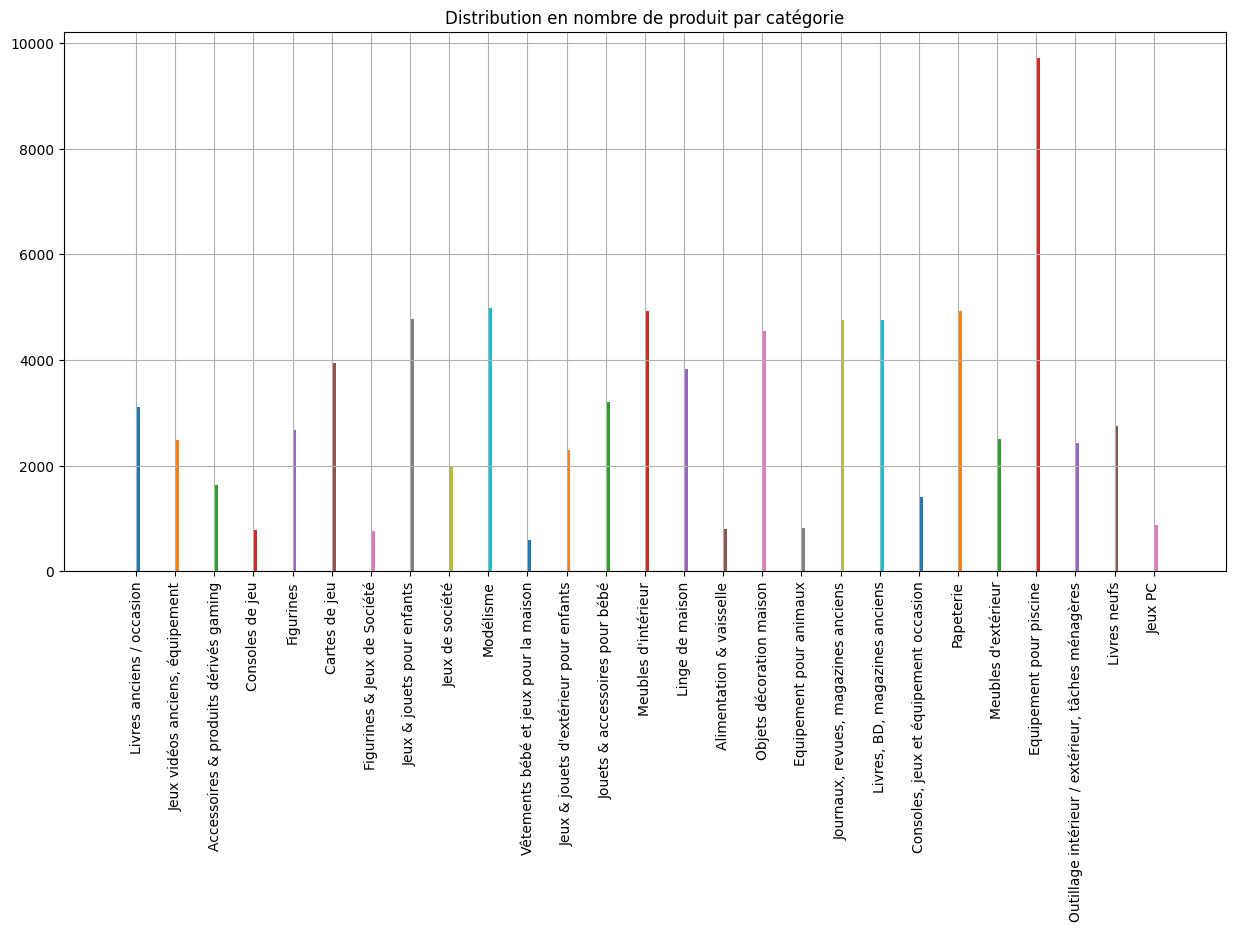

In [62]:
print(words_count_dataset.columns)
print(len(words_count_dataset.columns))
print(type(words_count_dataset))
display(words_count_dataset.head())
display(words_count_dataset['category_code'])


words_count_dataset.groupby(['category_code'])['prdtypelabelguess'].hist(grid=True, xrot='vertical', figsize=(15,7))
plt.title("Distribution en nombre de produit par catégorie")
plt.show()

In [64]:

#cette variable est chargé à parir d'un fichier (voir plus haut)
# to_ignore=['cm','mm','taille','dimensions','hauteur','largeur','couleur','nbsp','comprend','description','import','france','japonais','anglais','blanc','gris','noir']

to_ignore = set(get_excluded_words(f'{data_root_folder}/config/excluded_words.txt')[0])

data_cleaned=data\
  .fillna('')\
        .replace(r'<.*?>','', regex=True)\
          .replace(r'\d+','', regex=True)\
            .replace(r'.*Attention !!! Ce produit est un import.*','', regex=True)\
            .replace(re.compile(r'\[Import Allemand\]'),'', regex=True)\
              .replace({f'(?i){word}': '' for word in to_ignore}, regex=True)

data_cleaned["desi_desc"] = data_cleaned["designation"].str.cat(data_cleaned["description"], sep = " ")
data_cleaned.drop(['designation','description'], axis=1, inplace=True)

In [ ]:
display(data_cleaned)

productid     imageid  prdtypecode  \
0      3804725264  1263597046           10   
1       436067568  1008141237         2280   
2       201115110   938777978           50   
3        50418756   457047496         1280   
4       278535884  1077757786         2705   
...           ...         ...          ...   
84911   206719094   941495734           40   
84912  3065095706  1188462883         2583   
84913   440707564  1009325617         2280   
84914  3942400296  1267353403         1560   
84915    57203227   684671297         2522   

                                               desi_desc  
0      Ovia: ersonasiertes Notizuc /  Seiten / kaster...  
1      Jrna s Arts () N°   // - 'art  Son arce Saon D...  
2      rand St Eronoi u aead Nintendo Wii U - Seednk ...  
3         euce Donad - Euroe - Disnd  (ariontte À Doit)   
4       uerre s Tus uc a s id&eacute;es  ranur. I veu...  
...                                                  ...  
84911                              Te Sis [ Iort Anis ]   
84912  Kit isci acier VADA déco ierre Ø .  . scrition...  
84913  Jrna Officie   Reu Franise N°   // - neent D'a...  
84914  Ta asse ois  Récuération assif ase e c tte ta ...  
84915                oe  Coction  oes inuin  Vert Orane   

[84916 rows x 4 columns]

In [65]:
data_cleaned_with_prdtypelabel_guess=pd.merge(left=data_cleaned, left_on='prdtypecode', right=data_prdtypecode_label_guess, right_index=True )
display(data_cleaned_with_prdtypelabel_guess)

productid     imageid  prdtypecode  \
0      3804725264  1263597046           10   
6        91920807   907794536           10   
46      444108636  1010065513           10   
131    1807806498  1204663650           10   
188     125293048   880172152           10   
...           ...         ...          ...   
84114  1940778568  1115204639         1301   
84168   141192376   893308885         1301   
84258  2633735378  1161295971         1301   
84522   457363125  1012111114         1301   
84655   141190890   893310225         1301   

                                               desi_desc  \
0      Ovia: ersonaertes Notizu /  Seiten / nkaer /  ...   
6                           riof E: idsozessen Auf r Sr    
46                  svi -En-n.  e Jardin Art  eu  éoire    
131                   Dr. eurius' eisae Reise Zu ten Er    
188                                           oena Au a    
...                                                  ...   
84114  oîte   craies aer Re-Tween Fie Craies aer  ceu...   
84168  snte  ae nae a Foot zi-zi it na intérieure a f...   
84258  ird Tae Aériin ft tais Re-Suee ird Tae Aériin ...   
84522  sse Rie e r ue /-Rie onueur :  . sse se e. r u...   
84655  oitier  ue  ird  Jonction /- onueur   . Reent ...   

                           prdtypelabelguess  
0                  Livres anciens / occasion  
6                  Livres anciens / occasion  
46                 Livres anciens / occasion  
131                Livres anciens / occasion  
188                Livres anciens / occasion  
...                                      ...  
84114  Vêtements bébé et jeux pour la maison  
84168  Vêtements bébé et jeux pour la maison  
84258  Vêtements bébé et jeux pour la maison  
84522  Vêtements bébé et jeux pour la maison  
84655  Vêtements bébé et jeux pour la maison  

[82265 rows x 5 columns]

## Text data exploration

### Vue globale : **Words cloud** de 'designation', 'description' et 'desi_desc' (combinaison de designation et description)

>Les cartographies des mots permettent d'une manière simple et efficace d'écarter tous les mots parasites qui n'apportent pas de valeur et d'information sur les variables descriptives (designation & description)

C:\Users\abdel\AppData\Local\Temp\ipykernel_21696\4162045659.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  wc.generate(all_designation_df[0])


(-0.5, 1199.5, 799.5, -0.5)

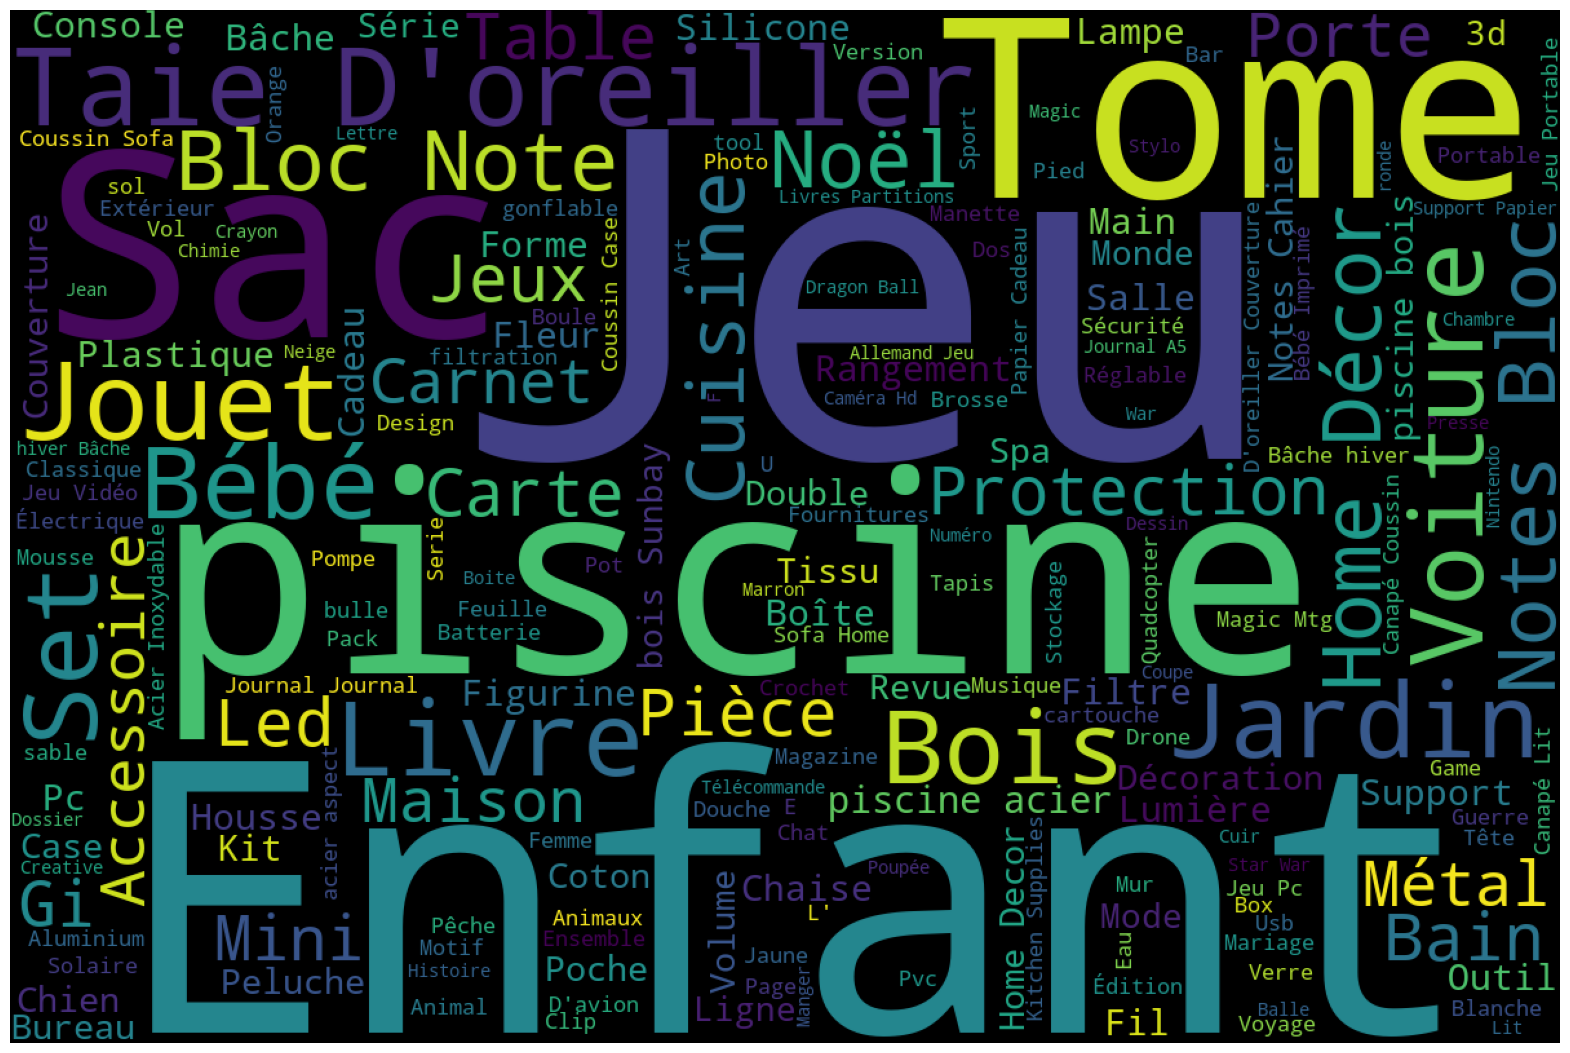

In [73]:
from wordcloud import WordCloud, STOPWORDS
#import nltk
# nltk.download()
from nltk.corpus import stopwords

# wc = WordCloud(width=1200, height=800)
my_stopwords = set(STOPWORDS).union(set(get_excluded_words(f'{data_root_folder}/config/excluded_words.txt')[0])).union(stopwords.words('french'))
wc = WordCloud(width=1200, height=800, stopwords= my_stopwords)
# make merge of all designation column content
all_designation_df = data.iloc[:, 0:1].fillna('').apply(lambda x: "".join(x.astype(str)), axis=0)
#display("all_designation_df=", all_designation_df[0])

wc.generate(all_designation_df[0])
plt.figure(figsize=(20, 20))
plt.title("WC Cloud de la variable 'designation'")
plt.imshow(wc)
plt.axis('off')

**On note :**
>- Les **mots clés** se rapportent au type de l'article et non à ses fonctionnalités et carctéristiques en conformité avec la colonne qui porte le jeu de mots, à quelques exceptions près comme les **couleurs**, la **matière** etc.
>- Les 3 mots dominants **"Jeu", "Enfant", "piscine", "Sac" et "Tome"** etc. révèlent les types d'articles majoritaires dans le dataset que l'on peut quantifier. En particulier, les mots que l'on peut qualifier commmuns à plusieurs catégories indiquant un ensemble de caractéristiques, sont finalement sans trop d'importance.

C:\Users\abdel\AppData\Local\Temp\ipykernel_21696\1906475944.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  wc.generate(all_description_df[0])


(-0.5, 1199.5, 799.5, -0.5)

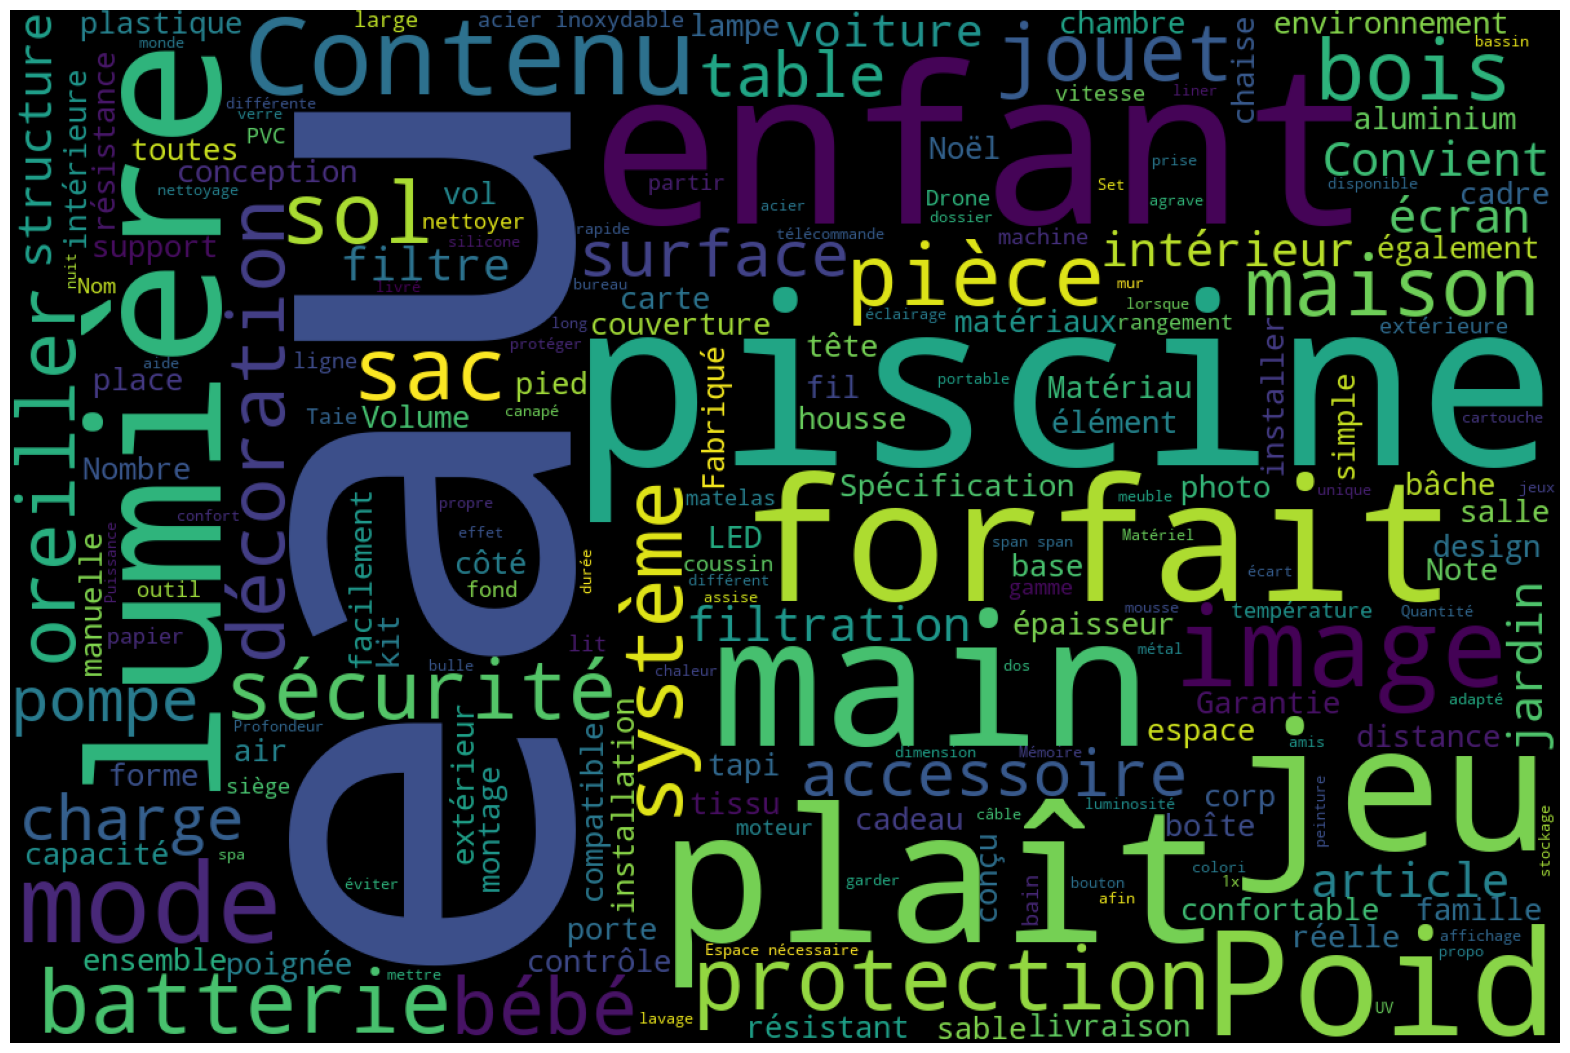

In [75]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords

wc = WordCloud(width=1200, height=800, stopwords= my_stopwords)

# make merge of all designation column content
all_description_df = data.iloc[:, 1:2].fillna('').apply(lambda x: "".join(x.astype(str)), axis=0)
#display("all_designation_df=", all_designation_df[0])

wc.generate(all_description_df[0])
plt.figure(figsize=(20, 20))
plt.title("WC Cloud de la variable 'description'")
plt.imshow(wc)
plt.axis('off')

**On note :**
>- Les mots dominants porte plutôt sur le **descriptif**, les **caractéristiqus** et **fonctionnalités** des produits, comme les **dimensions**, les **couleurs**, **qualité**, **faciliés**, **à qui s'adresse ?**, l'**usage** etc.
>- Le mot **produit** est plutôt générique que l'on peut exclure
>- Le mot **eau** est particulier, car il peut se rapporter à plusieurs articles à la fois, comme les piscines, les outils qui utilisent ou traitent l'eau comme matière etc. 

Tous ces mots on été exclus via un fichier text avec d'autres et ne sont plus visibles !

C:\Users\abdel\AppData\Local\Temp\ipykernel_21696\3503585045.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  wc.generate(all_designation_df[0])


(-0.5, 1199.5, 799.5, -0.5)

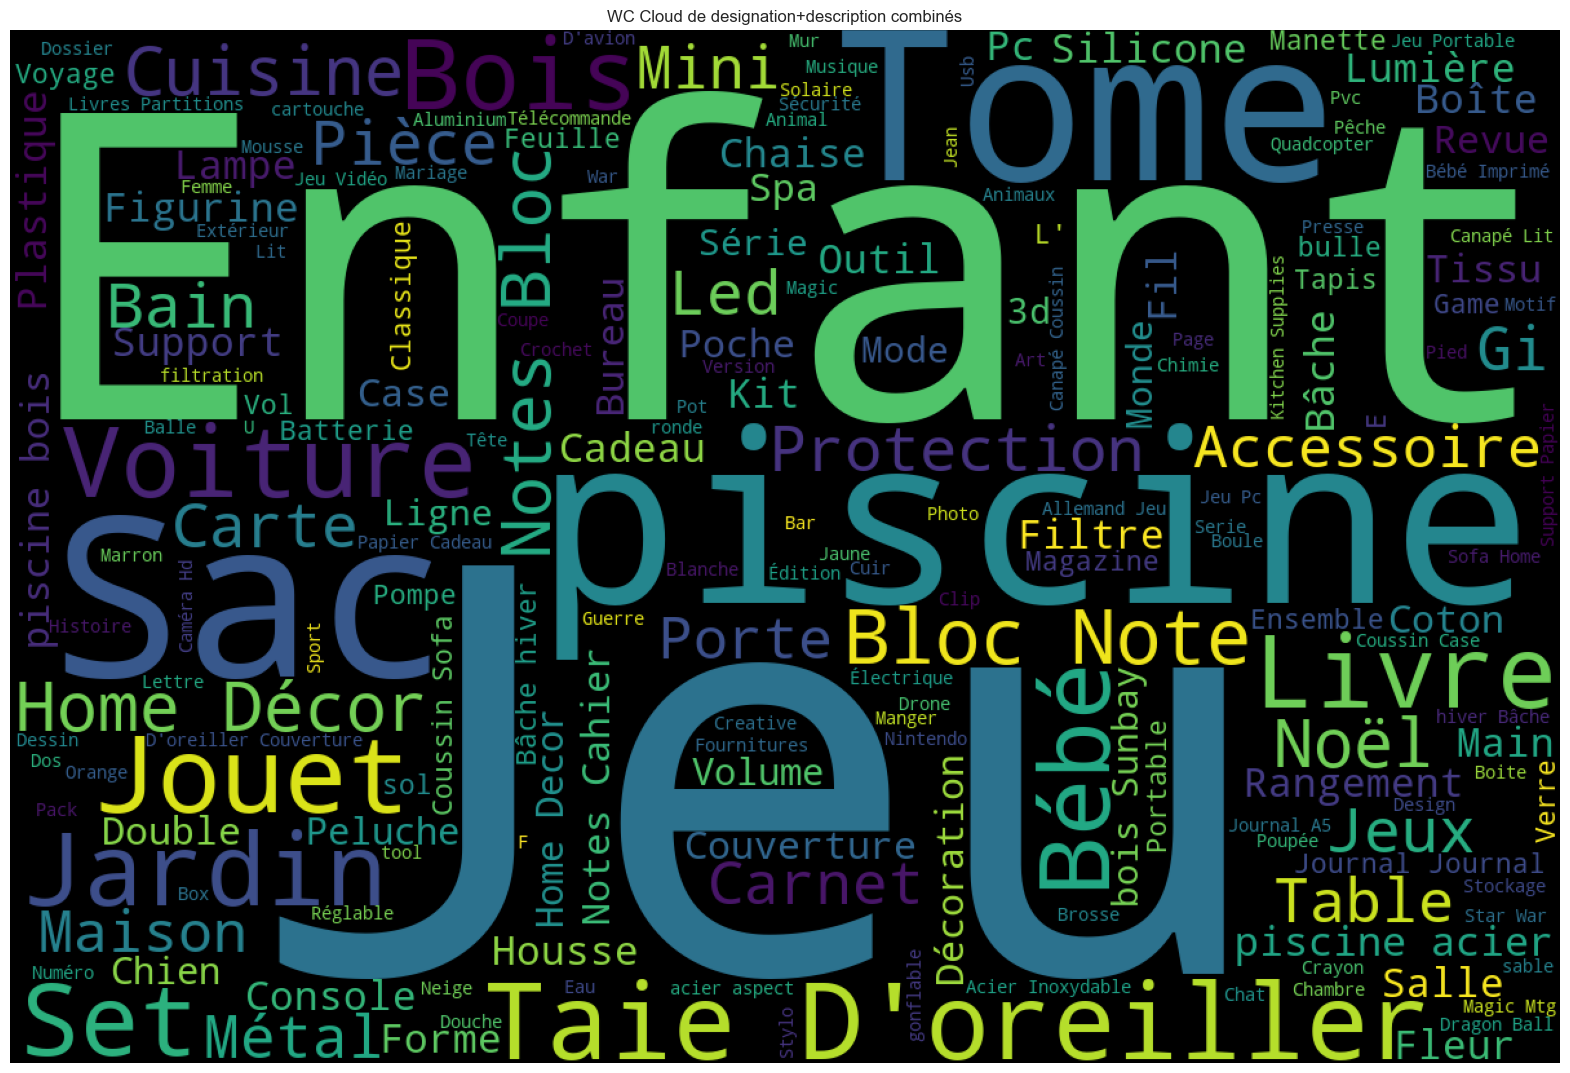

In [91]:
from wordcloud import WordCloud, STOPWORDS
#import nltk
# nltk.download()
from nltk.corpus import stopwords

# wc = WordCloud(width=1200, height=800)
my_stopwords = set(STOPWORDS).union(set(get_excluded_words(f'{data_root_folder}/config/excluded_words.txt')[0])).union(stopwords.words('french'))
wc = WordCloud(width=1200, height=800, stopwords= my_stopwords)
# make merge of all designation column content
all_desi_desc_df = data_cleaned.iloc[:, 3:-1].fillna('').apply(lambda x: "".join(x.astype(str)), axis=0)
#display("all_designation_df=", all_designation_df[0])

wc.generate(all_designation_df[0])
plt.figure(figsize=(20, 20))
plt.imshow(wc)
plt.title("WC Cloud de designation+description combinés")
plt.axis('off')

> On voit bien que cette carte reprend les mots importants des deux colonnes 'designation' et 'description' avec un equilibrage en termes d'importance, ce qui nous réconfortent dans le choix de combiner les deux colonnes dans une 3ème colonne et ne travailler que sur cette dernière sur la partie texte 

> L'exclusion d'un nombre important de mots parasites n'apportant aucune valeur sémantique, a aussi apporté ses fruits

### Analyse de la distribution de la nouvelle varaible 'desi_desc' combinant la 'designation' et la 'desciption'

In [85]:
display(data_cleaned.head())

productid     imageid  prdtypecode  \
0  3804725264  1263597046           10   
1   436067568  1008141237         2280   
2   201115110   938777978           50   
3    50418756   457047496         1280   
4   278535884  1077757786         2705   

                                           desi_desc  
0  Ovia: ersonaertes Notizu /  Seiten / nkaer /  ...  
1  na s Arts (e) N°   // - 'art  Son are Saon D'a...  
2  ra  Eronoi eu ae nteo Wii U - Seednk i e I E T...  
3             eue Donad - e - Dis  (ariontte À Doi)   
4   uerre s Tus uc a s id&;es  rur. I veut oraser...

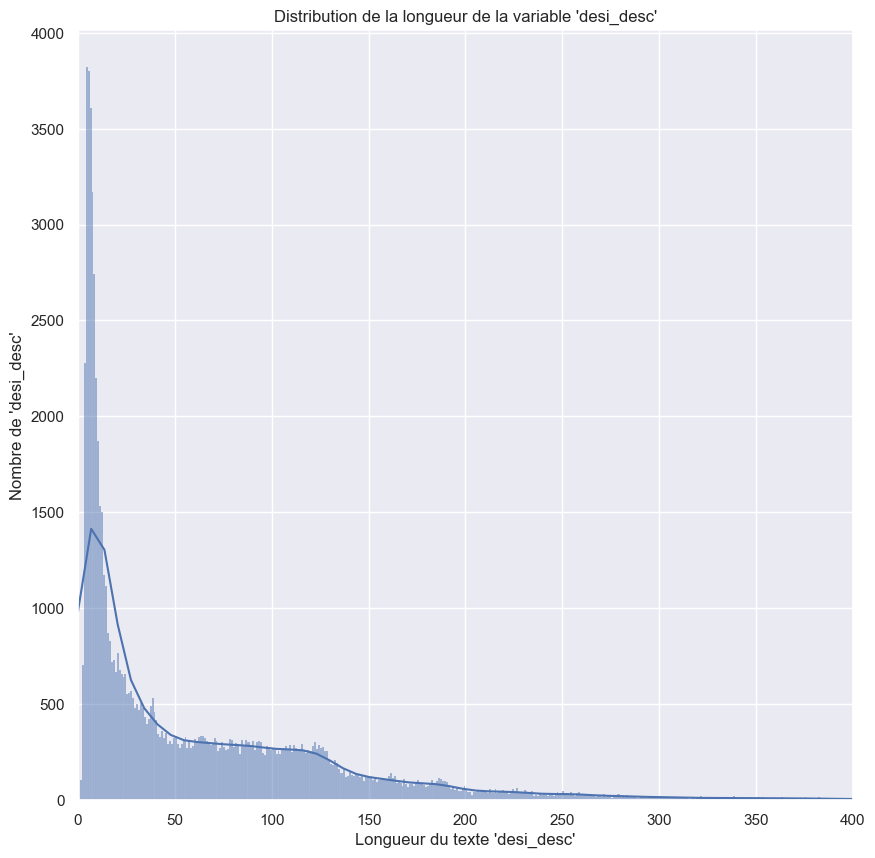

In [98]:
%matplotlib inline 

sns.set_theme(rc={'figure.figsize': (10, 10)})
fig, ax = plt.subplots(nrows= 1, ncols= 1)
g1 = sns.histplot(x=data_cleaned['desi_desc'].str.split().map(lambda x: len(x)), ax=ax, kde=True, bins=range(0,400))
#g2 = sns.histplot(y=data_cleaned['description'].str.split().map(lambda x: len(x)), ax=ax[1], kde= True)

ax.set_xlim(0,400)
plt.xlabel("Longueur du texte 'desi_desc'")
plt.ylabel("Nombre de 'desi_desc'")
plt.title("Distribution de la longueur de la variable 'desi_desc'")
plt.grid(True)
plt.show()           


<Axes: >

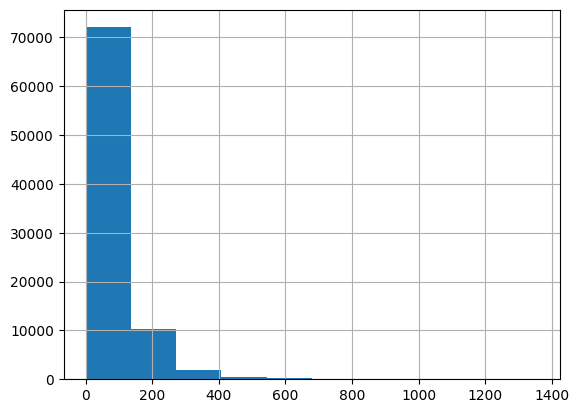

In [ ]:
data_cleaned['desi_desc'].str.split().map(lambda x: len(x)).hist()

'designation' range from 10 to 250 characters and generally, it is between 75 to 100 characters

<Axes: >

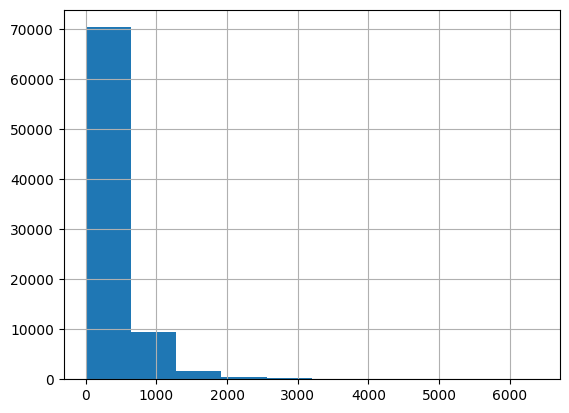

In [66]:
data_cleaned['desi_desc'].str.len().hist()

Number of words in designation ranges from 3 to 50 and mostly falls between 3 to 18 words.

d:\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0        3.666667
6        3.666667
46       3.714286
131      3.857143
188      2.333333
           ...   
84114    4.818182
84168    3.416667
84258    3.483333
84522    3.055556
84655    4.000000
Name: desi_desc, Length: 82265, dtype: float64

Quartiles de la moyenne des longueurs de la colonne 'desi_desc' obtenus  Q1, Q2, Q3 = 3.0 3.3846153846153846 3.75
IQR = 0.75
Indicateur de dispertion supérieur : 4.875
Indicateur de dispertion inférieur : 1.875


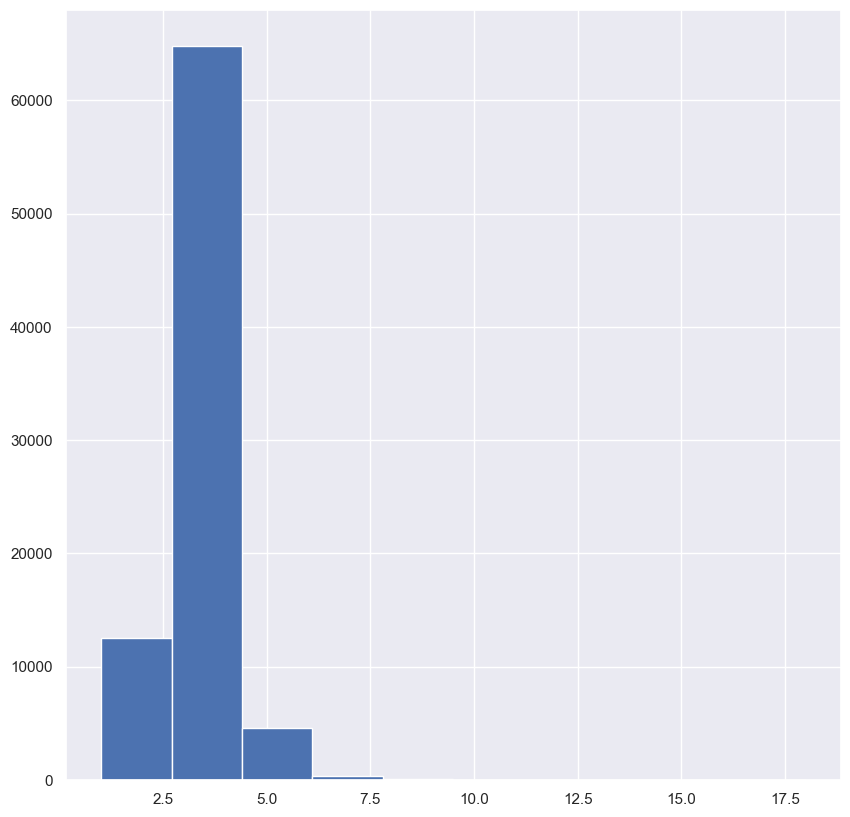

In [100]:
data_design_desc_len_mean = data_cleaned_with_prdtypelabel_guess['desi_desc'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
display(data_design_desc_len_mean)
data_design_desc_len_mean.hist()

Q1, Q2, Q3 = data_design_desc_len_mean.quantile(q=[.25, .50, .75])
print("Quartiles de la moyenne des longueurs de la colonne 'desi_desc' obtenus  Q1, Q2, Q3 =", Q1, Q2, Q3 )

IQR = Q3 - Q1
print("IQR =", IQR) 

Q_max = Q3 + 1.5*IQR
print("Indicateur de dispertion supérieur :", Q_max)

Q_min = Q1 - 1.5*IQR
print("Indicateur de dispertion inférieur :", Q_min)

#print(data_cleaned_with_prdtypelabel_guess.columns)


The average word length ranges between 2 to 8 with 5 being the most common length

QUARTILES for 'designation_length':
Q1, Q2, Q3, Q4  =  43.0 63.0 90.0 250.0
IQR = 47.0
Indicateur de dispertion supérieur : 160.5
Indicateur de dispertion inférieur : -27.5

QUARTILES for 'description_length':
Q1, Q2, Q3, Q4  =  3.0 210.0 794.0 12451.0
IQR = 791.0
Indicateur de dispertion supérieur : 1980.5
Indicateur de dispertion inférieur : -1183.5


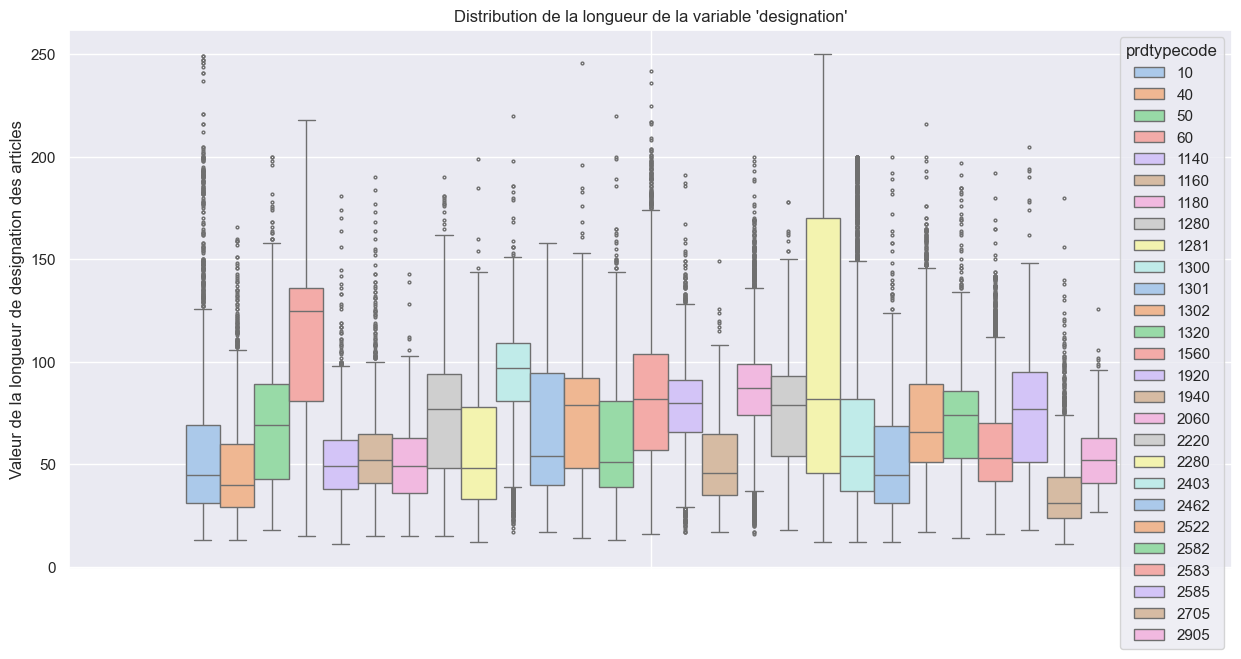

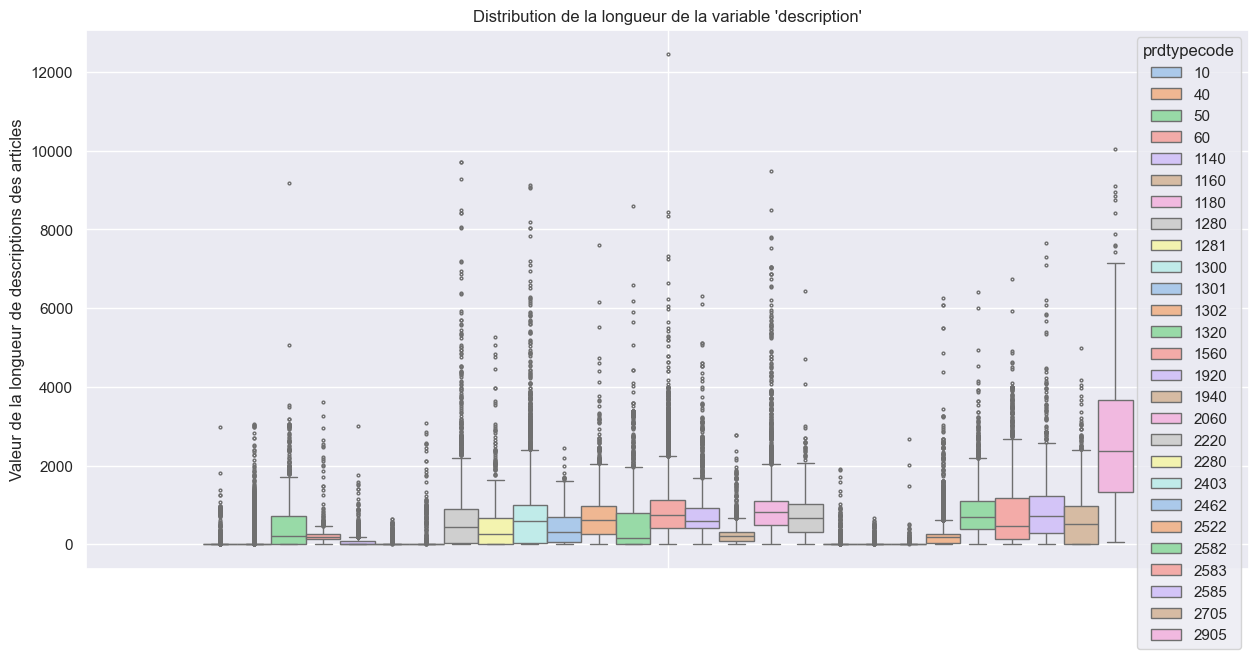

In [116]:
data_byprdtype_length=data
data_byprdtype_length['designation_length'] = data_byprdtype_length['designation'].apply(lambda x: len(str(x)))
data_byprdtype_length['description_length'] = data_byprdtype_length['description'].apply(lambda x: len(str(x)))

print("QUARTILES for 'designation_length':\n===========================================")
Q1, Q2, Q3, Q4 = data_byprdtype_length['designation_length'].quantile(q=[.25, .5, .75, 1.0])
print("Q1, Q2, Q3, Q4  = ", Q1, Q2, Q3, Q4 )

IQR = Q3 - Q1
print("IQR =", IQR) 

Q_max = Q3 + 1.5*IQR
print("Indicateur de dispertion supérieur :", Q_max)

Q_min = Q1 - 1.5*IQR
print("Indicateur de dispertion inférieur :", Q_min)

print("\nQUARTILES for 'description_length':\n===========================================")
Q1, Q2, Q3, Q4 = data_byprdtype_length['description_length'].quantile(q=[.25, .5, .75, 1.0])
print("Q1, Q2, Q3, Q4  = ", Q1, Q2, Q3, Q4 )

IQR = Q3 - Q1
print("IQR =", IQR) 

Q_max = Q3 + 1.5*IQR
print("Indicateur de dispertion supérieur :", Q_max)

Q_min = Q1 - 1.5*IQR
print("Indicateur de dispertion inférieur :", Q_min)



sns.set_theme(rc={'figure.figsize': (15, 7)})
fig, ax = plt.subplots(nrows= 1, ncols= 1)
g1 = sns.boxplot(data=data_byprdtype_length,  y= 'designation_length', ax=ax, hue='prdtypecode', gap=2, fliersize=2, palette='pastel')
plt.ylabel('Valeur de la longueur de designation des articles')
plt.title("Distribution de la longueur de la variable 'designation'")
plt.grid(True)
plt.show()  


fig, ax = plt.subplots(nrows= 1, ncols= 1)
g2 = sns.boxplot(data=data_byprdtype_length,  y= 'description_length', ax=ax, hue='prdtypecode', gap=2, fliersize=2, palette='pastel')
plt.ylabel('Valeur de la longueur de descriptions des articles')
plt.title("Distribution de la longueur de la variable 'description'")
plt.grid(True)
plt.show()           


>- **description**: beaucoup d'outliers supérieurs à Q3, la majorté ne dépasse pas les 1000 de longeur (à l'exceptio de la cat n° 2905, jeux videos/PC) qui a moins d'outiliers que le reste des catégories

>- **designation**: la catégorie coddée **1281** semble être la seule qui ne possède pas d'outliers ni inliers; il suffit d'examiner à quel type d'articles est associée (catégorie descriptive : 'Jeux de société') ?

>- Le calcul des quartiles, montre que la variable 'description' possèdent un Q3 et Q4 assez élevés par rapport au champ 'designation' indiquant ainsi une richesse très importante en termes de nombre de mots utilisés dans la description

*Il faut aller plus loin et examiner les mots que ces deux colonnes contiennent, faire une analyse sémantique, statistique et voir si une corrélation existe entre ces deux champs ?*